# Bepi-Colombo phase 1

In [1]:
!pip install rebound
!pip install reboundx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 786.0/786.0 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.0/94.0 kB 2.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for reboundx: filename=reboundx-4.4.0-cp310-cp310-linux_x86_64.whl size=291809 sha256=ce9f9034ce7597e704e09068e18b59b79d30a57764a59af6b85fe76163f16674
  Stored in directory: /root/.cache/pip/wheels/ce/52/44/a18f458e68b0894f6d90c8b12eea2b79420cfac7c15339a5aa
Successfully built reboundx


In [2]:
#Phase 1
#Bepi-Colombo Mission
#Imports
import rebound
import reboundx
import numpy as np
import matplotlib.pyplot as plt
from reboundx import constants
from scipy.interpolate import interp1d

In [3]:

params = {'legend.fontsize': 'xx-large',
          'figure.titlesize': 'xx-large',
          'figure.subplot.top': 0.93,
          'figure.subplot.wspace': 0.3,
          'figure.figsize': (7,6),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
plt.rcParams.update(params)


In [4]:

sim = rebound.Simulation()
sim.units = ('days', 'km', 'kg')


In [5]:
#Common parameters
Nobj = 13#considering 8 planets, sun, Bepi, 3 asteriods
Nobj2 = 5
year = 365 #in days
tmax = 2*year
Nout = int(3*tmax) #per day 3 samples
print(Nout)
sim.c = 3e5*86400 #km/day light speed
c2 = sim.c**2
cm2 = 1/c2
sim.G = 6.67430e-20*(86400**2) #gravitational constant km3 kg-1 days-2
times = np.linspace(0, tmax, Nout)

Jcentury = 36525 #days
arcsec = 4.8481368e-06 #in rad
period_mercury= 88 #days


2190


In [ ]:
# mercury_x= 46088671.22889903
# mercury_y= 17423615.515467957
# mercury_z= -2742278.1329949
# mercury_vx= -27.278071481898525
# mercury_vy= 47.50246889781066
# mercury_vz= 6.38427653379923

# earth_x= 116535299.24682154
# earth_y= 91090203.7090667
# earth_z= 7002.7180410809815
# earth_vx= -18.886395720072205
# earth_vy= 23.305303655847617
# earth_vz= -0.000608065810169478

# venus_x= 116535299.24682154
# venus_y= 91090203.7090667
# venus_z= 7002.7180410809815
# venus_vx= -18.886395720072205
# venus_vy= 23.305303655847617
# venus_vz= -0.000608065810169478

# bepi_x= 46061192.175843544
# bepi_y= 17252752.368236057
# bepi_z= -2736191.7237738287
# bepi_vx= -27.057110127709606
# bepi_vy= 47.26234809792773
# bepi_vz= 6.404299380352967

In [6]:

#defining simulation setup
def setupsim():
	sim = rebound.Simulation()
	sim.units = ('days', 'km', 'kg')
	sim.add(m = 1.989e30, hash = "sun")
	sim.add(m = 3.285e23, x=46088671.22889903, y=17423615.515467957, z=-2742278.1329949, vx=-27.278071481898525*86400, vy=47.50246889781066*86400, vz=6.38427653379923*86400, hash = "mercury")
	sim.add(m = 1150, x=46061192.175843544, y=17252752.368236057, z=-2736191.7237738287, vx=-27.057110127709606*86400, vy=47.26234809792773*86400, vz=6.404299380352967*86400, hash = "bepi")
	sim.add(m= 4.867e24, x=79010285.57229258, y=72893802.51865904,z= -3542286.046258427,vx=-23.949895449143668*86400, vy=25.496711631982823*86400,vz=1.7325795166332743*86400, hash='Venus')
	sim.add(m= 5.972e24, x=116535299.24682154, y=91090203.7090667,z=7002.7180410809815,vx=-18.886395720072205*86400, vy=23.305303655847617*86400,vz=-0.000608065810169478*86400, hash='Earth')
	sim.add(m=6.39e23, hash='Mars')
	sim.add(m=1.898e27, a=1.0704e6, e=0.0014, hash="jupiter")
	sim.add(m=5.683e26, hash='Saturn')
	sim.add(m=8.681e25, hash='Uranus')
	sim.add(m=1.024e26, hash='Neptune')
	sim.add(m=9.1e20, hash='Ceres')
	sim.add(m=2.108e20, hash='Pallas')
	sim.add(m=2.589e20, hash='Vesta')

	return sim

In [7]:

#defining simulation setup
def setupsim2():
	sim = rebound.Simulation()
	sim.units = ('days', 'km', 'kg')
	sim.add(m = 1.989e30, hash = "sun")
	sim.add(m = 3.285e23, x=46088671.22889903, y=17423615.515467957, z=-2742278.1329949, vx=-27.278071481898525*86400, vy=47.50246889781066*86400, vz=6.38427653379923*86400, hash = "mercury")
	sim.add(m = 1150, x=46061192.175843544, y=17252752.368236057, z=-2736191.7237738287, vx=-27.057110127709606*86400, vy=47.26234809792773*86400, vz=6.404299380352967*86400, hash = "bepi")
	# sim.add(m= 4.867e24, x=79010285.57229258, y=72893802.51865904,z= -3542286.046258427,vx=-23.949895449143668*86400, vy=25.496711631982823*86400,vz=1.7325795166332743*86400, hash='Venus')
	sim.add(m= 5.972e24, x=116535299.24682154, y=91090203.7090667,z=7002.7180410809815,vx=-18.886395720072205*86400, vy=23.305303655847617*86400,vz=-0.000608065810169478*86400, hash='Earth')
	# sim.add(m=6.39e23, hash='Mars')
	sim.add(m=1.898e27, a=1.0704e6, e=0.0014, hash="jupiter")
	# sim.add(m=5.683e26, hash='Saturn')
	# sim.add(m=8.681e25, hash='Uranus')
	# sim.add(m=1.024e26, hash='Neptune')
	# sim.add(m=9.1e20, hash='Ceres')
	# sim.add(m=2.108e20, hash='Pallas')
	# sim.add(m=2.589e20, hash='Vesta')

	return sim

##################NEWTON CASE############################


In [ ]:
sim0 = setupsim()
sim0.move_to_com()
ps0 = sim0.particles
sim0.integrator = "whfast"

In [ ]:
x0 = np.zeros((Nobj,Nout))
y0 = np.zeros((Nobj,Nout))
z0 = np.zeros((Nobj,Nout))
a0 = np.zeros((Nobj,Nout))
e0 = np.zeros((Nobj,Nout))
Omega0 = np.zeros((Nobj,Nout))
omega0 = np.zeros((Nobj,Nout))
pomega0 = np.zeros((Nobj,Nout))
inc0 = np.zeros((Nobj,Nout))

In [ ]:
from tqdm import tqdm
for i,time in tqdm(enumerate(times)): #getting all the observables
    sim0.integrate(time)
    for j in (range(Nobj)):
        x0[j][i] = ps0[j].x
        y0[j][i] = ps0[j].y
        z0[j][i] = ps0[j].z
        if j>0:
            a0[j][i] = ps0[j].a
            e0[j][i] = ps0[j].e
            pomega0[j][i] = ps0[j].pomega
            Omega0[j][i] = ps0[j].Omega
            omega0[j][i] = ps0[j].omega
            inc0[j][i] = ps0[j].inc

0it [00:00, ?it/s]/usr/local/lib/python3.10/dist-packages/rebound/simulation.py:259: RuntimeWarning: WHFast convergence issue. Timestep is larger than at least one orbital period.
  warnings.warn(msg[1:], RuntimeWarning)
2190it [00:07, 304.69it/s]


Earth-mercury distance in netwon case with all perturber effects: 2190


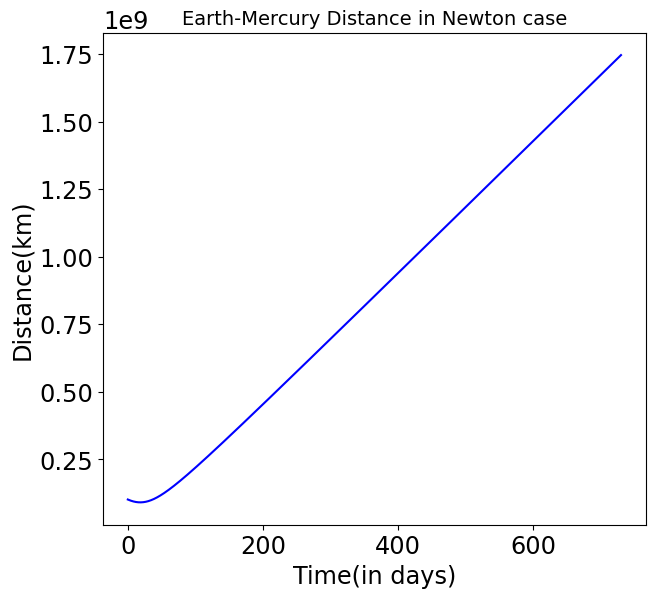

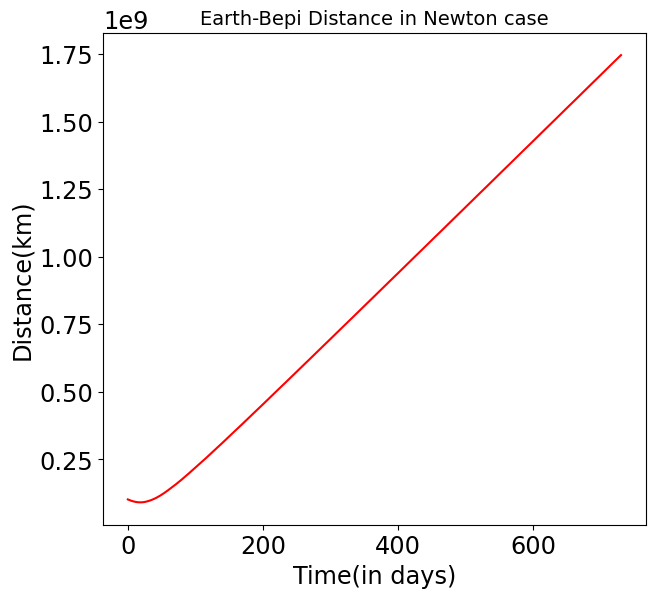

In [ ]:
EM0 = np.sqrt((x0[1]-x0[4])**2+(y0[1]-y0[4])**2+(z0[1]-z0[4])**2)#earth-mercury distance in newton case
#EM0 = np.sqrt((x0[1]-x0[3])**2+(y0[1]-y0[3])**2+(z0[1]-z0[3])**2)#earth-mercury distance in newton case
BC0 = np.sqrt(x0[2]**2+y0[2]**2+z0[2]**2)#bepi colombo orbit in newton case with respect to Barycenter
BCE0 = np.sqrt((x0[2]-x0[4])**2+(y0[2]-y0[4])**2+(z0[2]-z0[4])**2)#earth-bepi distance
#no shapiro delay
print("Earth-mercury distance in netwon case with all perturber effects:", len(EM0))
#Plotting the earth-mercury distance and the orbit of the bepi colombo to see the impact of the perturbers

plt.figure()
plt.plot(times, EM0, label="Earth-Mercury distance", color='blue')
plt.xlabel("Time(in days)")
plt.ylabel("Distance(km)")
plt.title("Earth-Mercury Distance in Newton case", fontsize='14')
plt.show()
###############################################################################
plt.plot(times, BCE0, label="Earth-Bepi distance", color='red')
plt.xlabel("Time(in days)")
plt.ylabel("Distance(km)")
plt.title("Earth-Bepi Distance in Newton case", fontsize='14')
plt.show()




In [ ]:
EM0

array([1.01965936e+08, 1.01607488e+08, 1.01252844e+08, ...,
       1.74449309e+09, 1.74530923e+09, 1.74612536e+09])

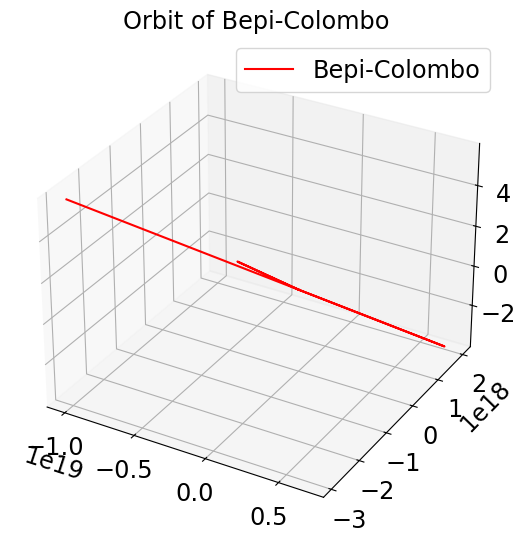

In [ ]:
BCSSx = [p.x for p in sim0.particles[2:]]#[x,y,z,vx,vy,vz] in km and km/s
BCSSy = [p.y for p in sim0.particles[2:]]#[x,y,z,vx,vy,vz] in km and km/s
BCSSz = [p.z for p in sim0.particles[2:]]#[x,y,z,vx,vy,vz] in km and km/s
ax1 = plt.figure().add_subplot(projection='3d')
ax1.plot(BCSSx,BCSSy,BCSSz, color='red', label='Bepi-Colombo')
ax1.legend()
ax1.set_title('Orbit of Bepi-Colombo')
plt.show()

################GR from Reboundx##########################


In [11]:
import reboundx
print("GR effect added to the system")
sim1 = setupsim2()
sim1.integrator = "whfast"
sim1.move_to_com()
ps1 = sim1.particles
Nobj = Nobj2


GR effect added to the system


In [12]:
rebx = reboundx.Extras(sim1)
gr = rebx.load_force("gr")#adding gr effect
rebx.add_force(gr)
gr.params["c"] = 3e5*86400 #km/days
sim1.G = 6.67430e-20*(86400**2)
print("still running at GR")
x1 = np.zeros((Nobj,Nout))
y1 = np.zeros((Nobj,Nout))
z1 = np.zeros((Nobj,Nout))
a1 = np.zeros((Nobj,Nout))
e1 = np.zeros((Nobj,Nout))
Omega1 = np.zeros((Nobj,Nout))
omega1 = np.zeros((Nobj,Nout))
pomega1 = np.zeros((Nobj,Nout))
inc1 = np.zeros((Nobj,Nout))
print("going to loop")

still running at GR
going to loop


In [14]:
from tqdm import tqdm

In [ ]:
sim1.t

0.0

In [ ]:
# for i,time in tqdm(enumerate(times)):
	# #print(i)
	# sim1.integrate(sim1.t+time)
	# #print("j loop")
	# for j in range(Nobj):
	# 	x1[j][i] = ps1[j].x
	# 	y1[j][i] = ps1[j].y
	# 	z1[j][i] = ps1[j].z
	# 	if j>0:
	# 		a1[j][i] = ps1[j].a
	# 		e1[j][i] = ps1[j].e
	# 		pomega1[j][i] = ps1[j].pomega
	# 		Omega1[j][i] = ps1[j].Omega
	# 		omega1[j][i] = ps1[j].omega
	# 		inc1[j][i] = ps1[j].inc

In [15]:
for i,time in tqdm(enumerate(times)):
	#print(i)
	sim1.integrate(time)
	#print("j loop")
	for j in range(Nobj):
		x1[j][i] = ps1[j].x
		y1[j][i] = ps1[j].y
		z1[j][i] = ps1[j].z
		if j>0:
			a1[j][i] = ps1[j].a
			e1[j][i] = ps1[j].e
			pomega1[j][i] = ps1[j].pomega
			Omega1[j][i] = ps1[j].Omega
			omega1[j][i] = ps1[j].omega
			inc1[j][i] = ps1[j].inc

2190it [00:02, 764.69it/s]


In [17]:
print("loop done")
#EM1 = np.sqrt((x1[1]-x1[4])**2+(y1[1]-y1[4])**2+(z1[1]-z1[4])**2)#earth-mercury distance from GR reboundx
EM1 = np.sqrt((x1[1]-x1[3])**2+(y1[1]-y1[3])**2+(z1[1]-z1[3])**2)#earth-mercury distance from GR reboundx; considering 5 objects now
#BC1 = np.sqrt(x1[2]**2+y1[2]**2+z1[2]**2)#bepi colombo orbit adding GR effect with respect to Barycenter
#BCE1 = np.sqrt((x1[2]-x1[4])**2+(y1[2]-y1[4])**2+(z1[2]-z1[4])**2)#earth-bepi distance
BCE1 = np.sqrt((x1[2]-x1[3])**2+(y1[2]-y1[3])**2+(z1[2]-z1[3])**2)#earth-bepi distance

loop done


In [18]:
EM1


array([1.01965936e+08, 1.01644701e+08, 1.01365179e+08, ...,
       1.95777004e+08, 1.95192245e+08, 1.94596507e+08])

In [ ]:
EM1-EM0

array([ 0.00000000e+00, -3.50950862e+03, -7.29613312e+03, ...,
        2.43390557e+07,  2.43501594e+07,  2.43612631e+07])

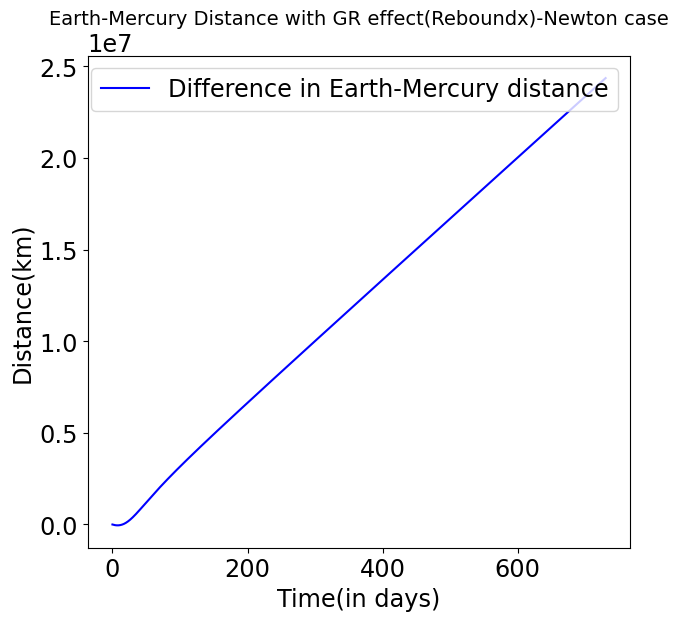

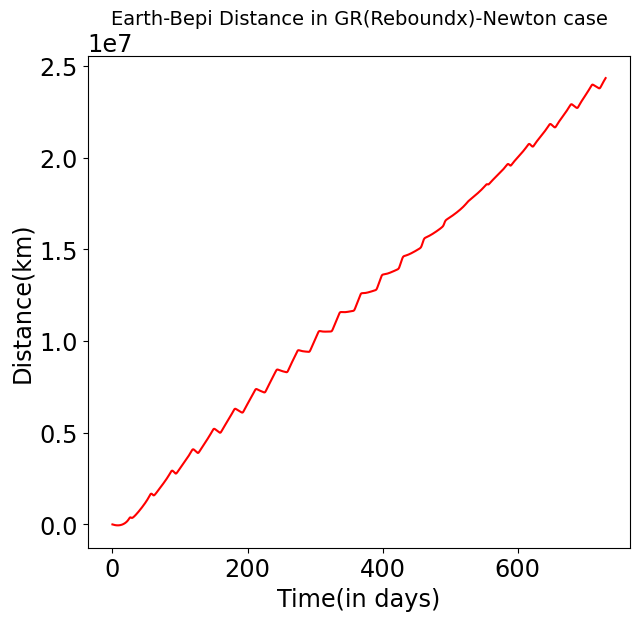

In [ ]:
plt.figure()
plt.plot(times, EM1-EM0, label="Difference in Earth-Mercury distance", color='blue')
plt.xlabel("Time(in days)")
plt.ylabel("Distance(km)")
plt.legend()
plt.title("Earth-Mercury Distance with GR effect(Reboundx)-Newton case", fontsize='14')
plt.show()
#############################################################################################
plt.plot(times, BCE1-BCE0, label="Difference in Earth-Bepi distance", color='red')
plt.xlabel("Time(in days)")
plt.ylabel("Distance(km)")
plt.title("Earth-Bepi Distance in GR(Reboundx)-Newton case", fontsize='14')
plt.show()

Earth-mercury distance in accordance with GR effect with all perturber effects: [1.01965936e+08 1.01603979e+08 1.01245548e+08 ... 1.76883215e+09
 1.76965939e+09 1.77048662e+09]


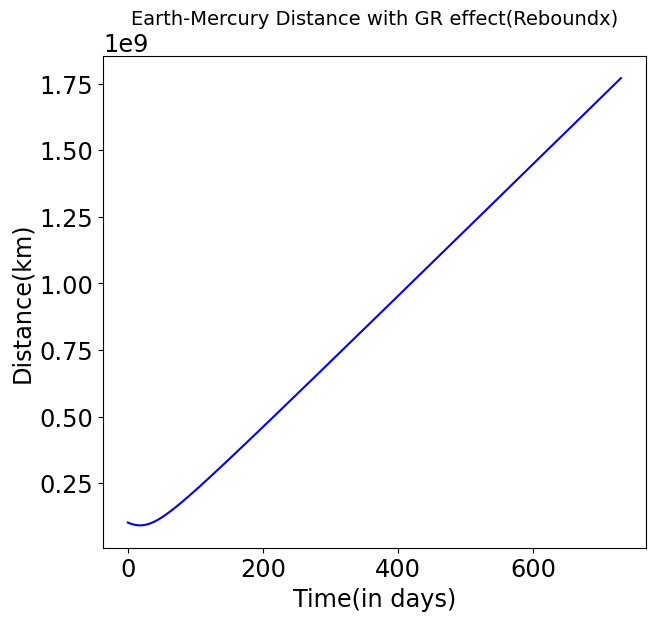

In [ ]:

print("Earth-mercury distance in accordance with GR effect with all perturber effects:", EM1)
#Plotting the earth-mercury distance and the orbit of the bepi colombo to see the impact of the perturbers

plt.figure()
plt.plot(times, EM1, label="Earth-Mercury dist", color='blue')
plt.xlabel("Time(in days)")
plt.ylabel("Distance(km)")
plt.title("Earth-Mercury Distance with GR effect(Reboundx)", fontsize='14')
plt.show()


#######PPN when beta=gamma=1###########################


In [ ]:
def PPN(reb_sim):#refers to GR
    Nobj = Nobj2
    c = 3e5*86400 #km/day
    c2 = c**2
    cm2 = 1/c2
    G = 6.67430e-20*(86400**2) #km^3 kg^-1 days^-2
    gam = 1.
    bet = 1.
    r_vect = np.zeros((Nobj,Nobj,3))
    r2 = np.zeros((Nobj,Nobj))
    r = np.zeros((Nobj,Nobj))
    newt = np.zeros((Nobj,Nobj,3))
    mu = np.zeros(Nobj)
    v2 = np.zeros(Nobj)
    v_dot_v = np.zeros((Nobj,Nobj))
    r_dot_a = np.zeros((Nobj,Nobj))
    r_dot_vt = np.zeros((Nobj,Nobj))
    r_dot_va = np.zeros((Nobj,Nobj))
    for i in range(0,Nobj):
        mu[i] = G*ps[i].m
        v2[i] = ps[i].vx**2 + ps[i].vy**2 + ps[i].vz**2
    for i in range(0,Nobj):
        for j in range(0,Nobj):
            if (j!=i):
                r_vect[i,j,0] = ps[j].x-ps[i].x
                r_vect[i,j,1] = ps[j].y-ps[i].y
                r_vect[i,j,2] = ps[j].z-ps[i].z
                r_vect[j,i,0] = -r_vect[i,j,0]
                r_vect[j,i,1] = -r_vect[i,j,1]
                r_vect[j,i,2] = -r_vect[i,j,2]
                r2[i,j] = r_vect[i,j,0]**2 + r_vect[i,j,1]**2 + r_vect[i,j,2]**2
                r2[j,i] = r2[i,j]
                r[i,j] = np.sqrt(r2[i,j])
                r[j,i] = r[i,j]
                newt[i,j,0] = mu[i]*r_vect[i,j,0]/(r2[i,j]*r[i,j])
                newt[i,j,1] = mu[i]*r_vect[i,j,1]/(r2[i,j]*r[i,j])
                newt[i,j,2] = mu[i]*r_vect[i,j,2]/(r2[i,j]*r[i,j])
                v_dot_v[i,j] = ps[i].vx*ps[j].vx + ps[i].vy*ps[j].vy + ps[i].vz*ps[j].vz
                r_dot_a[i,j] = r_vect[i,j,0]*ps[i].ax + r_vect[i,j,1]*ps[i].ay + r_vect[i,j,2]*ps[i].az
                r_dot_vt[i,j] = r_vect[i,j,0]*ps[j].vx + r_vect[i,j,1]*ps[j].vy + r_vect[i,j,2]*ps[j].vz
                r_dot_va[i,j] = r_vect[i,j,0]*ps[i].vx + r_vect[i,j,1]*ps[i].vy + r_vect[i,j,2]*ps[i].vz
    for i in range(0,Nobj):
        for j in range(0,Nobj):
            if (j!=i):
                ps[j].ax += cm2* (-newt[i,j,0] * (gam*v2[j] + (1+gam)*v2[i] - 2*(1+gam)*v_dot_v[i,j]
                                                  - 1.5*(r_dot_va[i,j]/r[i,j])**2 - 0.5*r_dot_a[i,j])
                                  + mu[i]/(r2[i,j]*r[i,j]) * (2*(1+gam)*r_dot_vt[i,j]
                                                             - (1+2*gam)*r_dot_va[i,j])*(ps[j].vx-ps[i].vx)
                                  + 0.5*(3+4*gam)*mu[i]*ps[i].ax/r[i,j])
                ps[j].ay += cm2* (-newt[i,j,1] * (gam*v2[j] + (1+gam)*v2[i] - 2*(1+gam)*v_dot_v[i,j]
                                                  - 1.5*(r_dot_va[i,j]/r[i,j])**2 - 0.5*r_dot_a[i,j])
                                  + mu[i]/(r2[i,j]*r[i,j]) * (2*(1+gam)*r_dot_vt[i,j]
                                                             - (1+2*gam)*r_dot_va[i,j])*(ps[j].vy-ps[i].vy)
                                  + 0.5*(3+4*gam)*mu[i]*ps[i].ay/r[i,j])
                ps[j].az += cm2* (-newt[i,j,2] * (gam*v2[j] + (1+gam)*v2[i] - 2*(1+gam)*v_dot_v[i,j]
                                                  - 1.5*(r_dot_va[i,j]/r[i,j])**2 - 0.5*r_dot_a[i,j])
                                  + mu[i]/(r2[i,j]*r[i,j]) * (2*(1+gam)*r_dot_vt[i,j]
                                                             - (1+2*gam)*r_dot_va[i,j])*(ps[j].vz-ps[i].vz)
                                  + 0.5*(3+4*gam)*mu[i]*ps[i].az/r[i,j])
                for b in range(0,Nobj):
                    if (b!=j):
                        ps[j].ax += cm2* (newt[i,j,0]*2*(gam+bet)*mu[b]/r[j,b])
                        ps[j].ay += cm2* (newt[i,j,1]*2*(gam+bet)*mu[b]/r[j,b])
                        ps[j].az += cm2* (newt[i,j,2]*2*(gam+bet)*mu[b]/r[j,b])
                    if (b!=i):
                        ps[j].ax += cm2* (newt[i,j,0]*(2*bet-1)*mu[b]/r[i,b])
                        ps[j].ay += cm2* (newt[i,j,1]*(2*bet-1)*mu[b]/r[i,b])
                        ps[j].az += cm2* (newt[i,j,2]*(2*bet-1)*mu[b]/r[i,b])


In [ ]:

sim2 = setupsim2()
sim2.integrator = "whfast"
sim2.move_to_com()
ps2 = sim2.particles
ps = sim2.particles

In [ ]:

sim2.additional_forces = PPN
sim2.force_is_velocity_dependent = 1


In [ ]:
Nobj2 = 5
x = np.zeros((Nobj2,Nout))
y = np.zeros((Nobj2,Nout))
z = np.zeros((Nobj2,Nout))
a = np.zeros((Nobj2,Nout))
e = np.zeros((Nobj2,Nout))
Omega = np.zeros((Nobj2,Nout))
omega = np.zeros((Nobj2,Nout))
pomega = np.zeros((Nobj2,Nout))
inc = np.zeros((Nobj2,Nout))
print("loop starting")

loop starting


In [ ]:
import tqdm

In [ ]:
## add tqdm
import tqdm
for i,time in tqdm.tqdm(enumerate(times)):
	sim2.integrate(time)
	# print("loop", i)
	for j in range(Nobj2):
		x[j][i] = ps2[j].x
		y[j][i] = ps2[j].y
		z[j][i] = ps2[j].z
		if j>0:
			a[j][i] = ps2[j].a
			e[j][i] = ps2[j].e
			pomega[j][i] = ps2[j].pomega
			Omega[j][i] = ps2[j].Omega
			omega[j][i] = ps2[j].omega
			inc[j][i] = ps2[j].inc
print("loop done")

2190it [42:15,  1.16s/it]

loop done


In [ ]:
EM2 = np.sqrt((x[1]-x[3])**2+(y[1]-y[3])**2+(z[1]-z[3])**2)#earth-mercury distance
BE2 = np.sqrt(x[3]**2+y[3]**2+z[3]**2)#earth distance from barycenter
BM2 = np.sqrt(x[1]**2+y[1]**2+z[1]**2)#mercury distance from barycenter
BCE2 = np.sqrt((x[3]-x[2])**2+(y[3]-y[2])**2+(z[3]-z[2])**2)#earth-bepi distance

#Shapiro delay in accordance with Jupiter
JE2 = np.sqrt((x[3]-x[4])**2+(y[3]-y[4])**2+(z[3]-z[4])**2)#jupiter-earth distance
JM2 = np.sqrt((x[4]-x[1])**2+(y[4]-y[1])**2+(z[4]-z[1])**2)#jupiter-mercury distance


In [ ]:
#now we are considering the shapiro delay
def shapiro(BE,BM,EM):
	upp=BE+BM+EM
	low=BE+BM-EM
	G = 6.67430e-20*(86400**2)
	c = 3e5*86400
	m = 1.989e30
	gam = 1
	T1=np.log(upp/low)
	shc=2*(1+gam)*(G*m)/(c**3)
	delay=shc*T1#shapiro time delay
	return delay

In [ ]:
c = 3e5*86400 #km/day
c2 = c**2
cm2 = 1/c2
G = 6.67430e-20*(86400**2) #km^3 kg^-1 days^-2
gam = 1.
bet = 1.
shap_gr = shapiro(BE2, BM2, EM2)
shap_j = shapiro(JE2, JM2, EM2)#shapiro delay due to jupiter
shap_d = c*shap_gr#shapiro time delay distance
shap_dj = c*shap_j
EM2_shap = EM2+shap_d #adding the effect of the shapiro delay to the earth-mercury distance
EM2_j = EM2+shap_dj

print("Earth-mercury distance in accordance with GR effect with all perturber effects:", EM2)
print("Earth-mercury distance in accordance with GR effect+shapiro with all perturber effects:", EM2_shap)
print("Earth-mercury distance in accordance with GR effect+shapiro(jupiter) with all perturber effects:", EM2_j)
#Plotting the earth-mercury distance to see the impact of the perturbers


Earth-mercury distance in accordance with GR effect with all perturber effects: [1.01965936e+08 1.01644700e+08 1.01365177e+08 ... 1.95889155e+08
 1.95306441e+08 1.94712758e+08]
Earth-mercury distance in accordance with GR effect+shapiro with all perturber effects: [1.01965943e+08 1.01644707e+08 1.01365184e+08 ... 1.95889175e+08
 1.95306461e+08 1.94712777e+08]
Earth-mercury distance in accordance with GR effect+shapiro(jupiter) with all perturber effects: [1.01965943e+08 1.01644707e+08 1.01365184e+08 ... 1.95889175e+08
 1.95306461e+08 1.94712777e+08]


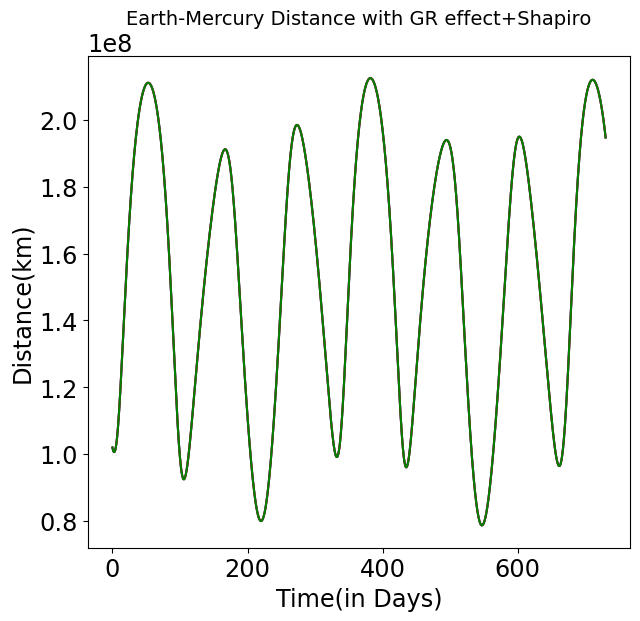

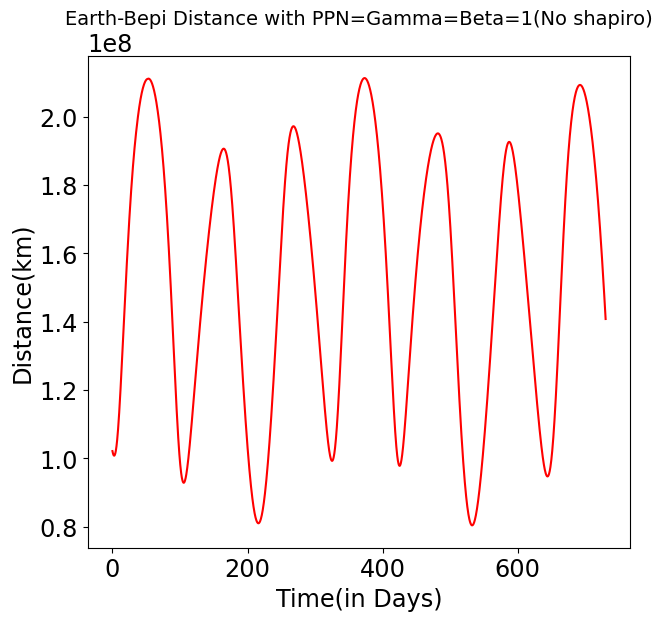

In [ ]:
plt.figure()
plt.plot(times, EM2, label="Earth-Mercury dist(GRT)", color='blue')
plt.plot(times, EM2_shap, label="Earth-Mercury dist(shapiro+GRT)", color='red')
plt.plot(times, EM2_j, label="Earth-Mercury dist(shapiro-jupiter+GRT)", color='green')
plt.xlabel("Time(in Days)")
plt.ylabel("Distance(km)")
plt.title("Earth-Mercury Distance with GR effect+Shapiro", fontsize='14')
plt.show()

##############################################################################
plt.plot(times, BCE2, label="Earth-Bepi distance", color='red')
plt.xlabel("Time(in Days)")
plt.ylabel("Distance(km)")
plt.title("Earth-Bepi Distance with PPN=Gamma=Beta=1(No shapiro)", fontsize='14')
plt.show()

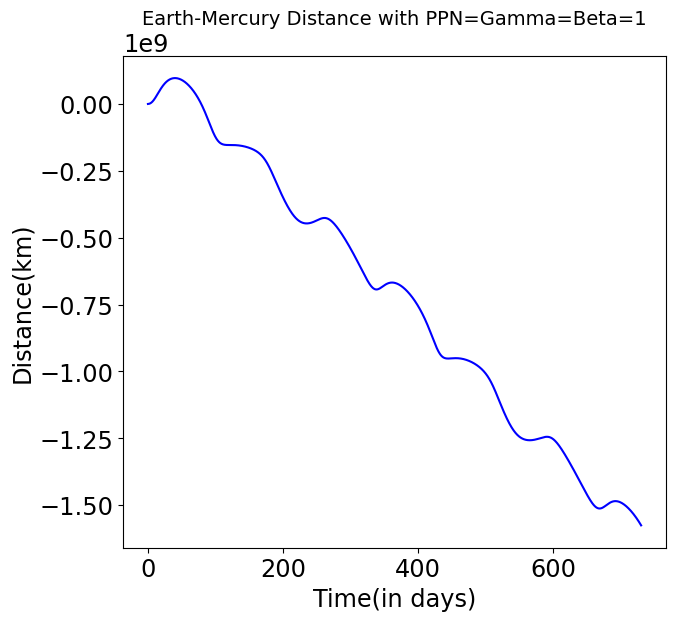

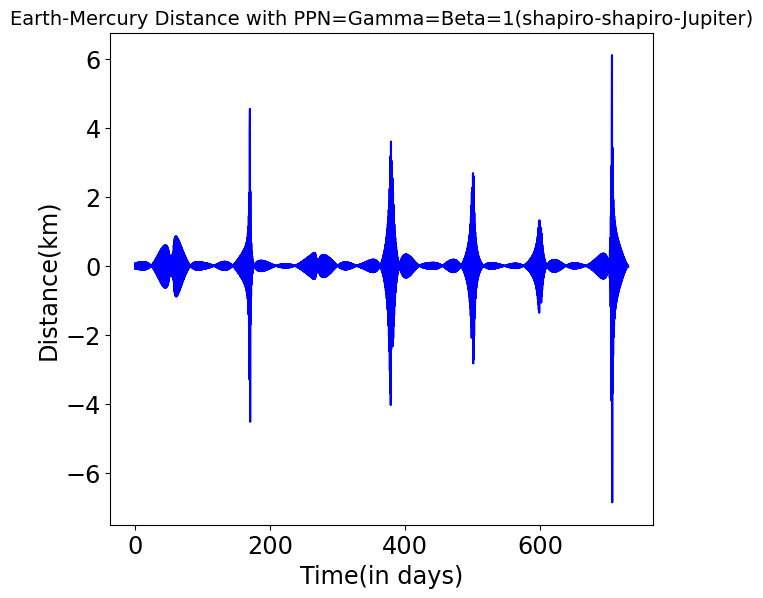

In [ ]:
plt.figure()
plt.plot(times, EM2-EM1, label="Earth-Mercury dist", color='blue')
plt.xlabel("Time(in days)")
plt.ylabel("Distance(km)")
plt.title("Earth-Mercury Distance with PPN=Gamma=Beta=1", fontsize='14')
plt.show()
########################################################################################
plt.figure()
plt.plot(times, EM2_shap-EM2_j, label="Earth-Mercury dist", color='blue')
plt.xlabel("Time(in days)")
plt.ylabel("Distance(km)")
plt.title("Earth-Mercury Distance with PPN=Gamma=Beta=1(shapiro-shapiro-Jupiter)", fontsize='14')
plt.show()

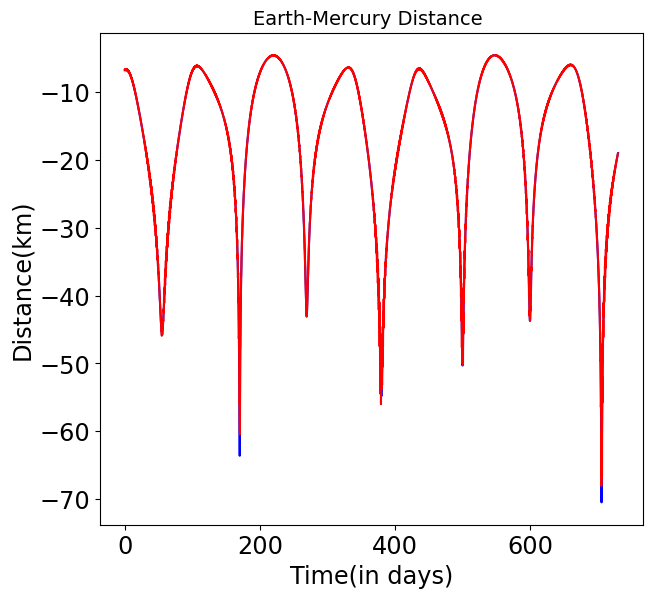

In [ ]:
plt.figure()
plt.plot(times, EM2-EM2_shap, label="Earth-Mercury dist(PPN fixed-PPN shapiro)", color='blue')
plt.plot(times,EM2-EM2_j, label="Jupiter_shapiro", color='red')
plt.xlabel("Time(in days)")
plt.ylabel("Distance(km)")
plt.title("Earth-Mercury Distance ", fontsize='14')
plt.show()

#######PPN when beta=gamma=variable###########################

In [ ]:
def PPN2(reb_sim):
    Nobj = Nobj2
    # Constants
    c = 3e5*86400
    c2 = c**2
    cm2 = 1/c2
    G = 6.67430e-20*(86400**2)
    gam=1.+1e-3
    bet=1.-2e-3
    r_vect = np.zeros((Nobj,Nobj,3))
    r2 = np.zeros((Nobj,Nobj))
    r = np.zeros((Nobj,Nobj))
    newt = np.zeros((Nobj,Nobj,3))
    mu = np.zeros(Nobj)
    v2 = np.zeros(Nobj)
    v_dot_v = np.zeros((Nobj,Nobj))
    r_dot_a = np.zeros((Nobj,Nobj))
    r_dot_vt = np.zeros((Nobj,Nobj))
    r_dot_va = np.zeros((Nobj,Nobj))
    for i in range(0,Nobj):
        mu[i] = G*ps[i].m
        v2[i] = ps[i].vx**2 + ps[i].vy**2 + ps[i].vz**2
    for i in range(0,Nobj):
        for j in range(0,Nobj):
            if (j!=i):
                r_vect[i,j,0] = ps[j].x-ps[i].x
                r_vect[i,j,1] = ps[j].y-ps[i].y
                r_vect[i,j,2] = ps[j].z-ps[i].z
                r_vect[j,i,0] = -r_vect[i,j,0]
                r_vect[j,i,1] = -r_vect[i,j,1]
                r_vect[j,i,2] = -r_vect[i,j,2]
                r2[i,j] = r_vect[i,j,0]**2 + r_vect[i,j,1]**2 + r_vect[i,j,2]**2
                r2[j,i] = r2[i,j]
                r[i,j] = np.sqrt(r2[i,j])
                r[j,i] = r[i,j]
                newt[i,j,0] = mu[i]*r_vect[i,j,0]/(r2[i,j]*r[i,j])
                newt[i,j,1] = mu[i]*r_vect[i,j,1]/(r2[i,j]*r[i,j])
                newt[i,j,2] = mu[i]*r_vect[i,j,2]/(r2[i,j]*r[i,j])
                v_dot_v[i,j] = ps[i].vx*ps[j].vx + ps[i].vy*ps[j].vy + ps[i].vz*ps[j].vz
                r_dot_a[i,j] = r_vect[i,j,0]*ps[i].ax + r_vect[i,j,1]*ps[i].ay + r_vect[i,j,2]*ps[i].az
                r_dot_vt[i,j] = r_vect[i,j,0]*ps[j].vx + r_vect[i,j,1]*ps[j].vy + r_vect[i,j,2]*ps[j].vz
                r_dot_va[i,j] = r_vect[i,j,0]*ps[i].vx + r_vect[i,j,1]*ps[i].vy + r_vect[i,j,2]*ps[i].vz
    for i in range(0,Nobj):
        for j in range(0,Nobj):
            if (j!=i):
                ps[j].ax += cm2* (-newt[i,j,0] * (gam*v2[j] + (1+gam)*v2[i] - 2*(1+gam)*v_dot_v[i,j]
                                                  - 1.5*(r_dot_va[i,j]/r[i,j])**2 - 0.5*r_dot_a[i,j])
                                  + mu[i]/(r2[i,j]*r[i,j]) * (2*(1+gam)*r_dot_vt[i,j]
                                                             - (1+2*gam)*r_dot_va[i,j])*(ps[j].vx-ps[i].vx)
                                  + 0.5*(3+4*gam)*mu[i]*ps[i].ax/r[i,j])
                ps[j].ay += cm2* (-newt[i,j,1] * (gam*v2[j] + (1+gam)*v2[i] - 2*(1+gam)*v_dot_v[i,j]
                                                  - 1.5*(r_dot_va[i,j]/r[i,j])**2 - 0.5*r_dot_a[i,j])
                                  + mu[i]/(r2[i,j]*r[i,j]) * (2*(1+gam)*r_dot_vt[i,j]
                                                             - (1+2*gam)*r_dot_va[i,j])*(ps[j].vy-ps[i].vy)
                                  + 0.5*(3+4*gam)*mu[i]*ps[i].ay/r[i,j])
                ps[j].az += cm2* (-newt[i,j,2] * (gam*v2[j] + (1+gam)*v2[i] - 2*(1+gam)*v_dot_v[i,j]
                                                  - 1.5*(r_dot_va[i,j]/r[i,j])**2 - 0.5*r_dot_a[i,j])
                                  + mu[i]/(r2[i,j]*r[i,j]) * (2*(1+gam)*r_dot_vt[i,j]
                                                             - (1+2*gam)*r_dot_va[i,j])*(ps[j].vz-ps[i].vz)
                                  + 0.5*(3+4*gam)*mu[i]*ps[i].az/r[i,j])
                for b in range(0,Nobj):
                    if (b!=j):
                        ps[j].ax += cm2* (newt[i,j,0]*2*(gam+bet)*mu[b]/r[j,b])
                        ps[j].ay += cm2* (newt[i,j,1]*2*(gam+bet)*mu[b]/r[j,b])
                        ps[j].az += cm2* (newt[i,j,2]*2*(gam+bet)*mu[b]/r[j,b])
                    if (b!=i):
                        ps[j].ax += cm2* (newt[i,j,0]*(2*bet-1)*mu[b]/r[i,b])
                        ps[j].ay += cm2* (newt[i,j,1]*(2*bet-1)*mu[b]/r[i,b])
                        ps[j].az += cm2* (newt[i,j,2]*(2*bet-1)*mu[b]/r[i,b])


In [ ]:
sim3 = setupsim2()
sim3.integrator = "whfast"
sim3.move_to_com()
ps3 = sim3.particles
ps = sim3.particles

In [ ]:
gam=1.+1e-3
bet=1.-2e-3

sim3.additional_forces = PPN2
sim3.force_is_velocity_dependent = 1

In [ ]:
Nobj = Nobj2
x3 = np.zeros((Nobj,Nout))
y3 = np.zeros((Nobj,Nout))
z3 = np.zeros((Nobj,Nout))
a3 = np.zeros((Nobj,Nout))
e3 = np.zeros((Nobj,Nout))
Omega3 = np.zeros((Nobj,Nout))
omega3 = np.zeros((Nobj,Nout))
pomega3 = np.zeros((Nobj,Nout))
inc3 = np.zeros((Nobj,Nout))
from tqdm import tqdm
for i,time in tqdm(enumerate(times)):
    sim3.integrate(time)
    for j in range(Nobj):
        x3[j][i] = ps3[j].x
        y3[j][i] = ps3[j].y
        z3[j][i] = ps3[j].z
        if j>0:
            a3[j][i] = ps3[j].a
            e3[j][i] = ps3[j].e
            pomega3[j][i] = ps3[j].pomega
            Omega3[j][i] = ps3[j].Omega
            omega3[j][i] = ps3[j].omega
            inc3[j][i] = ps3[j].inc

2190it [42:28,  1.16s/it]


In [ ]:
EM3 = np.sqrt((x3[1]-x3[3])**2+(y3[1]-y3[3])**2+(z3[1]-z3[3])**2)#earth-mercury distance
BE3 = np.sqrt(x3[3]**2+y3[3]**2+z3[3]**2)#earth distance from barycenter
BM3 = np.sqrt(x3[1]**2+y3[1]**2+z3[1]**2)#mercury distance from barycenter
BCE3 = np.sqrt((x3[3]-x3[2])**2+(y3[3]-y3[2])**2+(z3[3]-z3[2])**2)#earth-bepi distance

In [ ]:
#Shapiro delay in accordance with Jupiter
JE3 = np.sqrt((x3[4]-x3[3])**2+(y3[4]-y3[3])**2+(z3[4]-z3[3])**2)#jupiter-earth distance
JM3 = np.sqrt((x3[4]-x3[1])**2+(y3[4]-y3[1])**2+(z3[4]-z3[1])**2)#jupiter-mercury distance

#now we are considering the shapiro delay
def shapiro(BE,BM,EM):
    upp=BE+BM+EM
    low=BE+BM-EM
    G = 6.67430e-20
    c = 3e5
    m = 1.989e30
    gam=1.+1e-3
    T1=np.log(upp/low)
    shc=2*(1+gam)*(G*m)/(c**3)
    delay=shc*T1#shapiro time delay
    return delay

In [ ]:
shap_gr3 = shapiro(BE3, BM3, EM3)
shap_j3 = shapiro(JE3, JM3, EM3)
shap_d3 = c*shap_gr3#shapiro time delay distance
shap_dj3 = c*shap_j3
EM3_shap = EM3+shap_d3 #adding the effect of the shapiro delay to the earth-mercury distance
EM3_j = EM3+shap_dj3



print("Earth-mercury distance in accordance with GR effect with all perturber effects:", EM3)
print("Earth-mercury distance in accordance with GR effect+shapiro with all perturber effects:", EM3_shap)
print("Earth-mercury distance in accordance with GR effect+shapiro-jupiter with all perturber effects:", EM3_j)

Earth-mercury distance in accordance with GR effect with all perturber effects: [1.01965936e+08 1.01644700e+08 1.01365177e+08 ... 1.95889155e+08
 1.95306441e+08 1.94712757e+08]
Earth-mercury distance in accordance with GR effect+shapiro with all perturber effects: [1.02549528e+08 1.02227059e+08 1.01946580e+08 ... 1.97562148e+08
 1.96964833e+08 1.96356683e+08]
Earth-mercury distance in accordance with GR effect+shapiro-jupiter with all perturber effects: [1.02556311e+08 1.02220288e+08 1.01953602e+08 ... 1.97562651e+08
 1.96962999e+08 1.96359182e+08]


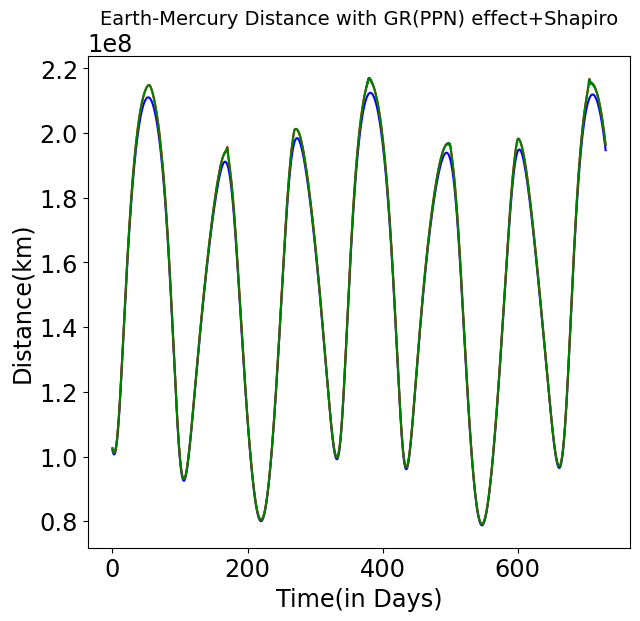

In [ ]:
#Plotting the earth-mercury distance to see the impact of the perturbers
plt.figure()
plt.plot(times, EM3, label="Earth-Mercury dist(GRT-PPN)", color='blue')
plt.plot(times, EM3_shap, label="Earth-Mercury dist(shapiro+GRT-PPN)", color='red')
plt.plot(times, EM3_j, label="Earth-Mercury dist(shapiro-jupiter+GRT-PPN)", color='green')
plt.xlabel("Time(in Days)")
plt.ylabel("Distance(km)")
plt.title("Earth-Mercury Distance with GR(PPN) effect+Shapiro", fontsize='14')
plt.show()

############do the comparison plot same as previous and plot for bepi-earth distance too##########

#############################################################################################
###################SUN J2 Effect added to newton case###################

In [ ]:
import reboundx
print("Sun J2 effect adding to the system")
sim4 = setupsim2()
sim4.integrator = "whfast"
sim4.move_to_com()
ps4 = sim4.particles

Sun J2 effect adding to the system


In [ ]:
rebx1 = reboundx.Extras(sim4)
gh = rebx1.load_force("gravitational_harmonics")
rebx1.add_force(gh)
ps4["sun"].params["J2"] = 2.2e-7
ps4["sun"].params["R_eq"] = 695700

In [ ]:
print("still running at J2")
Nobj = Nobj2
x4 = np.zeros((Nobj,Nout))
y4 = np.zeros((Nobj,Nout))
z4 = np.zeros((Nobj,Nout))
a4 = np.zeros((Nobj,Nout))
e4 = np.zeros((Nobj,Nout))
Omega4 = np.zeros((Nobj,Nout))
omega4 = np.zeros((Nobj,Nout))
pomega4 = np.zeros((Nobj,Nout))
inc4 = np.zeros((Nobj,Nout))
print("going to loop")
for i,time in tqdm(enumerate(times)):
	#print(i)
	sim4.integrate(time)
	#print("j loop")
	for j in range(Nobj):
		x4[j][i] = ps4[j].x
		y4[j][i] = ps4[j].y
		z4[j][i] = ps4[j].z
		if j>0:
			a4[j][i] = ps4[j].a
			e4[j][i] = ps4[j].e
			pomega4[j][i] = ps4[j].pomega
			Omega4[j][i] = ps4[j].Omega
			omega4[j][i] = ps4[j].omega
			inc4[j][i] = ps4[j].inc



print("loop done")

still running at J2
going to loop


2190it [00:01, 1173.84it/s]

loop done


In [ ]:
EM4 = np.sqrt((x4[1]-x4[3])**2+(y4[1]-y4[3])**2+(z4[1]-z4[3])**2)#earth-mercury distance from Sun J2
BC4 = np.sqrt(x4[2]**2+y4[2]**2+z4[2]**2)#bepi colombo orbit adding GR effect with respect to Barycenter
BCE4 = np.sqrt((x4[3]-x4[2])**2+(y4[3]-y4[2])**2+(z4[3]-z4[2])**2)#earth-bepi distance

print("Earth-mercury distance in accordance with Sun J2 effect with all perturber effects:", EM4)
print("Earth-Bepi distance in accordance with Sun J2 effect with all perturber effects:", BCE4)


Earth-mercury distance in accordance with Sun J2 effect with all perturber effects: [1.01965936e+08 1.01644700e+08 1.01365177e+08 ... 1.95888792e+08
 1.95306070e+08 1.94712379e+08]
Earth-Bepi distance in accordance with Sun J2 effect with all perturber effects: [1.02108247e+08 1.01786718e+08 1.01506398e+08 ... 1.43085907e+08
 1.41925859e+08 1.40760139e+08]


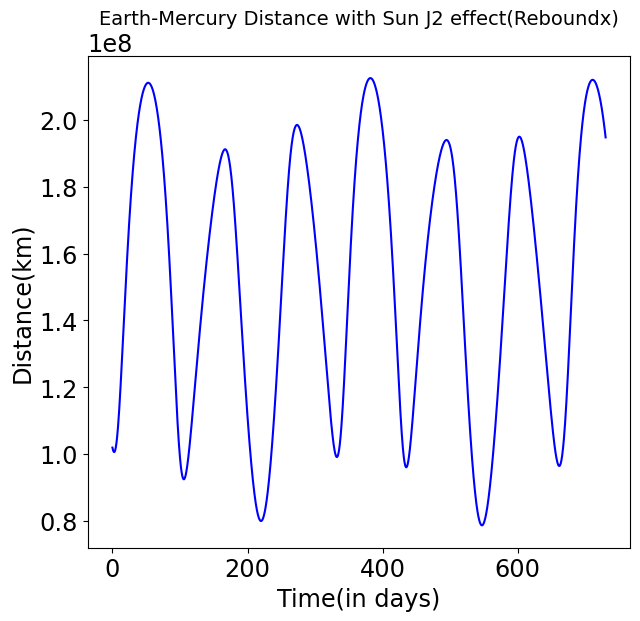

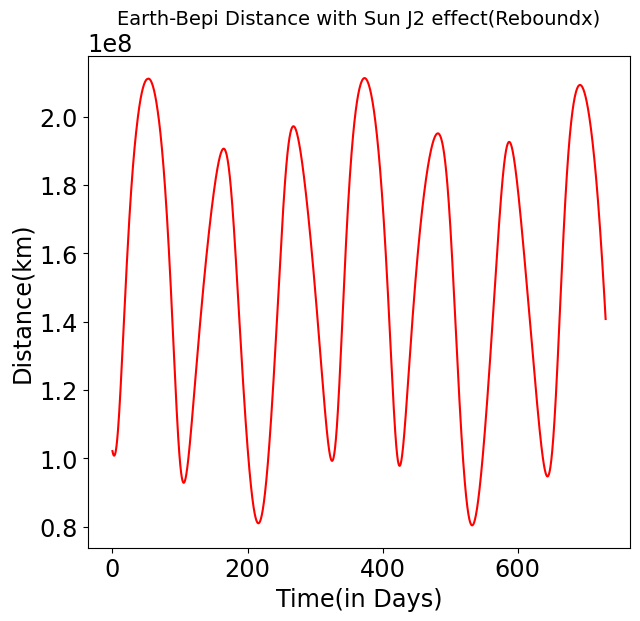

In [ ]:
plt.figure()
plt.plot(times, EM4, label="Earth-Mercury dist", color='blue')
plt.xlabel("Time(in days)")
plt.ylabel("Distance(km)")
plt.title("Earth-Mercury Distance with Sun J2 effect(Reboundx)", fontsize='14')
plt.show()
#############################################################################################
plt.figure()
plt.plot(times, BCE4, label="Earth-Bepi distance", color='red')
plt.xlabel("Time(in Days)")
plt.ylabel("Distance(km)")
plt.title("Earth-Bepi Distance with Sun J2 effect(Reboundx)", fontsize='14')
plt.show()

#################################################################################################
############SUN J2 to PPN(BETA=GAMMA=1)#####################

In [ ]:
def PPN_J(reb_sim, particles, force, dt):#refers to GR
    c = 3e5*86400 #km/day
    Nobj = Nobj2
    c2 = c**2
    cm2 = 1/c2
    G = 6.67430e-20*(86400**2) #km^3 kg^-1 days^-2
    gam = 1.
    bet = 1.
    r_vect = np.zeros((Nobj,Nobj,3))
    r2 = np.zeros((Nobj,Nobj))
    r = np.zeros((Nobj,Nobj))
    newt = np.zeros((Nobj,Nobj,3))
    mu = np.zeros(Nobj)
    v2 = np.zeros(Nobj)
    v_dot_v = np.zeros((Nobj,Nobj))
    r_dot_a = np.zeros((Nobj,Nobj))
    r_dot_vt = np.zeros((Nobj,Nobj))
    r_dot_va = np.zeros((Nobj,Nobj))
    for i in range(0,Nobj):
        mu[i] = G*ps[i].m
        v2[i] = ps[i].vx**2 + ps[i].vy**2 + ps[i].vz**2
    for i in range(0,Nobj):
        for j in range(0,Nobj):
            if (j!=i):
                r_vect[i,j,0] = ps[j].x-ps[i].x
                r_vect[i,j,1] = ps[j].y-ps[i].y
                r_vect[i,j,2] = ps[j].z-ps[i].z
                r_vect[j,i,0] = -r_vect[i,j,0]
                r_vect[j,i,1] = -r_vect[i,j,1]
                r_vect[j,i,2] = -r_vect[i,j,2]
                r2[i,j] = r_vect[i,j,0]**2 + r_vect[i,j,1]**2 + r_vect[i,j,2]**2
                r2[j,i] = r2[i,j]
                r[i,j] = np.sqrt(r2[i,j])
                r[j,i] = r[i,j]
                newt[i,j,0] = mu[i]*r_vect[i,j,0]/(r2[i,j]*r[i,j])
                newt[i,j,1] = mu[i]*r_vect[i,j,1]/(r2[i,j]*r[i,j])
                newt[i,j,2] = mu[i]*r_vect[i,j,2]/(r2[i,j]*r[i,j])
                v_dot_v[i,j] = ps[i].vx*ps[j].vx + ps[i].vy*ps[j].vy + ps[i].vz*ps[j].vz
                r_dot_a[i,j] = r_vect[i,j,0]*ps[i].ax + r_vect[i,j,1]*ps[i].ay + r_vect[i,j,2]*ps[i].az
                r_dot_vt[i,j] = r_vect[i,j,0]*ps[j].vx + r_vect[i,j,1]*ps[j].vy + r_vect[i,j,2]*ps[j].vz
                r_dot_va[i,j] = r_vect[i,j,0]*ps[i].vx + r_vect[i,j,1]*ps[i].vy + r_vect[i,j,2]*ps[i].vz
    for i in range(0,Nobj):
        for j in range(0,Nobj):
            if (j!=i):
                ps[j].ax += cm2* (-newt[i,j,0] * (gam*v2[j] + (1+gam)*v2[i] - 2*(1+gam)*v_dot_v[i,j]
                                                  - 1.5*(r_dot_va[i,j]/r[i,j])**2 - 0.5*r_dot_a[i,j])
                                  + mu[i]/(r2[i,j]*r[i,j]) * (2*(1+gam)*r_dot_vt[i,j]
                                                             - (1+2*gam)*r_dot_va[i,j])*(ps[j].vx-ps[i].vx)
                                  + 0.5*(3+4*gam)*mu[i]*ps[i].ax/r[i,j])
                ps[j].ay += cm2* (-newt[i,j,1] * (gam*v2[j] + (1+gam)*v2[i] - 2*(1+gam)*v_dot_v[i,j]
                                                  - 1.5*(r_dot_va[i,j]/r[i,j])**2 - 0.5*r_dot_a[i,j])
                                  + mu[i]/(r2[i,j]*r[i,j]) * (2*(1+gam)*r_dot_vt[i,j]
                                                             - (1+2*gam)*r_dot_va[i,j])*(ps[j].vy-ps[i].vy)
                                  + 0.5*(3+4*gam)*mu[i]*ps[i].ay/r[i,j])
                ps[j].az += cm2* (-newt[i,j,2] * (gam*v2[j] + (1+gam)*v2[i] - 2*(1+gam)*v_dot_v[i,j]
                                                  - 1.5*(r_dot_va[i,j]/r[i,j])**2 - 0.5*r_dot_a[i,j])
                                  + mu[i]/(r2[i,j]*r[i,j]) * (2*(1+gam)*r_dot_vt[i,j]
                                                             - (1+2*gam)*r_dot_va[i,j])*(ps[j].vz-ps[i].vz)
                                  + 0.5*(3+4*gam)*mu[i]*ps[i].az/r[i,j])
                for b in range(0,Nobj):
                    if (b!=j):
                        ps[j].ax += cm2* (newt[i,j,0]*2*(gam+bet)*mu[b]/r[j,b])
                        ps[j].ay += cm2* (newt[i,j,1]*2*(gam+bet)*mu[b]/r[j,b])
                        ps[j].az += cm2* (newt[i,j,2]*2*(gam+bet)*mu[b]/r[j,b])
                    if (b!=i):
                        ps[j].ax += cm2* (newt[i,j,0]*(2*bet-1)*mu[b]/r[i,b])
                        ps[j].ay += cm2* (newt[i,j,1]*(2*bet-1)*mu[b]/r[i,b])
                        ps[j].az += cm2* (newt[i,j,2]*(2*bet-1)*mu[b]/r[i,b])


In [ ]:
sim5 = setupsim2()
sim5.integrator = "whfast"
sim5.move_to_com()
ps5 = sim5.particles
ps = sim5.particles

In [ ]:
import reboundx
rebx2 = reboundx.Extras(sim5)

ppn_force = rebx2.create_force("ppn_force")
ppn_force.force_type = "vel"  # Since it's velocity dependent
ppn_force.update_accelerations = PPN_J
rebx2.add_force(ppn_force)

# Set velocity dependence flag
sim5.force_is_velocity_dependent = 1

gh1 = rebx2.load_force("gravitational_harmonics")
rebx2.add_force(gh1)
ps5["sun"].params["J2"] = 2.2e-7
ps5["sun"].params["R_eq"] = 695700

In [ ]:
Nobj = Nobj2
x5 = np.zeros((Nobj,Nout))
y5 = np.zeros((Nobj,Nout))
z5 = np.zeros((Nobj,Nout))
a5 = np.zeros((Nobj,Nout))
e5 = np.zeros((Nobj,Nout))
Omega5 = np.zeros((Nobj,Nout))
omega5 = np.zeros((Nobj,Nout))
pomega5 = np.zeros((Nobj,Nout))
inc5 = np.zeros((Nobj,Nout))
print("loop starting")
for i,time in tqdm(enumerate(times)):
	sim5.integrate(time)
	print("loop", i)
	for j in range(Nobj):
		x5[j][i] = ps5[j].x
		y5[j][i] = ps5[j].y
		z5[j][i] = ps5[j].z
		if j>0:
			a5[j][i] = ps5[j].a
			e5[j][i] = ps5[j].e
			pomega5[j][i] = ps5[j].pomega
			Omega5[j][i] = ps5[j].Omega
			omega5[j][i] = ps5[j].omega
			inc5[j][i] = ps5[j].inc
print("loop done")

loop starting


0it [00:00, ?it/s]

loop 0


2it [00:01,  1.89it/s]

loop 1


3it [00:02,  1.33it/s]

loop 2


4it [00:03,  1.06s/it]

loop 3


5it [00:05,  1.35s/it]

loop 4


6it [00:06,  1.28s/it]

loop 5


7it [00:07,  1.21s/it]

loop 6


8it [00:08,  1.17s/it]

loop 7


9it [00:09,  1.13s/it]

loop 8


10it [00:10,  1.11s/it]

loop 9


11it [00:12,  1.10s/it]

loop 10


12it [00:13,  1.08s/it]

loop 11


13it [00:14,  1.07s/it]

loop 12


14it [00:15,  1.07s/it]

loop 13


15it [00:16,  1.21s/it]

loop 14


16it [00:18,  1.42s/it]

loop 15


17it [00:19,  1.34s/it]

loop 16


18it [00:20,  1.25s/it]

loop 17


19it [00:21,  1.19s/it]

loop 18


20it [00:22,  1.15s/it]

loop 19


21it [00:24,  1.12s/it]

loop 20


22it [00:25,  1.10s/it]

loop 21


23it [00:26,  1.09s/it]

loop 22


24it [00:27,  1.09s/it]

loop 23


25it [00:28,  1.08s/it]

loop 24


26it [00:29,  1.22s/it]

loop 25


27it [00:31,  1.47s/it]

loop 26


28it [00:33,  1.37s/it]

loop 27


29it [00:34,  1.27s/it]

loop 28


30it [00:35,  1.20s/it]

loop 29


31it [00:36,  1.16s/it]

loop 30


32it [00:37,  1.13s/it]

loop 31


33it [00:38,  1.10s/it]

loop 32


34it [00:39,  1.09s/it]

loop 33


35it [00:40,  1.09s/it]

loop 34


36it [00:41,  1.09s/it]

loop 35


37it [00:42,  1.21s/it]

loop 36


38it [00:45,  1.47s/it]

loop 37


39it [00:46,  1.34s/it]

loop 38


40it [00:47,  1.26s/it]

loop 39


41it [00:48,  1.20s/it]

loop 40


42it [00:49,  1.16s/it]

loop 41


43it [00:50,  1.13s/it]

loop 42


44it [00:51,  1.11s/it]

loop 43


45it [00:52,  1.09s/it]

loop 44


46it [00:53,  1.09s/it]

loop 45


47it [00:54,  1.08s/it]

loop 46


48it [00:56,  1.24s/it]

loop 47


49it [00:58,  1.46s/it]

loop 48


50it [00:59,  1.37s/it]

loop 49


51it [01:00,  1.27s/it]

loop 50


52it [01:01,  1.20s/it]

loop 51


53it [01:02,  1.16s/it]

loop 52


54it [01:03,  1.14s/it]

loop 53


55it [01:04,  1.12s/it]

loop 54


56it [01:05,  1.10s/it]

loop 55


57it [01:06,  1.09s/it]

loop 56


58it [01:07,  1.09s/it]

loop 57


59it [01:09,  1.27s/it]

loop 58


60it [01:11,  1.46s/it]

loop 59


61it [01:12,  1.34s/it]

loop 60


62it [01:13,  1.25s/it]

loop 61


63it [01:14,  1.20s/it]

loop 62


64it [01:15,  1.16s/it]

loop 63


65it [01:16,  1.13s/it]

loop 64


66it [01:17,  1.11s/it]

loop 65


67it [01:18,  1.09s/it]

loop 66


68it [01:19,  1.08s/it]

loop 67


69it [01:20,  1.07s/it]

loop 68


70it [01:22,  1.29s/it]

loop 69


71it [01:24,  1.44s/it]

loop 70


72it [01:25,  1.33s/it]

loop 71


73it [01:26,  1.25s/it]

loop 72


74it [01:27,  1.20s/it]

loop 73


75it [01:28,  1.17s/it]

loop 74


76it [01:29,  1.14s/it]

loop 75


77it [01:31,  1.11s/it]

loop 76


78it [01:32,  1.09s/it]

loop 77


79it [01:33,  1.09s/it]

loop 78


80it [01:34,  1.08s/it]

loop 79


81it [01:35,  1.27s/it]

loop 80


82it [01:37,  1.45s/it]

loop 81


83it [01:38,  1.34s/it]

loop 82


84it [01:39,  1.27s/it]

loop 83


85it [01:41,  1.21s/it]

loop 84


86it [01:42,  1.17s/it]

loop 85


87it [01:43,  1.14s/it]

loop 86


88it [01:44,  1.11s/it]

loop 87


89it [01:45,  1.10s/it]

loop 88


90it [01:46,  1.08s/it]

loop 89


91it [01:47,  1.07s/it]

loop 90


92it [01:49,  1.30s/it]

loop 91


93it [01:50,  1.44s/it]

loop 92


94it [01:52,  1.33s/it]

loop 93


95it [01:53,  1.25s/it]

loop 94


96it [01:54,  1.19s/it]

loop 95


97it [01:55,  1.15s/it]

loop 96


98it [01:56,  1.13s/it]

loop 97


99it [01:57,  1.11s/it]

loop 98


100it [01:58,  1.09s/it]

loop 99


101it [01:59,  1.08s/it]

loop 100


102it [02:00,  1.07s/it]

loop 101


103it [02:02,  1.29s/it]

loop 102


104it [02:04,  1.41s/it]

loop 103


105it [02:05,  1.31s/it]

loop 104


106it [02:06,  1.23s/it]

loop 105


107it [02:07,  1.18s/it]

loop 106


108it [02:08,  1.14s/it]

loop 107


109it [02:09,  1.10s/it]

loop 108


110it [02:10,  1.08s/it]

loop 109


111it [02:11,  1.07s/it]

loop 110


112it [02:12,  1.06s/it]

loop 111


113it [02:13,  1.06s/it]

loop 112


114it [02:15,  1.24s/it]

loop 113


115it [02:16,  1.43s/it]

loop 114


116it [02:17,  1.31s/it]

loop 115


117it [02:19,  1.23s/it]

loop 116


118it [02:20,  1.17s/it]

loop 117


119it [02:21,  1.13s/it]

loop 118


120it [02:22,  1.11s/it]

loop 119


121it [02:23,  1.09s/it]

loop 120


122it [02:24,  1.08s/it]

loop 121


123it [02:25,  1.07s/it]

loop 122


124it [02:26,  1.07s/it]

loop 123


125it [02:27,  1.19s/it]

loop 124


126it [02:29,  1.41s/it]

loop 125


127it [02:30,  1.33s/it]

loop 126


128it [02:31,  1.25s/it]

loop 127


129it [02:33,  1.19s/it]

loop 128


130it [02:34,  1.14s/it]

loop 129


131it [02:35,  1.11s/it]

loop 130


132it [02:36,  1.09s/it]

loop 131


133it [02:37,  1.08s/it]

loop 132


134it [02:38,  1.07s/it]

loop 133


135it [02:39,  1.07s/it]

loop 134


136it [02:40,  1.17s/it]

loop 135


137it [02:42,  1.40s/it]

loop 136


138it [02:43,  1.34s/it]

loop 137


139it [02:44,  1.26s/it]

loop 138


140it [02:45,  1.20s/it]

loop 139


141it [02:47,  1.15s/it]

loop 140


142it [02:48,  1.12s/it]

loop 141


143it [02:49,  1.10s/it]

loop 142


144it [02:50,  1.09s/it]

loop 143


145it [02:51,  1.08s/it]

loop 144


146it [02:52,  1.07s/it]

loop 145


147it [02:53,  1.14s/it]

loop 146


148it [02:55,  1.36s/it]

loop 147


149it [02:56,  1.37s/it]

loop 148


150it [02:57,  1.28s/it]

loop 149


151it [02:58,  1.21s/it]

loop 150


152it [03:00,  1.16s/it]

loop 151


153it [03:01,  1.13s/it]

loop 152


154it [03:02,  1.11s/it]

loop 153


155it [03:03,  1.10s/it]

loop 154


156it [03:04,  1.08s/it]

loop 155


157it [03:05,  1.08s/it]

loop 156


158it [03:06,  1.13s/it]

loop 157


159it [03:08,  1.37s/it]

loop 158


160it [03:09,  1.38s/it]

loop 159


161it [03:10,  1.28s/it]

loop 160


162it [03:12,  1.21s/it]

loop 161


163it [03:13,  1.17s/it]

loop 162


164it [03:14,  1.13s/it]

loop 163


165it [03:15,  1.10s/it]

loop 164


166it [03:16,  1.08s/it]

loop 165


167it [03:17,  1.07s/it]

loop 166


168it [03:18,  1.06s/it]

loop 167


169it [03:19,  1.06s/it]

loop 168


170it [03:21,  1.32s/it]

loop 169


171it [03:22,  1.39s/it]

loop 170


172it [03:23,  1.29s/it]

loop 171


173it [03:24,  1.21s/it]

loop 172


174it [03:25,  1.16s/it]

loop 173


175it [03:26,  1.13s/it]

loop 174


176it [03:28,  1.11s/it]

loop 175


177it [03:29,  1.09s/it]

loop 176


178it [03:30,  1.07s/it]

loop 177


179it [03:31,  1.07s/it]

loop 178


180it [03:32,  1.06s/it]

loop 179


181it [03:34,  1.30s/it]

loop 180


182it [03:35,  1.42s/it]

loop 181


183it [03:36,  1.31s/it]

loop 182


184it [03:37,  1.23s/it]

loop 183


185it [03:38,  1.18s/it]

loop 184


186it [03:39,  1.14s/it]

loop 185


187it [03:41,  1.11s/it]

loop 186


188it [03:42,  1.09s/it]

loop 187


189it [03:43,  1.08s/it]

loop 188


190it [03:44,  1.07s/it]

loop 189


191it [03:45,  1.06s/it]

loop 190


192it [03:46,  1.26s/it]

loop 191


193it [03:48,  1.41s/it]

loop 192


194it [03:49,  1.31s/it]

loop 193


195it [03:50,  1.23s/it]

loop 194


196it [03:51,  1.17s/it]

loop 195


197it [03:52,  1.13s/it]

loop 196


198it [03:53,  1.11s/it]

loop 197


199it [03:54,  1.09s/it]

loop 198


200it [03:56,  1.08s/it]

loop 199


201it [03:57,  1.07s/it]

loop 200


202it [03:58,  1.09s/it]

loop 201


203it [03:59,  1.25s/it]

loop 202


204it [04:01,  1.45s/it]

loop 203


205it [04:02,  1.33s/it]

loop 204


206it [04:03,  1.25s/it]

loop 205


207it [04:04,  1.18s/it]

loop 206


208it [04:05,  1.14s/it]

loop 207


209it [04:06,  1.11s/it]

loop 208


210it [04:08,  1.09s/it]

loop 209


211it [04:09,  1.08s/it]

loop 210


212it [04:10,  1.08s/it]

loop 211


213it [04:11,  1.07s/it]

loop 212


214it [04:12,  1.20s/it]

loop 213


215it [04:14,  1.41s/it]

loop 214


216it [04:15,  1.34s/it]

loop 215


217it [04:16,  1.25s/it]

loop 216


218it [04:17,  1.18s/it]

loop 217


219it [04:18,  1.14s/it]

loop 218


220it [04:19,  1.11s/it]

loop 219


221it [04:20,  1.10s/it]

loop 220


222it [04:22,  1.08s/it]

loop 221


223it [04:23,  1.07s/it]

loop 222


224it [04:24,  1.08s/it]

loop 223


225it [04:25,  1.16s/it]

loop 224


226it [04:27,  1.39s/it]

loop 225


227it [04:28,  1.36s/it]

loop 226


228it [04:29,  1.27s/it]

loop 227


229it [04:30,  1.21s/it]

loop 228


230it [04:31,  1.17s/it]

loop 229


231it [04:33,  1.14s/it]

loop 230


232it [04:34,  1.11s/it]

loop 231


233it [04:35,  1.09s/it]

loop 232


234it [04:36,  1.08s/it]

loop 233


235it [04:37,  1.07s/it]

loop 234


236it [04:38,  1.13s/it]

loop 235


237it [04:40,  1.36s/it]

loop 236


238it [04:41,  1.36s/it]

loop 237


239it [04:42,  1.26s/it]

loop 238


240it [04:43,  1.21s/it]

loop 239


241it [04:44,  1.16s/it]

loop 240


242it [04:45,  1.12s/it]

loop 241


243it [04:46,  1.10s/it]

loop 242


244it [04:48,  1.08s/it]

loop 243


245it [04:49,  1.08s/it]

loop 244


246it [04:50,  1.08s/it]

loop 245


247it [04:51,  1.09s/it]

loop 246


248it [04:53,  1.33s/it]

loop 247


249it [04:54,  1.38s/it]

loop 248


250it [04:55,  1.29s/it]

loop 249


251it [04:56,  1.22s/it]

loop 250


252it [04:57,  1.18s/it]

loop 251


253it [04:58,  1.14s/it]

loop 252


254it [05:00,  1.12s/it]

loop 253


255it [05:01,  1.10s/it]

loop 254


256it [05:02,  1.08s/it]

loop 255


257it [05:03,  1.08s/it]

loop 256


258it [05:04,  1.11s/it]

loop 257


259it [05:06,  1.36s/it]

loop 258


260it [05:07,  1.40s/it]

loop 259


261it [05:08,  1.30s/it]

loop 260


262it [05:09,  1.23s/it]

loop 261


263it [05:10,  1.17s/it]

loop 262


264it [05:12,  1.14s/it]

loop 263


265it [05:13,  1.11s/it]

loop 264


266it [05:14,  1.09s/it]

loop 265


267it [05:15,  1.08s/it]

loop 266


268it [05:16,  1.07s/it]

loop 267


269it [05:17,  1.08s/it]

loop 268


270it [05:19,  1.35s/it]

loop 269


271it [05:20,  1.40s/it]

loop 270


272it [05:21,  1.30s/it]

loop 271


273it [05:22,  1.22s/it]

loop 272


274it [05:23,  1.17s/it]

loop 273


275it [05:25,  1.14s/it]

loop 274


276it [05:26,  1.11s/it]

loop 275


277it [05:27,  1.09s/it]

loop 276


278it [05:28,  1.09s/it]

loop 277


279it [05:29,  1.08s/it]

loop 278


280it [05:30,  1.07s/it]

loop 279


281it [05:32,  1.31s/it]

loop 280


282it [05:33,  1.41s/it]

loop 281


283it [05:34,  1.30s/it]

loop 282


284it [05:35,  1.24s/it]

loop 283


285it [05:37,  1.18s/it]

loop 284


286it [05:38,  1.14s/it]

loop 285


287it [05:39,  1.11s/it]

loop 286


288it [05:40,  1.09s/it]

loop 287


289it [05:41,  1.08s/it]

loop 288


290it [05:42,  1.08s/it]

loop 289


291it [05:43,  1.07s/it]

loop 290


292it [05:45,  1.27s/it]

loop 291


293it [05:46,  1.41s/it]

loop 292


294it [05:47,  1.30s/it]

loop 293


295it [05:48,  1.22s/it]

loop 294


296it [05:49,  1.17s/it]

loop 295


297it [05:51,  1.14s/it]

loop 296


298it [05:52,  1.11s/it]

loop 297


299it [05:53,  1.09s/it]

loop 298


300it [05:54,  1.08s/it]

loop 299


301it [05:55,  1.07s/it]

loop 300


302it [05:56,  1.06s/it]

loop 301


303it [05:57,  1.26s/it]

loop 302


304it [05:59,  1.45s/it]

loop 303


305it [06:00,  1.32s/it]

loop 304


306it [06:01,  1.24s/it]

loop 305


307it [06:03,  1.19s/it]

loop 306


308it [06:04,  1.15s/it]

loop 307


309it [06:05,  1.12s/it]

loop 308


310it [06:06,  1.10s/it]

loop 309


311it [06:07,  1.08s/it]

loop 310


312it [06:08,  1.07s/it]

loop 311


313it [06:09,  1.07s/it]

loop 312


314it [06:10,  1.21s/it]

loop 313


315it [06:12,  1.42s/it]

loop 314


316it [06:13,  1.33s/it]

loop 315


317it [06:14,  1.25s/it]

loop 316


318it [06:15,  1.19s/it]

loop 317


319it [06:17,  1.15s/it]

loop 318


320it [06:18,  1.11s/it]

loop 319


321it [06:19,  1.09s/it]

loop 320


322it [06:20,  1.09s/it]

loop 321


323it [06:21,  1.07s/it]

loop 322


324it [06:22,  1.07s/it]

loop 323


325it [06:23,  1.15s/it]

loop 324


326it [06:25,  1.38s/it]

loop 325


327it [06:26,  1.35s/it]

loop 326


328it [06:27,  1.27s/it]

loop 327


329it [06:28,  1.20s/it]

loop 328


330it [06:30,  1.16s/it]

loop 329


331it [06:31,  1.12s/it]

loop 330


332it [06:32,  1.10s/it]

loop 331


333it [06:33,  1.08s/it]

loop 332


334it [06:34,  1.07s/it]

loop 333


335it [06:35,  1.06s/it]

loop 334


336it [06:36,  1.12s/it]

loop 335


337it [06:38,  1.37s/it]

loop 336


338it [06:39,  1.38s/it]

loop 337


339it [06:40,  1.28s/it]

loop 338


340it [06:41,  1.21s/it]

loop 339


341it [06:42,  1.16s/it]

loop 340


342it [06:44,  1.13s/it]

loop 341


343it [06:45,  1.10s/it]

loop 342


344it [06:46,  1.08s/it]

loop 343


345it [06:47,  1.07s/it]

loop 344


346it [06:48,  1.07s/it]

loop 345


347it [06:49,  1.09s/it]

loop 346


348it [06:51,  1.33s/it]

loop 347


349it [06:52,  1.40s/it]

loop 348


350it [06:53,  1.29s/it]

loop 349


351it [06:54,  1.22s/it]

loop 350


352it [06:55,  1.17s/it]

loop 351


353it [06:56,  1.14s/it]

loop 352


354it [06:58,  1.12s/it]

loop 353


355it [06:59,  1.11s/it]

loop 354


356it [07:00,  1.10s/it]

loop 355


357it [07:01,  1.09s/it]

loop 356


358it [07:02,  1.08s/it]

loop 357


359it [07:04,  1.33s/it]

loop 358


360it [07:05,  1.41s/it]

loop 359


361it [07:06,  1.30s/it]

loop 360


362it [07:07,  1.22s/it]

loop 361


363it [07:09,  1.17s/it]

loop 362


364it [07:10,  1.13s/it]

loop 363


365it [07:11,  1.11s/it]

loop 364


366it [07:12,  1.09s/it]

loop 365


367it [07:13,  1.09s/it]

loop 366


368it [07:14,  1.08s/it]

loop 367


369it [07:15,  1.08s/it]

loop 368


370it [07:17,  1.30s/it]

loop 369


371it [07:18,  1.42s/it]

loop 370


372it [07:19,  1.31s/it]

loop 371


373it [07:20,  1.23s/it]

loop 372


374it [07:22,  1.18s/it]

loop 373


375it [07:23,  1.14s/it]

loop 374


376it [07:24,  1.11s/it]

loop 375


377it [07:25,  1.09s/it]

loop 376


378it [07:26,  1.07s/it]

loop 377


379it [07:27,  1.07s/it]

loop 378


380it [07:28,  1.07s/it]

loop 379


381it [07:30,  1.26s/it]

loop 380


382it [07:31,  1.46s/it]

loop 381


383it [07:32,  1.34s/it]

loop 382


384it [07:34,  1.25s/it]

loop 383


385it [07:35,  1.18s/it]

loop 384


386it [07:36,  1.14s/it]

loop 385


387it [07:37,  1.11s/it]

loop 386


388it [07:38,  1.10s/it]

loop 387


389it [07:39,  1.08s/it]

loop 388


390it [07:40,  1.07s/it]

loop 389


391it [07:41,  1.07s/it]

loop 390


392it [07:43,  1.24s/it]

loop 391


393it [07:44,  1.44s/it]

loop 392


394it [07:45,  1.32s/it]

loop 393


395it [07:47,  1.24s/it]

loop 394


396it [07:48,  1.18s/it]

loop 395


397it [07:49,  1.14s/it]

loop 396


398it [07:50,  1.12s/it]

loop 397


399it [07:51,  1.10s/it]

loop 398


400it [07:52,  1.08s/it]

loop 399


401it [07:53,  1.07s/it]

loop 400


402it [07:54,  1.07s/it]

loop 401


403it [07:55,  1.22s/it]

loop 402


404it [07:57,  1.44s/it]

loop 403


405it [07:59,  1.36s/it]

loop 404


406it [08:00,  1.27s/it]

loop 405


407it [08:01,  1.21s/it]

loop 406


408it [08:02,  1.17s/it]

loop 407


409it [08:03,  1.13s/it]

loop 408


410it [08:04,  1.11s/it]

loop 409


411it [08:05,  1.09s/it]

loop 410


412it [08:06,  1.08s/it]

loop 411


413it [08:07,  1.07s/it]

loop 412


414it [08:09,  1.20s/it]

loop 413


415it [08:10,  1.41s/it]

loop 414


416it [08:12,  1.34s/it]

loop 415


417it [08:13,  1.26s/it]

loop 416


418it [08:14,  1.21s/it]

loop 417


419it [08:15,  1.17s/it]

loop 418


420it [08:16,  1.13s/it]

loop 419


421it [08:17,  1.11s/it]

loop 420


422it [08:18,  1.09s/it]

loop 421


423it [08:19,  1.08s/it]

loop 422


424it [08:20,  1.07s/it]

loop 423


425it [08:22,  1.18s/it]

loop 424


426it [08:23,  1.40s/it]

loop 425


427it [08:25,  1.34s/it]

loop 426


428it [08:26,  1.25s/it]

loop 427


429it [08:27,  1.20s/it]

loop 428


430it [08:28,  1.16s/it]

loop 429


431it [08:29,  1.13s/it]

loop 430


432it [08:30,  1.11s/it]

loop 431


433it [08:31,  1.10s/it]

loop 432


434it [08:32,  1.09s/it]

loop 433


435it [08:33,  1.08s/it]

loop 434


436it [08:35,  1.18s/it]

loop 435


437it [08:37,  1.40s/it]

loop 436


438it [08:38,  1.36s/it]

loop 437


439it [08:39,  1.26s/it]

loop 438


440it [08:40,  1.20s/it]

loop 439


441it [08:41,  1.15s/it]

loop 440


442it [08:42,  1.12s/it]

loop 441


443it [08:43,  1.10s/it]

loop 442


444it [08:44,  1.09s/it]

loop 443


445it [08:45,  1.07s/it]

loop 444


446it [08:46,  1.07s/it]

loop 445


447it [08:47,  1.12s/it]

loop 446


448it [08:49,  1.38s/it]

loop 447


449it [08:51,  1.37s/it]

loop 448


450it [08:52,  1.28s/it]

loop 449


451it [08:53,  1.21s/it]

loop 450


452it [08:54,  1.16s/it]

loop 451


453it [08:55,  1.13s/it]

loop 452


454it [08:56,  1.11s/it]

loop 453


455it [08:57,  1.10s/it]

loop 454


456it [08:58,  1.10s/it]

loop 455


457it [08:59,  1.09s/it]

loop 456


458it [09:01,  1.14s/it]

loop 457


459it [09:02,  1.37s/it]

loop 458


460it [09:04,  1.36s/it]

loop 459


461it [09:05,  1.27s/it]

loop 460


462it [09:06,  1.20s/it]

loop 461


463it [09:07,  1.15s/it]

loop 462


464it [09:08,  1.12s/it]

loop 463


465it [09:09,  1.10s/it]

loop 464


466it [09:10,  1.08s/it]

loop 465


467it [09:11,  1.07s/it]

loop 466


468it [09:12,  1.07s/it]

loop 467


469it [09:13,  1.09s/it]

loop 468


470it [09:15,  1.34s/it]

loop 469


471it [09:17,  1.41s/it]

loop 470


472it [09:18,  1.31s/it]

loop 471


473it [09:19,  1.23s/it]

loop 472


474it [09:20,  1.17s/it]

loop 473


475it [09:21,  1.14s/it]

loop 474


476it [09:22,  1.11s/it]

loop 475


477it [09:23,  1.10s/it]

loop 476


478it [09:24,  1.08s/it]

loop 477


479it [09:25,  1.08s/it]

loop 478


480it [09:26,  1.07s/it]

loop 479


481it [09:28,  1.32s/it]

loop 480


482it [09:30,  1.42s/it]

loop 481


483it [09:31,  1.31s/it]

loop 482


484it [09:32,  1.23s/it]

loop 483


485it [09:33,  1.18s/it]

loop 484


486it [09:34,  1.14s/it]

loop 485


487it [09:35,  1.12s/it]

loop 486


488it [09:36,  1.10s/it]

loop 487


489it [09:37,  1.08s/it]

loop 488


490it [09:38,  1.08s/it]

loop 489


491it [09:39,  1.07s/it]

loop 490


492it [09:41,  1.28s/it]

loop 491


493it [09:43,  1.41s/it]

loop 492


494it [09:44,  1.30s/it]

loop 493


495it [09:45,  1.23s/it]

loop 494


496it [09:46,  1.18s/it]

loop 495


497it [09:47,  1.14s/it]

loop 496


498it [09:48,  1.11s/it]

loop 497


499it [09:49,  1.10s/it]

loop 498


500it [09:50,  1.10s/it]

loop 499


501it [09:51,  1.08s/it]

loop 500


502it [09:52,  1.07s/it]

loop 501


503it [09:54,  1.25s/it]

loop 502


504it [09:56,  1.43s/it]

loop 503


505it [09:57,  1.31s/it]

loop 504


506it [09:58,  1.24s/it]

loop 505


507it [09:59,  1.19s/it]

loop 506


508it [10:00,  1.15s/it]

loop 507


509it [10:01,  1.12s/it]

loop 508


510it [10:02,  1.10s/it]

loop 509


511it [10:03,  1.09s/it]

loop 510


512it [10:04,  1.08s/it]

loop 511


513it [10:05,  1.07s/it]

loop 512


514it [10:07,  1.25s/it]

loop 513


515it [10:09,  1.44s/it]

loop 514


516it [10:10,  1.33s/it]

loop 515


517it [10:11,  1.25s/it]

loop 516


518it [10:12,  1.19s/it]

loop 517


519it [10:13,  1.15s/it]

loop 518


520it [10:14,  1.12s/it]

loop 519


521it [10:15,  1.10s/it]

loop 520


522it [10:16,  1.09s/it]

loop 521


523it [10:17,  1.07s/it]

loop 522


524it [10:18,  1.07s/it]

loop 523


525it [10:20,  1.22s/it]

loop 524


526it [10:22,  1.44s/it]

loop 525


527it [10:23,  1.32s/it]

loop 526


528it [10:24,  1.24s/it]

loop 527


529it [10:25,  1.19s/it]

loop 528


530it [10:26,  1.15s/it]

loop 529


531it [10:27,  1.13s/it]

loop 530


532it [10:28,  1.11s/it]

loop 531


533it [10:29,  1.10s/it]

loop 532


534it [10:30,  1.09s/it]

loop 533


535it [10:32,  1.08s/it]

loop 534


536it [10:33,  1.23s/it]

loop 535


537it [10:35,  1.43s/it]

loop 536


538it [10:36,  1.33s/it]

loop 537


539it [10:37,  1.24s/it]

loop 538


540it [10:38,  1.18s/it]

loop 539


541it [10:39,  1.15s/it]

loop 540


542it [10:40,  1.12s/it]

loop 541


543it [10:41,  1.10s/it]

loop 542


544it [10:42,  1.09s/it]

loop 543


545it [10:43,  1.09s/it]

loop 544


546it [10:45,  1.08s/it]

loop 545


547it [10:46,  1.21s/it]

loop 546


548it [10:48,  1.43s/it]

loop 547


549it [10:49,  1.34s/it]

loop 548


550it [10:50,  1.25s/it]

loop 549


551it [10:51,  1.19s/it]

loop 550


552it [10:52,  1.15s/it]

loop 551


553it [10:53,  1.12s/it]

loop 552


554it [10:54,  1.10s/it]

loop 553


555it [10:55,  1.09s/it]

loop 554


556it [10:56,  1.08s/it]

loop 555


557it [10:58,  1.08s/it]

loop 556


558it [10:59,  1.17s/it]

loop 557


559it [11:01,  1.39s/it]

loop 558


560it [11:02,  1.35s/it]

loop 559


561it [11:03,  1.26s/it]

loop 560


562it [11:04,  1.20s/it]

loop 561


563it [11:05,  1.15s/it]

loop 562


564it [11:06,  1.12s/it]

loop 563


565it [11:07,  1.11s/it]

loop 564


566it [11:08,  1.09s/it]

loop 565


567it [11:09,  1.08s/it]

loop 566


568it [11:11,  1.07s/it]

loop 567


569it [11:12,  1.15s/it]

loop 568


570it [11:14,  1.39s/it]

loop 569


571it [11:15,  1.36s/it]

loop 570


572it [11:16,  1.28s/it]

loop 571


573it [11:17,  1.21s/it]

loop 572


574it [11:18,  1.16s/it]

loop 573


575it [11:19,  1.13s/it]

loop 574


576it [11:20,  1.11s/it]

loop 575


577it [11:21,  1.09s/it]

loop 576


578it [11:23,  1.08s/it]

loop 577


579it [11:24,  1.08s/it]

loop 578


580it [11:25,  1.15s/it]

loop 579


581it [11:27,  1.38s/it]

loop 580


582it [11:28,  1.36s/it]

loop 581


583it [11:29,  1.27s/it]

loop 582


584it [11:30,  1.21s/it]

loop 583


585it [11:31,  1.16s/it]

loop 584


586it [11:32,  1.13s/it]

loop 585


587it [11:33,  1.10s/it]

loop 586


588it [11:34,  1.09s/it]

loop 587


589it [11:36,  1.08s/it]

loop 588


590it [11:37,  1.07s/it]

loop 589


591it [11:38,  1.12s/it]

loop 590


592it [11:40,  1.36s/it]

loop 591


593it [11:41,  1.37s/it]

loop 592


594it [11:42,  1.28s/it]

loop 593


595it [11:43,  1.21s/it]

loop 594


596it [11:44,  1.16s/it]

loop 595


597it [11:45,  1.13s/it]

loop 596


598it [11:46,  1.11s/it]

loop 597


599it [11:47,  1.09s/it]

loop 598


600it [11:48,  1.07s/it]

loop 599


601it [11:50,  1.07s/it]

loop 600


602it [11:51,  1.08s/it]

loop 601


603it [11:53,  1.34s/it]

loop 602


604it [11:54,  1.38s/it]

loop 603


605it [11:55,  1.28s/it]

loop 604


606it [11:56,  1.21s/it]

loop 605


607it [11:57,  1.17s/it]

loop 606


608it [11:58,  1.14s/it]

loop 607


609it [11:59,  1.11s/it]

loop 608


610it [12:00,  1.10s/it]

loop 609


611it [12:01,  1.08s/it]

loop 610


612it [12:03,  1.08s/it]

loop 611


613it [12:04,  1.07s/it]

loop 612


614it [12:05,  1.32s/it]

loop 613


615it [12:07,  1.41s/it]

loop 614


616it [12:08,  1.31s/it]

loop 615


617it [12:09,  1.23s/it]

loop 616


618it [12:10,  1.18s/it]

loop 617


619it [12:11,  1.15s/it]

loop 618


620it [12:12,  1.12s/it]

loop 619


621it [12:13,  1.09s/it]

loop 620


622it [12:15,  1.09s/it]

loop 621


623it [12:16,  1.08s/it]

loop 622


624it [12:17,  1.07s/it]

loop 623


625it [12:18,  1.31s/it]

loop 624


626it [12:20,  1.40s/it]

loop 625


627it [12:21,  1.30s/it]

loop 626


628it [12:22,  1.23s/it]

loop 627


629it [12:23,  1.17s/it]

loop 628


630it [12:24,  1.14s/it]

loop 629


631it [12:25,  1.11s/it]

loop 630


632it [12:26,  1.09s/it]

loop 631


633it [12:27,  1.08s/it]

loop 632


634it [12:29,  1.08s/it]

loop 633


635it [12:30,  1.07s/it]

loop 634


636it [12:31,  1.28s/it]

loop 635


637it [12:33,  1.42s/it]

loop 636


638it [12:34,  1.31s/it]

loop 637


639it [12:35,  1.24s/it]

loop 638


640it [12:36,  1.18s/it]

loop 639


641it [12:37,  1.15s/it]

loop 640


642it [12:38,  1.11s/it]

loop 641


643it [12:39,  1.10s/it]

loop 642


644it [12:41,  1.09s/it]

loop 643


645it [12:42,  1.08s/it]

loop 644


646it [12:43,  1.07s/it]

loop 645


647it [12:44,  1.26s/it]

loop 646


648it [12:46,  1.44s/it]

loop 647


649it [12:47,  1.32s/it]

loop 648


650it [12:48,  1.24s/it]

loop 649


651it [12:49,  1.19s/it]

loop 650


652it [12:50,  1.14s/it]

loop 651


653it [12:51,  1.11s/it]

loop 652


654it [12:52,  1.10s/it]

loop 653


655it [12:54,  1.08s/it]

loop 654


656it [12:55,  1.09s/it]

loop 655


657it [12:56,  1.08s/it]

loop 656


658it [12:57,  1.27s/it]

loop 657


659it [12:59,  1.46s/it]

loop 658


660it [13:00,  1.34s/it]

loop 659


661it [13:01,  1.26s/it]

loop 660


662it [13:02,  1.20s/it]

loop 661


663it [13:04,  1.15s/it]

loop 662


664it [13:05,  1.12s/it]

loop 663


665it [13:06,  1.10s/it]

loop 664


666it [13:07,  1.09s/it]

loop 665


667it [13:08,  1.08s/it]

loop 666


668it [13:09,  1.07s/it]

loop 667


669it [13:10,  1.24s/it]

loop 668


670it [13:12,  1.44s/it]

loop 669


671it [13:13,  1.32s/it]

loop 670


672it [13:14,  1.24s/it]

loop 671


673it [13:16,  1.19s/it]

loop 672


674it [13:17,  1.16s/it]

loop 673


675it [13:18,  1.13s/it]

loop 674


676it [13:19,  1.10s/it]

loop 675


677it [13:20,  1.09s/it]

loop 676


678it [13:21,  1.08s/it]

loop 677


679it [13:22,  1.08s/it]

loop 678


680it [13:23,  1.21s/it]

loop 679


681it [13:25,  1.42s/it]

loop 680


682it [13:26,  1.32s/it]

loop 681


683it [13:27,  1.25s/it]

loop 682


684it [13:29,  1.19s/it]

loop 683


685it [13:30,  1.15s/it]

loop 684


686it [13:31,  1.13s/it]

loop 685


687it [13:32,  1.11s/it]

loop 686


688it [13:33,  1.10s/it]

loop 687


689it [13:34,  1.09s/it]

loop 688


690it [13:35,  1.08s/it]

loop 689


691it [13:37,  1.27s/it]

loop 690


692it [13:39,  1.45s/it]

loop 691


693it [13:40,  1.34s/it]

loop 692


694it [13:41,  1.26s/it]

loop 693


695it [13:42,  1.20s/it]

loop 694


696it [13:43,  1.16s/it]

loop 695


697it [13:44,  1.13s/it]

loop 696


698it [13:45,  1.11s/it]

loop 697


699it [13:46,  1.10s/it]

loop 698


700it [13:47,  1.08s/it]

loop 699


701it [13:48,  1.07s/it]

loop 700


702it [13:50,  1.24s/it]

loop 701


703it [13:52,  1.44s/it]

loop 702


704it [13:53,  1.33s/it]

loop 703


705it [13:54,  1.25s/it]

loop 704


706it [13:55,  1.20s/it]

loop 705


707it [13:56,  1.15s/it]

loop 706


708it [13:57,  1.13s/it]

loop 707


709it [13:58,  1.12s/it]

loop 708


710it [13:59,  1.11s/it]

loop 709


711it [14:00,  1.09s/it]

loop 710


712it [14:01,  1.09s/it]

loop 711


713it [14:03,  1.29s/it]

loop 712


714it [14:05,  1.46s/it]

loop 713


715it [14:06,  1.35s/it]

loop 714


716it [14:07,  1.26s/it]

loop 715


717it [14:08,  1.20s/it]

loop 716


718it [14:09,  1.16s/it]

loop 717


719it [14:10,  1.13s/it]

loop 718


720it [14:11,  1.11s/it]

loop 719


721it [14:12,  1.09s/it]

loop 720


722it [14:13,  1.08s/it]

loop 721


723it [14:14,  1.07s/it]

loop 722


724it [14:16,  1.29s/it]

loop 723


725it [14:18,  1.43s/it]

loop 724


726it [14:19,  1.32s/it]

loop 725


727it [14:20,  1.24s/it]

loop 726


728it [14:21,  1.18s/it]

loop 727


729it [14:22,  1.15s/it]

loop 728


730it [14:23,  1.12s/it]

loop 729


731it [14:24,  1.10s/it]

loop 730


732it [14:25,  1.09s/it]

loop 731


733it [14:26,  1.08s/it]

loop 732


734it [14:28,  1.08s/it]

loop 733


735it [14:29,  1.30s/it]

loop 734


736it [14:31,  1.46s/it]

loop 735


737it [14:32,  1.33s/it]

loop 736


738it [14:33,  1.25s/it]

loop 737


739it [14:34,  1.20s/it]

loop 738


740it [14:35,  1.16s/it]

loop 739


741it [14:37,  1.14s/it]

loop 740


742it [14:38,  1.12s/it]

loop 741


743it [14:39,  1.10s/it]

loop 742


744it [14:40,  1.09s/it]

loop 743


745it [14:41,  1.08s/it]

loop 744


746it [14:43,  1.30s/it]

loop 745


747it [14:44,  1.43s/it]

loop 746


748it [14:45,  1.32s/it]

loop 747


749it [14:46,  1.24s/it]

loop 748


750it [14:47,  1.18s/it]

loop 749


751it [14:49,  1.14s/it]

loop 750


752it [14:50,  1.11s/it]

loop 751


753it [14:51,  1.10s/it]

loop 752


754it [14:52,  1.08s/it]

loop 753


755it [14:53,  1.07s/it]

loop 754


756it [14:54,  1.07s/it]

loop 755


757it [14:56,  1.27s/it]

loop 756


758it [14:57,  1.43s/it]

loop 757


759it [14:58,  1.33s/it]

loop 758


760it [14:59,  1.24s/it]

loop 759


761it [15:01,  1.19s/it]

loop 760


762it [15:02,  1.15s/it]

loop 761


763it [15:03,  1.12s/it]

loop 762


764it [15:04,  1.10s/it]

loop 763


765it [15:05,  1.09s/it]

loop 764


766it [15:06,  1.08s/it]

loop 765


767it [15:07,  1.07s/it]

loop 766


768it [15:09,  1.27s/it]

loop 767


769it [15:10,  1.43s/it]

loop 768


770it [15:11,  1.32s/it]

loop 769


771it [15:13,  1.24s/it]

loop 770


772it [15:14,  1.19s/it]

loop 771


773it [15:15,  1.15s/it]

loop 772


774it [15:16,  1.13s/it]

loop 773


775it [15:17,  1.11s/it]

loop 774


776it [15:18,  1.10s/it]

loop 775


777it [15:19,  1.09s/it]

loop 776


778it [15:20,  1.08s/it]

loop 777


779it [15:22,  1.27s/it]

loop 778


780it [15:24,  1.43s/it]

loop 779


781it [15:25,  1.32s/it]

loop 780


782it [15:26,  1.24s/it]

loop 781


783it [15:27,  1.19s/it]

loop 782


784it [15:28,  1.15s/it]

loop 783


785it [15:29,  1.12s/it]

loop 784


786it [15:30,  1.10s/it]

loop 785


787it [15:31,  1.10s/it]

loop 786


788it [15:32,  1.09s/it]

loop 787


789it [15:33,  1.07s/it]

loop 788


790it [15:35,  1.26s/it]

loop 789


791it [15:37,  1.43s/it]

loop 790


792it [15:38,  1.32s/it]

loop 791


793it [15:39,  1.24s/it]

loop 792


794it [15:40,  1.19s/it]

loop 793


795it [15:41,  1.15s/it]

loop 794


796it [15:42,  1.13s/it]

loop 795


797it [15:43,  1.10s/it]

loop 796


798it [15:44,  1.09s/it]

loop 797


799it [15:45,  1.08s/it]

loop 798


800it [15:46,  1.06s/it]

loop 799


801it [15:48,  1.22s/it]

loop 800


802it [15:50,  1.42s/it]

loop 801


803it [15:51,  1.33s/it]

loop 802


804it [15:52,  1.24s/it]

loop 803


805it [15:53,  1.18s/it]

loop 804


806it [15:54,  1.14s/it]

loop 805


807it [15:55,  1.12s/it]

loop 806


808it [15:56,  1.10s/it]

loop 807


809it [15:57,  1.10s/it]

loop 808


810it [15:58,  1.09s/it]

loop 809


811it [15:59,  1.07s/it]

loop 810


812it [16:01,  1.21s/it]

loop 811


813it [16:03,  1.45s/it]

loop 812


814it [16:04,  1.36s/it]

loop 813


815it [16:05,  1.26s/it]

loop 814


816it [16:06,  1.20s/it]

loop 815


817it [16:07,  1.15s/it]

loop 816


818it [16:08,  1.13s/it]

loop 817


819it [16:09,  1.11s/it]

loop 818


820it [16:10,  1.09s/it]

loop 819


821it [16:11,  1.08s/it]

loop 820


822it [16:12,  1.08s/it]

loop 821


823it [16:14,  1.18s/it]

loop 822


824it [16:16,  1.39s/it]

loop 823


825it [16:17,  1.35s/it]

loop 824


826it [16:18,  1.27s/it]

loop 825


827it [16:19,  1.21s/it]

loop 826


828it [16:20,  1.17s/it]

loop 827


829it [16:21,  1.14s/it]

loop 828


830it [16:22,  1.12s/it]

loop 829


831it [16:23,  1.10s/it]

loop 830


832it [16:24,  1.09s/it]

loop 831


833it [16:25,  1.09s/it]

loop 832


834it [16:27,  1.23s/it]

loop 833


835it [16:29,  1.44s/it]

loop 834


836it [16:30,  1.36s/it]

loop 835


837it [16:31,  1.27s/it]

loop 836


838it [16:32,  1.21s/it]

loop 837


839it [16:33,  1.16s/it]

loop 838


840it [16:34,  1.13s/it]

loop 839


841it [16:35,  1.11s/it]

loop 840


842it [16:36,  1.09s/it]

loop 841


843it [16:37,  1.09s/it]

loop 842


844it [16:39,  1.08s/it]

loop 843


845it [16:40,  1.20s/it]

loop 844


846it [16:42,  1.41s/it]

loop 845


847it [16:43,  1.34s/it]

loop 846


848it [16:44,  1.26s/it]

loop 847


849it [16:45,  1.20s/it]

loop 848


850it [16:46,  1.15s/it]

loop 849


851it [16:47,  1.13s/it]

loop 850


852it [16:48,  1.11s/it]

loop 851


853it [16:49,  1.09s/it]

loop 852


854it [16:50,  1.07s/it]

loop 853


855it [16:52,  1.06s/it]

loop 854


856it [16:53,  1.16s/it]

loop 855


857it [16:55,  1.39s/it]

loop 856


858it [16:56,  1.36s/it]

loop 857


859it [16:57,  1.27s/it]

loop 858


860it [16:58,  1.21s/it]

loop 859


861it [16:59,  1.16s/it]

loop 860


862it [17:00,  1.13s/it]

loop 861


863it [17:01,  1.12s/it]

loop 862


864it [17:03,  1.11s/it]

loop 863


865it [17:04,  1.09s/it]

loop 864


866it [17:05,  1.08s/it]

loop 865


867it [17:06,  1.15s/it]

loop 866


868it [17:08,  1.37s/it]

loop 867


869it [17:09,  1.38s/it]

loop 868


870it [17:10,  1.28s/it]

loop 869


871it [17:11,  1.21s/it]

loop 870


872it [17:12,  1.17s/it]

loop 871


873it [17:13,  1.14s/it]

loop 872


874it [17:15,  1.11s/it]

loop 873


875it [17:16,  1.10s/it]

loop 874


876it [17:17,  1.08s/it]

loop 875


877it [17:18,  1.07s/it]

loop 876


878it [17:19,  1.14s/it]

loop 877


879it [17:21,  1.37s/it]

loop 878


880it [17:22,  1.38s/it]

loop 879


881it [17:23,  1.28s/it]

loop 880


882it [17:24,  1.21s/it]

loop 881


883it [17:25,  1.17s/it]

loop 882


884it [17:27,  1.14s/it]

loop 883


885it [17:28,  1.12s/it]

loop 884


886it [17:29,  1.11s/it]

loop 885


887it [17:30,  1.09s/it]

loop 886


888it [17:31,  1.08s/it]

loop 887


889it [17:32,  1.12s/it]

loop 888


890it [17:34,  1.36s/it]

loop 889


891it [17:35,  1.40s/it]

loop 890


892it [17:36,  1.30s/it]

loop 891


893it [17:38,  1.24s/it]

loop 892


894it [17:39,  1.19s/it]

loop 893


895it [17:40,  1.16s/it]

loop 894


896it [17:41,  1.12s/it]

loop 895


897it [17:42,  1.10s/it]

loop 896


898it [17:43,  1.09s/it]

loop 897


899it [17:44,  1.08s/it]

loop 898


900it [17:45,  1.10s/it]

loop 899


901it [17:47,  1.34s/it]

loop 900


902it [17:49,  1.40s/it]

loop 901


903it [17:50,  1.31s/it]

loop 902


904it [17:51,  1.24s/it]

loop 903


905it [17:52,  1.18s/it]

loop 904


906it [17:53,  1.14s/it]

loop 905


907it [17:54,  1.12s/it]

loop 906


908it [17:55,  1.10s/it]

loop 907


909it [17:56,  1.10s/it]

loop 908


910it [17:57,  1.10s/it]

loop 909


911it [17:58,  1.14s/it]

loop 910


912it [18:00,  1.37s/it]

loop 911


913it [18:02,  1.41s/it]

loop 912


914it [18:03,  1.31s/it]

loop 913


915it [18:04,  1.23s/it]

loop 914


916it [18:05,  1.18s/it]

loop 915


917it [18:06,  1.15s/it]

loop 916


918it [18:07,  1.12s/it]

loop 917


919it [18:08,  1.10s/it]

loop 918


920it [18:09,  1.08s/it]

loop 919


921it [18:10,  1.07s/it]

loop 920


922it [18:11,  1.09s/it]

loop 921


923it [18:13,  1.35s/it]

loop 922


924it [18:15,  1.41s/it]

loop 923


925it [18:16,  1.30s/it]

loop 924


926it [18:17,  1.24s/it]

loop 925


927it [18:18,  1.18s/it]

loop 926


928it [18:19,  1.14s/it]

loop 927


929it [18:20,  1.11s/it]

loop 928


930it [18:21,  1.09s/it]

loop 929


931it [18:22,  1.08s/it]

loop 930


932it [18:23,  1.07s/it]

loop 931


933it [18:24,  1.08s/it]

loop 932


934it [18:26,  1.32s/it]

loop 933


935it [18:28,  1.43s/it]

loop 934


936it [18:29,  1.31s/it]

loop 935


937it [18:30,  1.23s/it]

loop 936


938it [18:31,  1.18s/it]

loop 937


939it [18:32,  1.15s/it]

loop 938


940it [18:33,  1.12s/it]

loop 939


941it [18:34,  1.10s/it]

loop 940


942it [18:35,  1.09s/it]

loop 941


943it [18:36,  1.08s/it]

loop 942


944it [18:38,  1.08s/it]

loop 943


945it [18:39,  1.32s/it]

loop 944


946it [18:41,  1.42s/it]

loop 945


947it [18:42,  1.31s/it]

loop 946


948it [18:43,  1.24s/it]

loop 947


949it [18:44,  1.18s/it]

loop 948


950it [18:45,  1.15s/it]

loop 949


951it [18:46,  1.12s/it]

loop 950


952it [18:47,  1.10s/it]

loop 951


953it [18:48,  1.09s/it]

loop 952


954it [18:50,  1.08s/it]

loop 953


955it [18:51,  1.08s/it]

loop 954


956it [18:52,  1.29s/it]

loop 955


957it [18:54,  1.43s/it]

loop 956


958it [18:55,  1.32s/it]

loop 957


959it [18:56,  1.24s/it]

loop 958


960it [18:57,  1.19s/it]

loop 959


961it [18:58,  1.15s/it]

loop 960


962it [18:59,  1.13s/it]

loop 961


963it [19:01,  1.12s/it]

loop 962


964it [19:02,  1.10s/it]

loop 963


965it [19:03,  1.09s/it]

loop 964


966it [19:04,  1.08s/it]

loop 965


967it [19:05,  1.29s/it]

loop 966


968it [19:07,  1.43s/it]

loop 967


969it [19:08,  1.32s/it]

loop 968


970it [19:09,  1.24s/it]

loop 969


971it [19:10,  1.19s/it]

loop 970


972it [19:11,  1.15s/it]

loop 971


973it [19:13,  1.12s/it]

loop 972


974it [19:14,  1.10s/it]

loop 973


975it [19:15,  1.09s/it]

loop 974


976it [19:16,  1.07s/it]

loop 975


977it [19:17,  1.07s/it]

loop 976


978it [19:18,  1.26s/it]

loop 977


979it [19:20,  1.43s/it]

loop 978


980it [19:21,  1.34s/it]

loop 979


981it [19:22,  1.25s/it]

loop 980


982it [19:24,  1.21s/it]

loop 981


983it [19:25,  1.16s/it]

loop 982


984it [19:26,  1.13s/it]

loop 983


985it [19:27,  1.11s/it]

loop 984


986it [19:28,  1.10s/it]

loop 985


987it [19:29,  1.09s/it]

loop 986


988it [19:30,  1.07s/it]

loop 987


989it [19:32,  1.28s/it]

loop 988


990it [19:33,  1.43s/it]

loop 989


991it [19:35,  1.32s/it]

loop 990


992it [19:36,  1.24s/it]

loop 991


993it [19:37,  1.19s/it]

loop 992


994it [19:38,  1.15s/it]

loop 993


995it [19:39,  1.12s/it]

loop 994


996it [19:40,  1.10s/it]

loop 995


997it [19:41,  1.09s/it]

loop 996


998it [19:42,  1.08s/it]

loop 997


999it [19:43,  1.07s/it]

loop 998


1000it [19:45,  1.25s/it]

loop 999


1001it [19:46,  1.43s/it]

loop 1000


1002it [19:48,  1.32s/it]

loop 1001


1003it [19:49,  1.24s/it]

loop 1002


1004it [19:50,  1.18s/it]

loop 1003


1005it [19:51,  1.15s/it]

loop 1004


1006it [19:52,  1.12s/it]

loop 1005


1007it [19:53,  1.10s/it]

loop 1006


1008it [19:54,  1.09s/it]

loop 1007


1009it [19:55,  1.08s/it]

loop 1008


1010it [19:56,  1.08s/it]

loop 1009


1011it [19:58,  1.23s/it]

loop 1010


1012it [20:00,  1.47s/it]

loop 1011


1013it [20:01,  1.34s/it]

loop 1012


1014it [20:02,  1.26s/it]

loop 1013


1015it [20:03,  1.20s/it]

loop 1014


1016it [20:04,  1.16s/it]

loop 1015


1017it [20:05,  1.13s/it]

loop 1016


1018it [20:06,  1.11s/it]

loop 1017


1019it [20:07,  1.10s/it]

loop 1018


1020it [20:08,  1.09s/it]

loop 1019


1021it [20:09,  1.08s/it]

loop 1020


1022it [20:11,  1.26s/it]

loop 1021


1023it [20:13,  1.45s/it]

loop 1022


1024it [20:14,  1.33s/it]

loop 1023


1025it [20:15,  1.25s/it]

loop 1024


1026it [20:16,  1.19s/it]

loop 1025


1027it [20:17,  1.15s/it]

loop 1026


1028it [20:18,  1.12s/it]

loop 1027


1029it [20:19,  1.11s/it]

loop 1028


1030it [20:20,  1.09s/it]

loop 1029


1031it [20:21,  1.08s/it]

loop 1030


1032it [20:22,  1.07s/it]

loop 1031


1033it [20:24,  1.22s/it]

loop 1032


1034it [20:26,  1.44s/it]

loop 1033


1035it [20:27,  1.35s/it]

loop 1034


1036it [20:28,  1.26s/it]

loop 1035


1037it [20:29,  1.21s/it]

loop 1036


1038it [20:30,  1.16s/it]

loop 1037


1039it [20:31,  1.13s/it]

loop 1038


1040it [20:32,  1.11s/it]

loop 1039


1041it [20:33,  1.11s/it]

loop 1040


1042it [20:34,  1.09s/it]

loop 1041


1043it [20:35,  1.08s/it]

loop 1042


1044it [20:37,  1.23s/it]

loop 1043


1045it [20:39,  1.44s/it]

loop 1044


1046it [20:40,  1.34s/it]

loop 1045


1047it [20:41,  1.25s/it]

loop 1046


1048it [20:42,  1.19s/it]

loop 1047


1049it [20:43,  1.15s/it]

loop 1048


1050it [20:44,  1.12s/it]

loop 1049


1051it [20:45,  1.10s/it]

loop 1050


1052it [20:46,  1.09s/it]

loop 1051


1053it [20:47,  1.08s/it]

loop 1052


1054it [20:48,  1.07s/it]

loop 1053


1055it [20:50,  1.22s/it]

loop 1054


1056it [20:52,  1.44s/it]

loop 1055


1057it [20:53,  1.34s/it]

loop 1056


1058it [20:54,  1.26s/it]

loop 1057


1059it [20:55,  1.19s/it]

loop 1058


1060it [20:56,  1.15s/it]

loop 1059


1061it [20:57,  1.13s/it]

loop 1060


1062it [20:58,  1.11s/it]

loop 1061


1063it [20:59,  1.10s/it]

loop 1062


1064it [21:01,  1.09s/it]

loop 1063


1065it [21:02,  1.08s/it]

loop 1064


1066it [21:03,  1.19s/it]

loop 1065


1067it [21:05,  1.41s/it]

loop 1066


1068it [21:06,  1.36s/it]

loop 1067


1069it [21:07,  1.27s/it]

loop 1068


1070it [21:08,  1.20s/it]

loop 1069


1071it [21:09,  1.16s/it]

loop 1070


1072it [21:10,  1.13s/it]

loop 1071


1073it [21:12,  1.12s/it]

loop 1072


1074it [21:13,  1.10s/it]

loop 1073


1075it [21:14,  1.09s/it]

loop 1074


1076it [21:15,  1.08s/it]

loop 1075


1077it [21:16,  1.17s/it]

loop 1076


1078it [21:18,  1.39s/it]

loop 1077


1079it [21:19,  1.34s/it]

loop 1078


1080it [21:20,  1.25s/it]

loop 1079


1081it [21:21,  1.19s/it]

loop 1080


1082it [21:22,  1.16s/it]

loop 1081


1083it [21:23,  1.13s/it]

loop 1082


1084it [21:25,  1.11s/it]

loop 1083


1085it [21:26,  1.09s/it]

loop 1084


1086it [21:27,  1.08s/it]

loop 1085


1087it [21:28,  1.08s/it]

loop 1086


1088it [21:29,  1.17s/it]

loop 1087


1089it [21:31,  1.40s/it]

loop 1088


1090it [21:32,  1.37s/it]

loop 1089


1091it [21:33,  1.28s/it]

loop 1090


1092it [21:34,  1.22s/it]

loop 1091


1093it [21:36,  1.17s/it]

loop 1092


1094it [21:37,  1.14s/it]

loop 1093


1095it [21:38,  1.11s/it]

loop 1094


1096it [21:39,  1.09s/it]

loop 1095


1097it [21:40,  1.08s/it]

loop 1096


1098it [21:41,  1.08s/it]

loop 1097


1099it [21:42,  1.15s/it]

loop 1098


1100it [21:44,  1.38s/it]

loop 1099


1101it [21:45,  1.39s/it]

loop 1100


1102it [21:47,  1.29s/it]

loop 1101


1103it [21:48,  1.22s/it]

loop 1102


1104it [21:49,  1.18s/it]

loop 1103


1105it [21:50,  1.15s/it]

loop 1104


1106it [21:51,  1.12s/it]

loop 1105


1107it [21:52,  1.11s/it]

loop 1106


1108it [21:53,  1.09s/it]

loop 1107


1109it [21:54,  1.08s/it]

loop 1108


1110it [21:55,  1.13s/it]

loop 1109


1111it [21:57,  1.38s/it]

loop 1110


1112it [21:59,  1.39s/it]

loop 1111


1113it [22:00,  1.29s/it]

loop 1112


1114it [22:01,  1.22s/it]

loop 1113


1115it [22:02,  1.18s/it]

loop 1114


1116it [22:03,  1.14s/it]

loop 1115


1117it [22:04,  1.12s/it]

loop 1116


1118it [22:05,  1.10s/it]

loop 1117


1119it [22:06,  1.09s/it]

loop 1118


1120it [22:07,  1.08s/it]

loop 1119


1121it [22:08,  1.12s/it]

loop 1120


1122it [22:10,  1.39s/it]

loop 1121


1123it [22:12,  1.40s/it]

loop 1122


1124it [22:13,  1.30s/it]

loop 1123


1125it [22:14,  1.22s/it]

loop 1124


1126it [22:15,  1.17s/it]

loop 1125


1127it [22:16,  1.14s/it]

loop 1126


1128it [22:17,  1.11s/it]

loop 1127


1129it [22:18,  1.10s/it]

loop 1128


1130it [22:19,  1.08s/it]

loop 1129


1131it [22:20,  1.08s/it]

loop 1130


1132it [22:21,  1.09s/it]

loop 1131


1133it [22:23,  1.36s/it]

loop 1132


1134it [22:25,  1.41s/it]

loop 1133


1135it [22:26,  1.30s/it]

loop 1134


1136it [22:27,  1.23s/it]

loop 1135


1137it [22:28,  1.18s/it]

loop 1136


1138it [22:29,  1.14s/it]

loop 1137


1139it [22:30,  1.12s/it]

loop 1138


1140it [22:31,  1.10s/it]

loop 1139


1141it [22:32,  1.09s/it]

loop 1140


1142it [22:33,  1.08s/it]

loop 1141


1143it [22:34,  1.09s/it]

loop 1142


1144it [22:36,  1.34s/it]

loop 1143


1145it [22:38,  1.41s/it]

loop 1144


1146it [22:39,  1.31s/it]

loop 1145


1147it [22:40,  1.23s/it]

loop 1146


1148it [22:41,  1.18s/it]

loop 1147


1149it [22:42,  1.16s/it]

loop 1148


1150it [22:43,  1.13s/it]

loop 1149


1151it [22:44,  1.11s/it]

loop 1150


1152it [22:45,  1.10s/it]

loop 1151


1153it [22:46,  1.09s/it]

loop 1152


1154it [22:48,  1.11s/it]

loop 1153


1155it [22:50,  1.34s/it]

loop 1154


1156it [22:51,  1.39s/it]

loop 1155


1157it [22:52,  1.29s/it]

loop 1156


1158it [22:53,  1.22s/it]

loop 1157


1159it [22:54,  1.17s/it]

loop 1158


1160it [22:55,  1.14s/it]

loop 1159


1161it [22:56,  1.12s/it]

loop 1160


1162it [22:57,  1.12s/it]

loop 1161


1163it [22:59,  1.10s/it]

loop 1162


1164it [23:00,  1.09s/it]

loop 1163


1165it [23:01,  1.10s/it]

loop 1164


1166it [23:03,  1.36s/it]

loop 1165


1167it [23:04,  1.42s/it]

loop 1166


1168it [23:05,  1.31s/it]

loop 1167


1169it [23:06,  1.23s/it]

loop 1168


1170it [23:07,  1.19s/it]

loop 1169


1171it [23:08,  1.15s/it]

loop 1170


1172it [23:10,  1.12s/it]

loop 1171


1173it [23:11,  1.10s/it]

loop 1172


1174it [23:12,  1.09s/it]

loop 1173


1175it [23:13,  1.07s/it]

loop 1174


1176it [23:14,  1.08s/it]

loop 1175


1177it [23:16,  1.33s/it]

loop 1176


1178it [23:17,  1.41s/it]

loop 1177


1179it [23:18,  1.31s/it]

loop 1178


1180it [23:19,  1.23s/it]

loop 1179


1181it [23:20,  1.18s/it]

loop 1180


1182it [23:22,  1.14s/it]

loop 1181


1183it [23:23,  1.12s/it]

loop 1182


1184it [23:24,  1.10s/it]

loop 1183


1185it [23:25,  1.09s/it]

loop 1184


1186it [23:26,  1.08s/it]

loop 1185


1187it [23:27,  1.08s/it]

loop 1186


1188it [23:29,  1.34s/it]

loop 1187


1189it [23:30,  1.42s/it]

loop 1188


1190it [23:31,  1.31s/it]

loop 1189


1191it [23:33,  1.25s/it]

loop 1190


1192it [23:34,  1.19s/it]

loop 1191


1193it [23:35,  1.17s/it]

loop 1192


1194it [23:36,  1.14s/it]

loop 1193


1195it [23:37,  1.11s/it]

loop 1194


1196it [23:38,  1.09s/it]

loop 1195


1197it [23:39,  1.08s/it]

loop 1196


1198it [23:40,  1.07s/it]

loop 1197


1199it [23:42,  1.32s/it]

loop 1198


1200it [23:44,  1.42s/it]

loop 1199


1201it [23:45,  1.31s/it]

loop 1200


1202it [23:46,  1.23s/it]

loop 1201


1203it [23:47,  1.17s/it]

loop 1202


1204it [23:48,  1.14s/it]

loop 1203


1205it [23:49,  1.11s/it]

loop 1204


1206it [23:50,  1.09s/it]

loop 1205


1207it [23:51,  1.09s/it]

loop 1206


1208it [23:52,  1.08s/it]

loop 1207


1209it [23:53,  1.08s/it]

loop 1208


1210it [23:55,  1.30s/it]

loop 1209


1211it [23:57,  1.42s/it]

loop 1210


1212it [23:58,  1.32s/it]

loop 1211


1213it [23:59,  1.25s/it]

loop 1212


1214it [24:00,  1.20s/it]

loop 1213


1215it [24:01,  1.15s/it]

loop 1214


1216it [24:02,  1.13s/it]

loop 1215


1217it [24:03,  1.10s/it]

loop 1216


1218it [24:04,  1.10s/it]

loop 1217


1219it [24:05,  1.09s/it]

loop 1218


1220it [24:06,  1.08s/it]

loop 1219


1221it [24:08,  1.32s/it]

loop 1220


1222it [24:10,  1.42s/it]

loop 1221


1223it [24:11,  1.32s/it]

loop 1222


1224it [24:12,  1.25s/it]

loop 1223


1225it [24:13,  1.19s/it]

loop 1224


1226it [24:14,  1.15s/it]

loop 1225


1227it [24:15,  1.12s/it]

loop 1226


1228it [24:16,  1.11s/it]

loop 1227


1229it [24:17,  1.09s/it]

loop 1228


1230it [24:18,  1.08s/it]

loop 1229


1231it [24:19,  1.08s/it]

loop 1230


1232it [24:21,  1.33s/it]

loop 1231


1233it [24:23,  1.42s/it]

loop 1232


1234it [24:24,  1.31s/it]

loop 1233


1235it [24:25,  1.23s/it]

loop 1234


1236it [24:26,  1.18s/it]

loop 1235


1237it [24:27,  1.14s/it]

loop 1236


1238it [24:28,  1.12s/it]

loop 1237


1239it [24:29,  1.10s/it]

loop 1238


1240it [24:30,  1.09s/it]

loop 1239


1241it [24:31,  1.09s/it]

loop 1240


1242it [24:32,  1.07s/it]

loop 1241


1243it [24:34,  1.30s/it]

loop 1242


1244it [24:36,  1.43s/it]

loop 1243


1245it [24:37,  1.32s/it]

loop 1244


1246it [24:38,  1.24s/it]

loop 1245


1247it [24:39,  1.18s/it]

loop 1246


1248it [24:40,  1.15s/it]

loop 1247


1249it [24:41,  1.12s/it]

loop 1248


1250it [24:42,  1.10s/it]

loop 1249


1251it [24:43,  1.09s/it]

loop 1250


1252it [24:44,  1.08s/it]

loop 1251


1253it [24:46,  1.08s/it]

loop 1252


1254it [24:47,  1.32s/it]

loop 1253


1255it [24:49,  1.44s/it]

loop 1254


1256it [24:50,  1.33s/it]

loop 1255


1257it [24:51,  1.25s/it]

loop 1256


1258it [24:52,  1.19s/it]

loop 1257


1259it [24:53,  1.15s/it]

loop 1258


1260it [24:54,  1.12s/it]

loop 1259


1261it [24:55,  1.10s/it]

loop 1260


1262it [24:57,  1.08s/it]

loop 1261


1263it [24:58,  1.09s/it]

loop 1262


1264it [24:59,  1.08s/it]

loop 1263


1265it [25:00,  1.29s/it]

loop 1264


1266it [25:02,  1.43s/it]

loop 1265


1267it [25:03,  1.32s/it]

loop 1266


1268it [25:04,  1.24s/it]

loop 1267


1269it [25:05,  1.19s/it]

loop 1268


1270it [25:06,  1.15s/it]

loop 1269


1271it [25:08,  1.12s/it]

loop 1270


1272it [25:09,  1.10s/it]

loop 1271


1273it [25:10,  1.09s/it]

loop 1272


1274it [25:11,  1.07s/it]

loop 1273


1275it [25:12,  1.07s/it]

loop 1274


1276it [25:13,  1.26s/it]

loop 1275


1277it [25:15,  1.43s/it]

loop 1276


1278it [25:16,  1.32s/it]

loop 1277


1279it [25:17,  1.25s/it]

loop 1278


1280it [25:18,  1.20s/it]

loop 1279


1281it [25:20,  1.15s/it]

loop 1280


1282it [25:21,  1.12s/it]

loop 1281


1283it [25:22,  1.10s/it]

loop 1282


1284it [25:23,  1.09s/it]

loop 1283


1285it [25:24,  1.09s/it]

loop 1284


1286it [25:25,  1.08s/it]

loop 1285


1287it [25:27,  1.26s/it]

loop 1286


1288it [25:28,  1.46s/it]

loop 1287


1289it [25:29,  1.34s/it]

loop 1288


1290it [25:31,  1.26s/it]

loop 1289


1291it [25:32,  1.20s/it]

loop 1290


1292it [25:33,  1.16s/it]

loop 1291


1293it [25:34,  1.13s/it]

loop 1292


1294it [25:35,  1.12s/it]

loop 1293


1295it [25:36,  1.11s/it]

loop 1294


1296it [25:37,  1.10s/it]

loop 1295


1297it [25:38,  1.09s/it]

loop 1296


1298it [25:40,  1.31s/it]

loop 1297


1299it [25:42,  1.46s/it]

loop 1298


1300it [25:43,  1.34s/it]

loop 1299


1301it [25:44,  1.26s/it]

loop 1300


1302it [25:45,  1.20s/it]

loop 1301


1303it [25:46,  1.15s/it]

loop 1302


1304it [25:47,  1.12s/it]

loop 1303


1305it [25:48,  1.11s/it]

loop 1304


1306it [25:49,  1.10s/it]

loop 1305


1307it [25:50,  1.09s/it]

loop 1306


1308it [25:51,  1.08s/it]

loop 1307


1309it [25:53,  1.31s/it]

loop 1308


1310it [25:55,  1.43s/it]

loop 1309


1311it [25:56,  1.31s/it]

loop 1310


1312it [25:57,  1.25s/it]

loop 1311


1313it [25:58,  1.19s/it]

loop 1312


1314it [25:59,  1.17s/it]

loop 1313


1315it [26:00,  1.14s/it]

loop 1314


1316it [26:01,  1.13s/it]

loop 1315


1317it [26:02,  1.11s/it]

loop 1316


1318it [26:03,  1.09s/it]

loop 1317


1319it [26:05,  1.09s/it]

loop 1318


1320it [26:06,  1.33s/it]

loop 1319


1321it [26:08,  1.44s/it]

loop 1320


1322it [26:09,  1.33s/it]

loop 1321


1323it [26:10,  1.25s/it]

loop 1322


1324it [26:11,  1.19s/it]

loop 1323


1325it [26:12,  1.15s/it]

loop 1324


1326it [26:13,  1.13s/it]

loop 1325


1327it [26:15,  1.11s/it]

loop 1326


1328it [26:16,  1.10s/it]

loop 1327


1329it [26:17,  1.09s/it]

loop 1328


1330it [26:18,  1.08s/it]

loop 1329


1331it [26:20,  1.34s/it]

loop 1330


1332it [26:21,  1.44s/it]

loop 1331


1333it [26:22,  1.33s/it]

loop 1332


1334it [26:23,  1.24s/it]

loop 1333


1335it [26:25,  1.20s/it]

loop 1334


1336it [26:26,  1.17s/it]

loop 1335


1337it [26:27,  1.13s/it]

loop 1336


1338it [26:28,  1.11s/it]

loop 1337


1339it [26:29,  1.09s/it]

loop 1338


1340it [26:30,  1.09s/it]

loop 1339


1341it [26:31,  1.09s/it]

loop 1340


1342it [26:33,  1.34s/it]

loop 1341


1343it [26:34,  1.42s/it]

loop 1342


1344it [26:36,  1.31s/it]

loop 1343


1345it [26:37,  1.23s/it]

loop 1344


1346it [26:38,  1.18s/it]

loop 1345


1347it [26:39,  1.16s/it]

loop 1346


1348it [26:40,  1.14s/it]

loop 1347


1349it [26:41,  1.12s/it]

loop 1348


1350it [26:42,  1.10s/it]

loop 1349


1351it [26:43,  1.09s/it]

loop 1350


1352it [26:44,  1.10s/it]

loop 1351


1353it [26:46,  1.34s/it]

loop 1352


1354it [26:48,  1.40s/it]

loop 1353


1355it [26:49,  1.30s/it]

loop 1354


1356it [26:50,  1.23s/it]

loop 1355


1357it [26:51,  1.19s/it]

loop 1356


1358it [26:52,  1.16s/it]

loop 1357


1359it [26:53,  1.14s/it]

loop 1358


1360it [26:54,  1.12s/it]

loop 1359


1361it [26:55,  1.10s/it]

loop 1360


1362it [26:56,  1.09s/it]

loop 1361


1363it [26:57,  1.13s/it]

loop 1362


1364it [26:59,  1.37s/it]

loop 1363


1365it [27:01,  1.42s/it]

loop 1364


1366it [27:02,  1.31s/it]

loop 1365


1367it [27:03,  1.25s/it]

loop 1366


1368it [27:04,  1.19s/it]

loop 1367


1369it [27:05,  1.16s/it]

loop 1368


1370it [27:06,  1.15s/it]

loop 1369


1371it [27:07,  1.12s/it]

loop 1370


1372it [27:09,  1.12s/it]

loop 1371


1373it [27:10,  1.11s/it]

loop 1372


1374it [27:11,  1.21s/it]

loop 1373


1375it [27:13,  1.43s/it]

loop 1374


1376it [27:14,  1.38s/it]

loop 1375


1377it [27:15,  1.29s/it]

loop 1376


1378it [27:16,  1.23s/it]

loop 1377


1379it [27:17,  1.18s/it]

loop 1378


1380it [27:19,  1.16s/it]

loop 1379


1381it [27:20,  1.13s/it]

loop 1380


1382it [27:21,  1.12s/it]

loop 1381


1383it [27:22,  1.11s/it]

loop 1382


1384it [27:23,  1.09s/it]

loop 1383


1385it [27:24,  1.22s/it]

loop 1384


1386it [27:26,  1.44s/it]

loop 1385


1387it [27:28,  1.36s/it]

loop 1386


1388it [27:29,  1.28s/it]

loop 1387


1389it [27:30,  1.21s/it]

loop 1388


1390it [27:31,  1.17s/it]

loop 1389


1391it [27:32,  1.14s/it]

loop 1390


1392it [27:33,  1.12s/it]

loop 1391


1393it [27:34,  1.10s/it]

loop 1392


1394it [27:35,  1.09s/it]

loop 1393


1395it [27:36,  1.09s/it]

loop 1394


1396it [27:38,  1.22s/it]

loop 1395


1397it [27:40,  1.43s/it]

loop 1396


1398it [27:41,  1.36s/it]

loop 1397


1399it [27:42,  1.27s/it]

loop 1398


1400it [27:43,  1.20s/it]

loop 1399


1401it [27:44,  1.17s/it]

loop 1400


1402it [27:45,  1.13s/it]

loop 1401


1403it [27:46,  1.11s/it]

loop 1402


1404it [27:47,  1.09s/it]

loop 1403


1405it [27:48,  1.08s/it]

loop 1404


1406it [27:49,  1.08s/it]

loop 1405


1407it [27:51,  1.20s/it]

loop 1406


1408it [27:53,  1.42s/it]

loop 1407


1409it [27:54,  1.35s/it]

loop 1408


1410it [27:55,  1.27s/it]

loop 1409


1411it [27:56,  1.21s/it]

loop 1410


1412it [27:57,  1.17s/it]

loop 1411


1413it [27:58,  1.14s/it]

loop 1412


1414it [27:59,  1.13s/it]

loop 1413


1415it [28:00,  1.11s/it]

loop 1414


1416it [28:01,  1.10s/it]

loop 1415


1417it [28:02,  1.09s/it]

loop 1416


1418it [28:04,  1.22s/it]

loop 1417


1419it [28:06,  1.43s/it]

loop 1418


1420it [28:07,  1.36s/it]

loop 1419


1421it [28:08,  1.27s/it]

loop 1420


1422it [28:09,  1.20s/it]

loop 1421


1423it [28:10,  1.16s/it]

loop 1422


1424it [28:11,  1.14s/it]

loop 1423


1425it [28:12,  1.11s/it]

loop 1424


1426it [28:13,  1.10s/it]

loop 1425


1427it [28:15,  1.09s/it]

loop 1426


1428it [28:16,  1.08s/it]

loop 1427


1429it [28:17,  1.19s/it]

loop 1428


1430it [28:19,  1.42s/it]

loop 1429


1431it [28:20,  1.36s/it]

loop 1430


1432it [28:21,  1.27s/it]

loop 1431


1433it [28:22,  1.21s/it]

loop 1432


1434it [28:23,  1.17s/it]

loop 1433


1435it [28:24,  1.13s/it]

loop 1434


1436it [28:26,  1.11s/it]

loop 1435


1437it [28:27,  1.10s/it]

loop 1436


1438it [28:28,  1.09s/it]

loop 1437


1439it [28:29,  1.09s/it]

loop 1438


1440it [28:30,  1.20s/it]

loop 1439


1441it [28:32,  1.42s/it]

loop 1440


1442it [28:33,  1.36s/it]

loop 1441


1443it [28:34,  1.27s/it]

loop 1442


1444it [28:35,  1.21s/it]

loop 1443


1445it [28:37,  1.17s/it]

loop 1444


1446it [28:38,  1.14s/it]

loop 1445


1447it [28:39,  1.12s/it]

loop 1446


1448it [28:40,  1.10s/it]

loop 1447


1449it [28:41,  1.09s/it]

loop 1448


1450it [28:42,  1.08s/it]

loop 1449


1451it [28:43,  1.19s/it]

loop 1450


1452it [28:45,  1.40s/it]

loop 1451


1453it [28:46,  1.35s/it]

loop 1452


1454it [28:47,  1.26s/it]

loop 1453


1455it [28:49,  1.20s/it]

loop 1454


1456it [28:50,  1.16s/it]

loop 1455


1457it [28:51,  1.13s/it]

loop 1456


1458it [28:52,  1.11s/it]

loop 1457


1459it [28:53,  1.10s/it]

loop 1458


1460it [28:54,  1.09s/it]

loop 1459


1461it [28:55,  1.08s/it]

loop 1460


1462it [28:56,  1.19s/it]

loop 1461


1463it [28:58,  1.43s/it]

loop 1462


1464it [29:00,  1.37s/it]

loop 1463


1465it [29:01,  1.28s/it]

loop 1464


1466it [29:02,  1.23s/it]

loop 1465


1467it [29:03,  1.19s/it]

loop 1466


1468it [29:04,  1.15s/it]

loop 1467


1469it [29:05,  1.13s/it]

loop 1468


1470it [29:06,  1.10s/it]

loop 1469


1471it [29:07,  1.10s/it]

loop 1470


1472it [29:08,  1.09s/it]

loop 1471


1473it [29:10,  1.22s/it]

loop 1472


1474it [29:12,  1.43s/it]

loop 1473


1475it [29:13,  1.35s/it]

loop 1474


1476it [29:14,  1.27s/it]

loop 1475


1477it [29:15,  1.21s/it]

loop 1476


1478it [29:16,  1.18s/it]

loop 1477


1479it [29:17,  1.15s/it]

loop 1478


1480it [29:18,  1.13s/it]

loop 1479


1481it [29:19,  1.11s/it]

loop 1480


1482it [29:20,  1.10s/it]

loop 1481


1483it [29:21,  1.09s/it]

loop 1482


1484it [29:23,  1.26s/it]

loop 1483


1485it [29:25,  1.45s/it]

loop 1484


1486it [29:26,  1.35s/it]

loop 1485


1487it [29:27,  1.26s/it]

loop 1486


1488it [29:28,  1.20s/it]

loop 1487


1489it [29:29,  1.15s/it]

loop 1488


1490it [29:30,  1.13s/it]

loop 1489


1491it [29:31,  1.12s/it]

loop 1490


1492it [29:33,  1.10s/it]

loop 1491


1493it [29:34,  1.09s/it]

loop 1492


1494it [29:35,  1.09s/it]

loop 1493


1495it [29:36,  1.26s/it]

loop 1494


1496it [29:38,  1.45s/it]

loop 1495


1497it [29:39,  1.35s/it]

loop 1496


1498it [29:40,  1.26s/it]

loop 1497


1499it [29:41,  1.20s/it]

loop 1498


1500it [29:43,  1.16s/it]

loop 1499


1501it [29:44,  1.13s/it]

loop 1500


1502it [29:45,  1.12s/it]

loop 1501


1503it [29:46,  1.10s/it]

loop 1502


1504it [29:47,  1.08s/it]

loop 1503


1505it [29:48,  1.08s/it]

loop 1504


1506it [29:49,  1.19s/it]

loop 1505


1507it [29:51,  1.40s/it]

loop 1506


1508it [29:52,  1.35s/it]

loop 1507


1509it [29:53,  1.27s/it]

loop 1508


1510it [29:55,  1.20s/it]

loop 1509


1511it [29:56,  1.16s/it]

loop 1510


1512it [29:57,  1.14s/it]

loop 1511


1513it [29:58,  1.12s/it]

loop 1512


1514it [29:59,  1.12s/it]

loop 1513


1515it [30:00,  1.10s/it]

loop 1514


1516it [30:01,  1.09s/it]

loop 1515


1517it [30:03,  1.22s/it]

loop 1516


1518it [30:05,  1.46s/it]

loop 1517


1519it [30:06,  1.37s/it]

loop 1518


1520it [30:07,  1.28s/it]

loop 1519


1521it [30:08,  1.22s/it]

loop 1520


1522it [30:09,  1.16s/it]

loop 1521


1523it [30:10,  1.14s/it]

loop 1522


1524it [30:11,  1.12s/it]

loop 1523


1525it [30:12,  1.11s/it]

loop 1524


1526it [30:13,  1.10s/it]

loop 1525


1527it [30:14,  1.09s/it]

loop 1526


1528it [30:16,  1.23s/it]

loop 1527


1529it [30:18,  1.43s/it]

loop 1528


1530it [30:19,  1.33s/it]

loop 1529


1531it [30:20,  1.26s/it]

loop 1530


1532it [30:21,  1.20s/it]

loop 1531


1533it [30:22,  1.15s/it]

loop 1532


1534it [30:23,  1.13s/it]

loop 1533


1535it [30:24,  1.11s/it]

loop 1534


1536it [30:25,  1.10s/it]

loop 1535


1537it [30:26,  1.09s/it]

loop 1536


1538it [30:27,  1.08s/it]

loop 1537


1539it [30:29,  1.21s/it]

loop 1538


1540it [30:31,  1.43s/it]

loop 1539


1541it [30:32,  1.35s/it]

loop 1540


1542it [30:33,  1.26s/it]

loop 1541


1543it [30:34,  1.21s/it]

loop 1542


1544it [30:35,  1.16s/it]

loop 1543


1545it [30:36,  1.13s/it]

loop 1544


1546it [30:37,  1.11s/it]

loop 1545


1547it [30:38,  1.10s/it]

loop 1546


1548it [30:39,  1.10s/it]

loop 1547


1549it [30:41,  1.10s/it]

loop 1548


1550it [30:42,  1.22s/it]

loop 1549


1551it [30:44,  1.43s/it]

loop 1550


1552it [30:45,  1.34s/it]

loop 1551


1553it [30:46,  1.25s/it]

loop 1552


1554it [30:47,  1.20s/it]

loop 1553


1555it [30:48,  1.16s/it]

loop 1554


1556it [30:49,  1.12s/it]

loop 1555


1557it [30:50,  1.11s/it]

loop 1556


1558it [30:51,  1.10s/it]

loop 1557


1559it [30:53,  1.10s/it]

loop 1558


1560it [30:54,  1.09s/it]

loop 1559


1561it [30:55,  1.23s/it]

loop 1560


1562it [30:57,  1.44s/it]

loop 1561


1563it [30:58,  1.35s/it]

loop 1562


1564it [30:59,  1.26s/it]

loop 1563


1565it [31:00,  1.21s/it]

loop 1564


1566it [31:02,  1.18s/it]

loop 1565


1567it [31:03,  1.14s/it]

loop 1566


1568it [31:04,  1.12s/it]

loop 1567


1569it [31:05,  1.10s/it]

loop 1568


1570it [31:06,  1.10s/it]

loop 1569


1571it [31:07,  1.09s/it]

loop 1570


1572it [31:08,  1.24s/it]

loop 1571


1573it [31:10,  1.44s/it]

loop 1572


1574it [31:11,  1.34s/it]

loop 1573


1575it [31:13,  1.26s/it]

loop 1574


1576it [31:14,  1.21s/it]

loop 1575


1577it [31:15,  1.17s/it]

loop 1576


1578it [31:16,  1.13s/it]

loop 1577


1579it [31:17,  1.11s/it]

loop 1578


1580it [31:18,  1.10s/it]

loop 1579


1581it [31:19,  1.08s/it]

loop 1580


1582it [31:20,  1.08s/it]

loop 1581


1583it [31:22,  1.23s/it]

loop 1582


1584it [31:24,  1.43s/it]

loop 1583


1585it [31:25,  1.35s/it]

loop 1584


1586it [31:26,  1.27s/it]

loop 1585


1587it [31:27,  1.22s/it]

loop 1586


1588it [31:28,  1.17s/it]

loop 1587


1589it [31:29,  1.14s/it]

loop 1588


1590it [31:30,  1.12s/it]

loop 1589


1591it [31:31,  1.11s/it]

loop 1590


1592it [31:32,  1.09s/it]

loop 1591


1593it [31:33,  1.08s/it]

loop 1592


1594it [31:35,  1.28s/it]

loop 1593


1595it [31:37,  1.45s/it]

loop 1594


1596it [31:38,  1.33s/it]

loop 1595


1597it [31:39,  1.26s/it]

loop 1596


1598it [31:40,  1.20s/it]

loop 1597


1599it [31:41,  1.17s/it]

loop 1598


1600it [31:42,  1.14s/it]

loop 1599


1601it [31:43,  1.11s/it]

loop 1600


1602it [31:44,  1.10s/it]

loop 1601


1603it [31:45,  1.09s/it]

loop 1602


1604it [31:46,  1.08s/it]

loop 1603


1605it [31:48,  1.28s/it]

loop 1604


1606it [31:50,  1.43s/it]

loop 1605


1607it [31:51,  1.33s/it]

loop 1606


1608it [31:52,  1.25s/it]

loop 1607


1609it [31:53,  1.19s/it]

loop 1608


1610it [31:54,  1.16s/it]

loop 1609


1611it [31:55,  1.13s/it]

loop 1610


1612it [31:56,  1.11s/it]

loop 1611


1613it [31:57,  1.10s/it]

loop 1612


1614it [31:59,  1.09s/it]

loop 1613


1615it [32:00,  1.08s/it]

loop 1614


1616it [32:01,  1.31s/it]

loop 1615


1617it [32:03,  1.43s/it]

loop 1616


1618it [32:04,  1.33s/it]

loop 1617


1619it [32:05,  1.25s/it]

loop 1618


1620it [32:06,  1.19s/it]

loop 1619


1621it [32:07,  1.15s/it]

loop 1620


1622it [32:08,  1.13s/it]

loop 1621


1623it [32:10,  1.11s/it]

loop 1622


1624it [32:11,  1.09s/it]

loop 1623


1625it [32:12,  1.07s/it]

loop 1624


1626it [32:13,  1.07s/it]

loop 1625


1627it [32:14,  1.28s/it]

loop 1626


1628it [32:16,  1.43s/it]

loop 1627


1629it [32:17,  1.32s/it]

loop 1628


1630it [32:18,  1.25s/it]

loop 1629


1631it [32:19,  1.19s/it]

loop 1630


1632it [32:21,  1.15s/it]

loop 1631


1633it [32:22,  1.13s/it]

loop 1632


1634it [32:23,  1.11s/it]

loop 1633


1635it [32:24,  1.09s/it]

loop 1634


1636it [32:25,  1.08s/it]

loop 1635


1637it [32:26,  1.08s/it]

loop 1636


1638it [32:28,  1.28s/it]

loop 1637


1639it [32:29,  1.44s/it]

loop 1638


1640it [32:30,  1.33s/it]

loop 1639


1641it [32:32,  1.26s/it]

loop 1640


1642it [32:33,  1.20s/it]

loop 1641


1643it [32:34,  1.16s/it]

loop 1642


1644it [32:35,  1.12s/it]

loop 1643


1645it [32:36,  1.11s/it]

loop 1644


1646it [32:37,  1.09s/it]

loop 1645


1647it [32:38,  1.08s/it]

loop 1646


1648it [32:39,  1.08s/it]

loop 1647


1649it [32:41,  1.28s/it]

loop 1648


1650it [32:43,  1.45s/it]

loop 1649


1651it [32:44,  1.33s/it]

loop 1650


1652it [32:45,  1.26s/it]

loop 1651


1653it [32:46,  1.20s/it]

loop 1652


1654it [32:47,  1.16s/it]

loop 1653


1655it [32:48,  1.13s/it]

loop 1654


1656it [32:49,  1.12s/it]

loop 1655


1657it [32:50,  1.11s/it]

loop 1656


1658it [32:51,  1.10s/it]

loop 1657


1659it [32:52,  1.08s/it]

loop 1658


1660it [32:54,  1.28s/it]

loop 1659


1661it [32:56,  1.44s/it]

loop 1660


1662it [32:57,  1.32s/it]

loop 1661


1663it [32:58,  1.25s/it]

loop 1662


1664it [32:59,  1.19s/it]

loop 1663


1665it [33:00,  1.15s/it]

loop 1664


1666it [33:01,  1.12s/it]

loop 1665


1667it [33:02,  1.11s/it]

loop 1666


1668it [33:03,  1.10s/it]

loop 1667


1669it [33:04,  1.09s/it]

loop 1668


1670it [33:05,  1.08s/it]

loop 1669


1671it [33:07,  1.26s/it]

loop 1670


1672it [33:09,  1.47s/it]

loop 1671


1673it [33:10,  1.35s/it]

loop 1672


1674it [33:11,  1.27s/it]

loop 1673


1675it [33:12,  1.21s/it]

loop 1674


1676it [33:13,  1.16s/it]

loop 1675


1677it [33:14,  1.13s/it]

loop 1676


1678it [33:15,  1.11s/it]

loop 1677


1679it [33:16,  1.10s/it]

loop 1678


1680it [33:17,  1.09s/it]

loop 1679


1681it [33:19,  1.08s/it]

loop 1680


1682it [33:20,  1.26s/it]

loop 1681


1683it [33:22,  1.46s/it]

loop 1682


1684it [33:23,  1.35s/it]

loop 1683


1685it [33:24,  1.26s/it]

loop 1684


1686it [33:25,  1.20s/it]

loop 1685


1687it [33:26,  1.16s/it]

loop 1686


1688it [33:28,  1.14s/it]

loop 1687


1689it [33:29,  1.12s/it]

loop 1688


1690it [33:30,  1.11s/it]

loop 1689


1691it [33:31,  1.10s/it]

loop 1690


1692it [33:32,  1.09s/it]

loop 1691


1693it [33:34,  1.27s/it]

loop 1692


1694it [33:35,  1.45s/it]

loop 1693


1695it [33:36,  1.34s/it]

loop 1694


1696it [33:38,  1.26s/it]

loop 1695


1697it [33:39,  1.20s/it]

loop 1696


1698it [33:40,  1.17s/it]

loop 1697


1699it [33:41,  1.14s/it]

loop 1698


1700it [33:42,  1.11s/it]

loop 1699


1701it [33:43,  1.10s/it]

loop 1700


1702it [33:44,  1.09s/it]

loop 1701


1703it [33:45,  1.08s/it]

loop 1702


1704it [33:47,  1.29s/it]

loop 1703


1705it [33:49,  1.45s/it]

loop 1704


1706it [33:50,  1.33s/it]

loop 1705


1707it [33:51,  1.26s/it]

loop 1706


1708it [33:52,  1.20s/it]

loop 1707


1709it [33:53,  1.16s/it]

loop 1708


1710it [33:54,  1.13s/it]

loop 1709


1711it [33:55,  1.12s/it]

loop 1710


1712it [33:56,  1.11s/it]

loop 1711


1713it [33:57,  1.11s/it]

loop 1712


1714it [33:58,  1.10s/it]

loop 1713


1715it [34:00,  1.31s/it]

loop 1714


1716it [34:02,  1.43s/it]

loop 1715


1717it [34:03,  1.33s/it]

loop 1716


1718it [34:04,  1.25s/it]

loop 1717


1719it [34:05,  1.20s/it]

loop 1718


1720it [34:06,  1.17s/it]

loop 1719


1721it [34:07,  1.14s/it]

loop 1720


1722it [34:08,  1.11s/it]

loop 1721


1723it [34:09,  1.11s/it]

loop 1722


1724it [34:10,  1.09s/it]

loop 1723


1725it [34:12,  1.09s/it]

loop 1724


1726it [34:13,  1.32s/it]

loop 1725


1727it [34:15,  1.43s/it]

loop 1726


1728it [34:16,  1.33s/it]

loop 1727


1729it [34:17,  1.24s/it]

loop 1728


1730it [34:18,  1.19s/it]

loop 1729


1731it [34:19,  1.15s/it]

loop 1730


1732it [34:20,  1.12s/it]

loop 1731


1733it [34:21,  1.12s/it]

loop 1732


1734it [34:23,  1.10s/it]

loop 1733


1735it [34:24,  1.09s/it]

loop 1734


1736it [34:25,  1.08s/it]

loop 1735


1737it [34:26,  1.29s/it]

loop 1736


1738it [34:28,  1.43s/it]

loop 1737


1739it [34:29,  1.33s/it]

loop 1738


1740it [34:30,  1.25s/it]

loop 1739


1741it [34:31,  1.19s/it]

loop 1740


1742it [34:32,  1.15s/it]

loop 1741


1743it [34:34,  1.13s/it]

loop 1742


1744it [34:35,  1.10s/it]

loop 1743


1745it [34:36,  1.09s/it]

loop 1744


1746it [34:37,  1.09s/it]

loop 1745


1747it [34:38,  1.08s/it]

loop 1746


1748it [34:40,  1.30s/it]

loop 1747


1749it [34:41,  1.45s/it]

loop 1748


1750it [34:42,  1.33s/it]

loop 1749


1751it [34:44,  1.25s/it]

loop 1750


1752it [34:45,  1.19s/it]

loop 1751


1753it [34:46,  1.15s/it]

loop 1752


1754it [34:47,  1.14s/it]

loop 1753


1755it [34:48,  1.11s/it]

loop 1754


1756it [34:49,  1.10s/it]

loop 1755


1757it [34:50,  1.08s/it]

loop 1756


1758it [34:51,  1.07s/it]

loop 1757


1759it [34:53,  1.29s/it]

loop 1758


1760it [34:55,  1.44s/it]

loop 1759


1761it [34:56,  1.33s/it]

loop 1760


1762it [34:57,  1.25s/it]

loop 1761


1763it [34:58,  1.20s/it]

loop 1762


1764it [34:59,  1.16s/it]

loop 1763


1765it [35:00,  1.14s/it]

loop 1764


1766it [35:01,  1.12s/it]

loop 1765


1767it [35:02,  1.10s/it]

loop 1766


1768it [35:03,  1.09s/it]

loop 1767


1769it [35:04,  1.08s/it]

loop 1768


1770it [35:06,  1.28s/it]

loop 1769


1771it [35:08,  1.43s/it]

loop 1770


1772it [35:09,  1.32s/it]

loop 1771


1773it [35:10,  1.25s/it]

loop 1772


1774it [35:11,  1.19s/it]

loop 1773


1775it [35:12,  1.16s/it]

loop 1774


1776it [35:13,  1.13s/it]

loop 1775


1777it [35:14,  1.11s/it]

loop 1776


1778it [35:15,  1.10s/it]

loop 1777


1779it [35:16,  1.09s/it]

loop 1778


1780it [35:17,  1.09s/it]

loop 1779


1781it [35:19,  1.30s/it]

loop 1780


1782it [35:21,  1.44s/it]

loop 1781


1783it [35:22,  1.33s/it]

loop 1782


1784it [35:23,  1.25s/it]

loop 1783


1785it [35:24,  1.20s/it]

loop 1784


1786it [35:25,  1.16s/it]

loop 1785


1787it [35:26,  1.13s/it]

loop 1786


1788it [35:27,  1.12s/it]

loop 1787


1789it [35:28,  1.10s/it]

loop 1788


1790it [35:29,  1.09s/it]

loop 1789


1791it [35:31,  1.09s/it]

loop 1790


1792it [35:32,  1.30s/it]

loop 1791


1793it [35:34,  1.44s/it]

loop 1792


1794it [35:35,  1.33s/it]

loop 1793


1795it [35:36,  1.27s/it]

loop 1794


1796it [35:37,  1.21s/it]

loop 1795


1797it [35:38,  1.16s/it]

loop 1796


1798it [35:40,  1.15s/it]

loop 1797


1799it [35:41,  1.12s/it]

loop 1798


1800it [35:42,  1.12s/it]

loop 1799


1801it [35:43,  1.11s/it]

loop 1800


1802it [35:44,  1.09s/it]

loop 1801


1803it [35:46,  1.35s/it]

loop 1802


1804it [35:47,  1.43s/it]

loop 1803


1805it [35:48,  1.32s/it]

loop 1804


1806it [35:50,  1.24s/it]

loop 1805


1807it [35:51,  1.19s/it]

loop 1806


1808it [35:52,  1.15s/it]

loop 1807


1809it [35:53,  1.12s/it]

loop 1808


1810it [35:54,  1.11s/it]

loop 1809


1811it [35:55,  1.10s/it]

loop 1810


1812it [35:56,  1.08s/it]

loop 1811


1813it [35:57,  1.09s/it]

loop 1812


1814it [35:59,  1.36s/it]

loop 1813


1815it [36:01,  1.45s/it]

loop 1814


1816it [36:02,  1.34s/it]

loop 1815


1817it [36:03,  1.26s/it]

loop 1816


1818it [36:04,  1.20s/it]

loop 1817


1819it [36:05,  1.16s/it]

loop 1818


1820it [36:06,  1.14s/it]

loop 1819


1821it [36:07,  1.12s/it]

loop 1820


1822it [36:08,  1.11s/it]

loop 1821


1823it [36:09,  1.09s/it]

loop 1822


1824it [36:10,  1.11s/it]

loop 1823


1825it [36:12,  1.37s/it]

loop 1824


1826it [36:14,  1.43s/it]

loop 1825


1827it [36:15,  1.33s/it]

loop 1826


1828it [36:16,  1.26s/it]

loop 1827


1829it [36:17,  1.20s/it]

loop 1828


1830it [36:18,  1.16s/it]

loop 1829


1831it [36:19,  1.13s/it]

loop 1830


1832it [36:20,  1.12s/it]

loop 1831


1833it [36:21,  1.10s/it]

loop 1832


1834it [36:23,  1.09s/it]

loop 1833


1835it [36:24,  1.12s/it]

loop 1834


1836it [36:26,  1.36s/it]

loop 1835


1837it [36:27,  1.40s/it]

loop 1836


1838it [36:28,  1.30s/it]

loop 1837


1839it [36:29,  1.24s/it]

loop 1838


1840it [36:30,  1.19s/it]

loop 1839


1841it [36:31,  1.15s/it]

loop 1840


1842it [36:33,  1.13s/it]

loop 1841


1843it [36:34,  1.10s/it]

loop 1842


1844it [36:35,  1.09s/it]

loop 1843


1845it [36:36,  1.09s/it]

loop 1844


1846it [36:37,  1.13s/it]

loop 1845


1847it [36:39,  1.39s/it]

loop 1846


1848it [36:40,  1.42s/it]

loop 1847


1849it [36:41,  1.31s/it]

loop 1848


1850it [36:43,  1.24s/it]

loop 1849


1851it [36:44,  1.19s/it]

loop 1850


1852it [36:45,  1.15s/it]

loop 1851


1853it [36:46,  1.12s/it]

loop 1852


1854it [36:47,  1.10s/it]

loop 1853


1855it [36:48,  1.10s/it]

loop 1854


1856it [36:49,  1.09s/it]

loop 1855


1857it [36:50,  1.12s/it]

loop 1856


1858it [36:52,  1.35s/it]

loop 1857


1859it [36:54,  1.39s/it]

loop 1858


1860it [36:55,  1.30s/it]

loop 1859


1861it [36:56,  1.24s/it]

loop 1860


1862it [36:57,  1.19s/it]

loop 1861


1863it [36:58,  1.16s/it]

loop 1862


1864it [36:59,  1.13s/it]

loop 1863


1865it [37:00,  1.11s/it]

loop 1864


1866it [37:01,  1.10s/it]

loop 1865


1867it [37:02,  1.09s/it]

loop 1866


1868it [37:03,  1.14s/it]

loop 1867


1869it [37:05,  1.39s/it]

loop 1868


1870it [37:07,  1.40s/it]

loop 1869


1871it [37:08,  1.30s/it]

loop 1870


1872it [37:09,  1.23s/it]

loop 1871


1873it [37:10,  1.19s/it]

loop 1872


1874it [37:11,  1.15s/it]

loop 1873


1875it [37:12,  1.14s/it]

loop 1874


1876it [37:13,  1.12s/it]

loop 1875


1877it [37:14,  1.10s/it]

loop 1876


1878it [37:15,  1.09s/it]

loop 1877


1879it [37:17,  1.14s/it]

loop 1878


1880it [37:19,  1.38s/it]

loop 1879


1881it [37:20,  1.40s/it]

loop 1880


1882it [37:21,  1.30s/it]

loop 1881


1883it [37:22,  1.24s/it]

loop 1882


1884it [37:23,  1.18s/it]

loop 1883


1885it [37:24,  1.15s/it]

loop 1884


1886it [37:25,  1.13s/it]

loop 1885


1887it [37:26,  1.11s/it]

loop 1886


1888it [37:28,  1.10s/it]

loop 1887


1889it [37:29,  1.09s/it]

loop 1888


1890it [37:30,  1.15s/it]

loop 1889


1891it [37:32,  1.41s/it]

loop 1890


1892it [37:33,  1.38s/it]

loop 1891


1893it [37:34,  1.28s/it]

loop 1892


1894it [37:35,  1.22s/it]

loop 1893


1895it [37:36,  1.18s/it]

loop 1894


1896it [37:37,  1.15s/it]

loop 1895


1897it [37:39,  1.12s/it]

loop 1896


1898it [37:40,  1.10s/it]

loop 1897


1899it [37:41,  1.10s/it]

loop 1898


1900it [37:42,  1.09s/it]

loop 1899


1901it [37:43,  1.18s/it]

loop 1900


1902it [37:45,  1.39s/it]

loop 1901


1903it [37:46,  1.37s/it]

loop 1902


1904it [37:47,  1.28s/it]

loop 1903


1905it [37:49,  1.21s/it]

loop 1904


1906it [37:50,  1.17s/it]

loop 1905


1907it [37:51,  1.14s/it]

loop 1906


1908it [37:52,  1.11s/it]

loop 1907


1909it [37:53,  1.09s/it]

loop 1908


1910it [37:54,  1.08s/it]

loop 1909


1911it [37:55,  1.08s/it]

loop 1910


1912it [37:56,  1.14s/it]

loop 1911


1913it [37:58,  1.37s/it]

loop 1912


1914it [37:59,  1.38s/it]

loop 1913


1915it [38:01,  1.29s/it]

loop 1914


1916it [38:02,  1.23s/it]

loop 1915


1917it [38:03,  1.19s/it]

loop 1916


1918it [38:04,  1.15s/it]

loop 1917


1919it [38:05,  1.12s/it]

loop 1918


1920it [38:06,  1.11s/it]

loop 1919


1921it [38:07,  1.10s/it]

loop 1920


1922it [38:08,  1.09s/it]

loop 1921


1923it [38:09,  1.16s/it]

loop 1922


1924it [38:11,  1.40s/it]

loop 1923


1925it [38:13,  1.37s/it]

loop 1924


1926it [38:14,  1.28s/it]

loop 1925


1927it [38:15,  1.21s/it]

loop 1926


1928it [38:16,  1.17s/it]

loop 1927


1929it [38:17,  1.14s/it]

loop 1928


1930it [38:18,  1.12s/it]

loop 1929


1931it [38:19,  1.10s/it]

loop 1930


1932it [38:20,  1.09s/it]

loop 1931


1933it [38:21,  1.08s/it]

loop 1932


1934it [38:22,  1.16s/it]

loop 1933


1935it [38:24,  1.38s/it]

loop 1934


1936it [38:26,  1.38s/it]

loop 1935


1937it [38:27,  1.29s/it]

loop 1936


1938it [38:28,  1.22s/it]

loop 1937


1939it [38:29,  1.17s/it]

loop 1938


1940it [38:30,  1.14s/it]

loop 1939


1941it [38:31,  1.12s/it]

loop 1940


1942it [38:32,  1.11s/it]

loop 1941


1943it [38:33,  1.10s/it]

loop 1942


1944it [38:34,  1.09s/it]

loop 1943


1945it [38:36,  1.15s/it]

loop 1944


1946it [38:38,  1.39s/it]

loop 1945


1947it [38:39,  1.38s/it]

loop 1946


1948it [38:40,  1.29s/it]

loop 1947


1949it [38:41,  1.23s/it]

loop 1948


1950it [38:42,  1.19s/it]

loop 1949


1951it [38:43,  1.15s/it]

loop 1950


1952it [38:44,  1.13s/it]

loop 1951


1953it [38:45,  1.10s/it]

loop 1952


1954it [38:46,  1.09s/it]

loop 1953


1955it [38:48,  1.09s/it]

loop 1954


1956it [38:49,  1.15s/it]

loop 1955


1957it [38:51,  1.38s/it]

loop 1956


1958it [38:52,  1.38s/it]

loop 1957


1959it [38:53,  1.28s/it]

loop 1958


1960it [38:54,  1.23s/it]

loop 1959


1961it [38:55,  1.17s/it]

loop 1960


1962it [38:56,  1.14s/it]

loop 1961


1963it [38:57,  1.12s/it]

loop 1962


1964it [38:59,  1.11s/it]

loop 1963


1965it [39:00,  1.10s/it]

loop 1964


1966it [39:01,  1.09s/it]

loop 1965


1967it [39:02,  1.17s/it]

loop 1966


1968it [39:04,  1.41s/it]

loop 1967


1969it [39:05,  1.38s/it]

loop 1968


1970it [39:06,  1.29s/it]

loop 1969


1971it [39:07,  1.23s/it]

loop 1970


1972it [39:09,  1.18s/it]

loop 1971


1973it [39:10,  1.15s/it]

loop 1972


1974it [39:11,  1.12s/it]

loop 1973


1975it [39:12,  1.12s/it]

loop 1974


1976it [39:13,  1.10s/it]

loop 1975


1977it [39:14,  1.10s/it]

loop 1976


1978it [39:15,  1.20s/it]

loop 1977


1979it [39:17,  1.42s/it]

loop 1978


1980it [39:19,  1.39s/it]

loop 1979


1981it [39:20,  1.29s/it]

loop 1980


1982it [39:21,  1.22s/it]

loop 1981


1983it [39:22,  1.17s/it]

loop 1982


1984it [39:23,  1.14s/it]

loop 1983


1985it [39:24,  1.12s/it]

loop 1984


1986it [39:25,  1.10s/it]

loop 1985


1987it [39:26,  1.09s/it]

loop 1986


1988it [39:27,  1.08s/it]

loop 1987


1989it [39:28,  1.16s/it]

loop 1988


1990it [39:30,  1.39s/it]

loop 1989


1991it [39:32,  1.39s/it]

loop 1990


1992it [39:33,  1.29s/it]

loop 1991


1993it [39:34,  1.22s/it]

loop 1992


1994it [39:35,  1.18s/it]

loop 1993


1995it [39:36,  1.16s/it]

loop 1994


1996it [39:37,  1.19s/it]

loop 1995


1997it [39:38,  1.17s/it]

loop 1996


1998it [39:40,  1.14s/it]

loop 1997


1999it [39:41,  1.13s/it]

loop 1998


2000it [39:42,  1.27s/it]

loop 1999


2001it [39:44,  1.47s/it]

loop 2000


2002it [39:45,  1.36s/it]

loop 2001


2003it [39:46,  1.27s/it]

loop 2002


2004it [39:47,  1.22s/it]

loop 2003


2005it [39:49,  1.17s/it]

loop 2004


2006it [39:50,  1.15s/it]

loop 2005


2007it [39:51,  1.12s/it]

loop 2006


2008it [39:52,  1.11s/it]

loop 2007


2009it [39:53,  1.10s/it]

loop 2008


2010it [39:54,  1.09s/it]

loop 2009


2011it [39:56,  1.25s/it]

loop 2010


2012it [39:57,  1.45s/it]

loop 2011


2013it [39:59,  1.35s/it]

loop 2012


2014it [40:00,  1.27s/it]

loop 2013


2015it [40:01,  1.22s/it]

loop 2014


2016it [40:02,  1.17s/it]

loop 2015


2017it [40:03,  1.14s/it]

loop 2016


2018it [40:04,  1.13s/it]

loop 2017


2019it [40:05,  1.11s/it]

loop 2018


2020it [40:06,  1.10s/it]

loop 2019


2021it [40:07,  1.10s/it]

loop 2020


2022it [40:09,  1.30s/it]

loop 2021


2023it [40:11,  1.45s/it]

loop 2022


2024it [40:12,  1.35s/it]

loop 2023


2025it [40:13,  1.26s/it]

loop 2024


2026it [40:14,  1.21s/it]

loop 2025


2027it [40:15,  1.17s/it]

loop 2026


2028it [40:16,  1.14s/it]

loop 2027


2029it [40:17,  1.12s/it]

loop 2028


2030it [40:18,  1.11s/it]

loop 2029


2031it [40:19,  1.09s/it]

loop 2030


2032it [40:20,  1.09s/it]

loop 2031


2033it [40:22,  1.31s/it]

loop 2032


2034it [40:24,  1.44s/it]

loop 2033


2035it [40:25,  1.32s/it]

loop 2034


2036it [40:26,  1.25s/it]

loop 2035


2037it [40:27,  1.20s/it]

loop 2036


2038it [40:28,  1.16s/it]

loop 2037


2039it [40:29,  1.13s/it]

loop 2038


2040it [40:30,  1.11s/it]

loop 2039


2041it [40:32,  1.10s/it]

loop 2040


2042it [40:33,  1.09s/it]

loop 2041


2043it [40:34,  1.08s/it]

loop 2042


2044it [40:36,  1.32s/it]

loop 2043


2045it [40:37,  1.43s/it]

loop 2044


2046it [40:38,  1.33s/it]

loop 2045


2047it [40:39,  1.25s/it]

loop 2046


2048it [40:40,  1.19s/it]

loop 2047


2049it [40:42,  1.16s/it]

loop 2048


2050it [40:43,  1.14s/it]

loop 2049


2051it [40:44,  1.12s/it]

loop 2050


2052it [40:45,  1.10s/it]

loop 2051


2053it [40:46,  1.09s/it]

loop 2052


2054it [40:47,  1.08s/it]

loop 2053


2055it [40:49,  1.34s/it]

loop 2054


2056it [40:50,  1.44s/it]

loop 2055


2057it [40:52,  1.33s/it]

loop 2056


2058it [40:53,  1.25s/it]

loop 2057


2059it [40:54,  1.20s/it]

loop 2058


2060it [40:55,  1.16s/it]

loop 2059


2061it [40:56,  1.13s/it]

loop 2060


2062it [40:57,  1.11s/it]

loop 2061


2063it [40:58,  1.11s/it]

loop 2062


2064it [40:59,  1.10s/it]

loop 2063


2065it [41:00,  1.09s/it]

loop 2064


2066it [41:02,  1.33s/it]

loop 2065


2067it [41:04,  1.43s/it]

loop 2066


2068it [41:05,  1.32s/it]

loop 2067


2069it [41:06,  1.25s/it]

loop 2068


2070it [41:07,  1.19s/it]

loop 2069


2071it [41:08,  1.15s/it]

loop 2070


2072it [41:09,  1.12s/it]

loop 2071


2073it [41:10,  1.11s/it]

loop 2072


2074it [41:11,  1.10s/it]

loop 2073


2075it [41:12,  1.10s/it]

loop 2074


2076it [41:13,  1.09s/it]

loop 2075


2077it [41:15,  1.34s/it]

loop 2076


2078it [41:17,  1.43s/it]

loop 2077


2079it [41:18,  1.32s/it]

loop 2078


2080it [41:19,  1.24s/it]

loop 2079


2081it [41:20,  1.19s/it]

loop 2080


2082it [41:21,  1.16s/it]

loop 2081


2083it [41:22,  1.14s/it]

loop 2082


2084it [41:23,  1.12s/it]

loop 2083


2085it [41:24,  1.10s/it]

loop 2084


2086it [41:25,  1.10s/it]

loop 2085


2087it [41:27,  1.09s/it]

loop 2086


2088it [41:29,  1.36s/it]

loop 2087


2089it [41:30,  1.45s/it]

loop 2088


2090it [41:31,  1.35s/it]

loop 2089


2091it [41:32,  1.28s/it]

loop 2090


2092it [41:33,  1.21s/it]

loop 2091


2093it [41:35,  1.17s/it]

loop 2092


2094it [41:36,  1.15s/it]

loop 2093


2095it [41:37,  1.15s/it]

loop 2094


2096it [41:38,  1.13s/it]

loop 2095


2097it [41:39,  1.11s/it]

loop 2096


2098it [41:40,  1.16s/it]

loop 2097


2099it [41:42,  1.44s/it]

loop 2098


2100it [41:44,  1.46s/it]

loop 2099


2101it [41:45,  1.34s/it]

loop 2100


2102it [41:46,  1.26s/it]

loop 2101


2103it [41:47,  1.21s/it]

loop 2102


2104it [41:48,  1.16s/it]

loop 2103


2105it [41:49,  1.14s/it]

loop 2104


2106it [41:50,  1.12s/it]

loop 2105


2107it [41:51,  1.11s/it]

loop 2106


2108it [41:52,  1.10s/it]

loop 2107


2109it [41:54,  1.19s/it]

loop 2108


2110it [41:56,  1.49s/it]

loop 2109


2111it [41:57,  1.41s/it]

loop 2110


2112it [41:58,  1.31s/it]

loop 2111


2113it [41:59,  1.24s/it]

loop 2112


2114it [42:00,  1.19s/it]

loop 2113


2115it [42:02,  1.16s/it]

loop 2114


2116it [42:03,  1.14s/it]

loop 2115


2117it [42:04,  1.12s/it]

loop 2116


2118it [42:05,  1.11s/it]

loop 2117


2119it [42:06,  1.11s/it]

loop 2118


2120it [42:08,  1.29s/it]

loop 2119


2121it [42:10,  1.47s/it]

loop 2120


2122it [42:11,  1.36s/it]

loop 2121


2123it [42:12,  1.28s/it]

loop 2122


2124it [42:13,  1.23s/it]

loop 2123


2125it [42:14,  1.18s/it]

loop 2124


2126it [42:15,  1.16s/it]

loop 2125


2127it [42:16,  1.13s/it]

loop 2126


2128it [42:17,  1.11s/it]

loop 2127


2129it [42:18,  1.10s/it]

loop 2128


2130it [42:19,  1.09s/it]

loop 2129


2131it [42:21,  1.33s/it]

loop 2130


2132it [42:23,  1.43s/it]

loop 2131


2133it [42:24,  1.32s/it]

loop 2132


2134it [42:25,  1.25s/it]

loop 2133


2135it [42:26,  1.20s/it]

loop 2134


2136it [42:27,  1.16s/it]

loop 2135


2137it [42:28,  1.13s/it]

loop 2136


2138it [42:29,  1.12s/it]

loop 2137


2139it [42:30,  1.10s/it]

loop 2138


2140it [42:31,  1.09s/it]

loop 2139


2141it [42:32,  1.08s/it]

loop 2140


2142it [42:34,  1.33s/it]

loop 2141


2143it [42:36,  1.43s/it]

loop 2142


2144it [42:37,  1.32s/it]

loop 2143


2145it [42:38,  1.24s/it]

loop 2144


2146it [42:39,  1.19s/it]

loop 2145


2147it [42:40,  1.16s/it]

loop 2146


2148it [42:41,  1.14s/it]

loop 2147


2149it [42:42,  1.12s/it]

loop 2148


2150it [42:44,  1.10s/it]

loop 2149


2151it [42:45,  1.09s/it]

loop 2150


2152it [42:46,  1.08s/it]

loop 2151


2153it [42:48,  1.38s/it]

loop 2152


2154it [42:49,  1.43s/it]

loop 2153


2155it [42:50,  1.33s/it]

loop 2154


2156it [42:51,  1.25s/it]

loop 2155


2157it [42:53,  1.20s/it]

loop 2156


2158it [42:54,  1.15s/it]

loop 2157


2159it [42:55,  1.13s/it]

loop 2158


2160it [42:56,  1.12s/it]

loop 2159


2161it [42:57,  1.11s/it]

loop 2160


2162it [42:58,  1.10s/it]

loop 2161


2163it [42:59,  1.12s/it]

loop 2162


2164it [43:01,  1.40s/it]

loop 2163


2165it [43:03,  1.42s/it]

loop 2164


2166it [43:04,  1.31s/it]

loop 2165


2167it [43:05,  1.24s/it]

loop 2166


2168it [43:06,  1.19s/it]

loop 2167


2169it [43:07,  1.15s/it]

loop 2168


2170it [43:08,  1.12s/it]

loop 2169


2171it [43:09,  1.10s/it]

loop 2170


2172it [43:10,  1.10s/it]

loop 2171


2173it [43:11,  1.10s/it]

loop 2172


2174it [43:12,  1.13s/it]

loop 2173


2175it [43:14,  1.37s/it]

loop 2174


2176it [43:16,  1.40s/it]

loop 2175


2177it [43:17,  1.30s/it]

loop 2176


2178it [43:18,  1.23s/it]

loop 2177


2179it [43:19,  1.18s/it]

loop 2178


2180it [43:20,  1.15s/it]

loop 2179


2181it [43:21,  1.13s/it]

loop 2180


2182it [43:22,  1.11s/it]

loop 2181


2183it [43:23,  1.10s/it]

loop 2182


2184it [43:24,  1.09s/it]

loop 2183


2185it [43:26,  1.14s/it]

loop 2184


2186it [43:28,  1.38s/it]

loop 2185


2187it [43:29,  1.40s/it]

loop 2186


2188it [43:30,  1.30s/it]

loop 2187


2189it [43:31,  1.24s/it]

loop 2188


2190it [43:32,  1.19s/it]

loop 2189
loop done


In [ ]:
EM5 = np.sqrt((x5[1]-x5[3])**2+(y5[1]-y5[3])**2+(z5[1]-z5[3])**2)#earth-mercury distance
BE5 = np.sqrt(x5[3]**2+y5[3]**2+z5[3]**2)#earth distance from barycenter
BM5 = np.sqrt(x5[1]**2+y5[1]**2+z5[1]**2)#mercury distance from barycenter
BCE5 = np.sqrt((x5[3]-x5[2])**2+(y5[3]-y5[2])**2+(z5[3]-z5[2])**2)#earth-bepi distance

#Shapiro delay in accordance with Jupiter
JE5 = np.sqrt((x5[3]-x5[4])**2+(y5[3]-y5[4])**2+(z5[3]-z5[4])**2)#jupiter-earth distance
JM5 = np.sqrt((x5[4]-x5[1])**2+(y5[4]-y5[1])**2+(z5[4]-z5[1])**2)#jupiter-mercury distance


In [ ]:
#now we are considering the shapiro delay
def shapiro(BE,BM,EM):
	upp=BE+BM+EM
	low=BE+BM-EM
	G = 6.67430e-20*(86400**2)
	c = 3e5*86400
	m = 1.989e30
	gam=1
	T1=np.log(upp/low)
	shc=2*(1+gam)*(G*m)/(c**3)
	delay=shc*T1#shapiro time delay
	return delay

shap_gr5 = shapiro(BE5, BM5, EM5)
shap_j5 = shapiro(JE5, JM5, EM5)#shapiro delay due to jupiter
shap_d5 = c*shap_gr5#shapiro time delay distance
shap_dj5 = c*shap_j5
EM5_shap = EM5+shap_d5 #adding the effect of the shapiro delay to the earth-mercury distance
EM5_j = EM2+shap_dj5

In [ ]:
print("Earth-mercury distance in accordance with GR effect with all perturber effects:", EM5)
print("Earth-mercury distance in accordance with GR effect+shapiro with all perturber effects:", EM5_shap)
print("Earth-mercury distance in accordance with GR effect+shapiro(jupiter) with all perturber effects:", EM5_j)


Earth-mercury distance in accordance with GR effect with all perturber effects: [1.01965936e+08 1.01644700e+08 1.01365177e+08 ... 1.95889155e+08
 1.95306441e+08 1.94712758e+08]
Earth-mercury distance in accordance with GR effect+shapiro with all perturber effects: [1.01965943e+08 1.01644707e+08 1.01365184e+08 ... 1.95889175e+08
 1.95306460e+08 1.94712777e+08]
Earth-mercury distance in accordance with GR effect+shapiro(jupiter) with all perturber effects: [1.01965943e+08 1.01644707e+08 1.01365184e+08 ... 1.95889175e+08
 1.95306461e+08 1.94712777e+08]


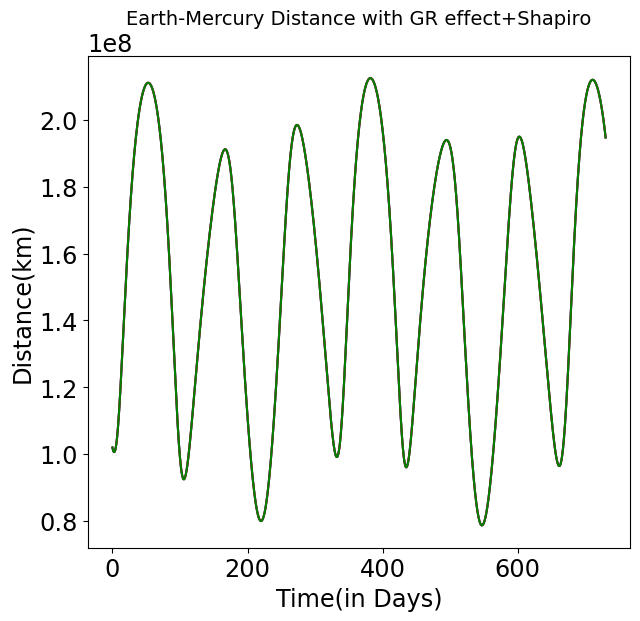

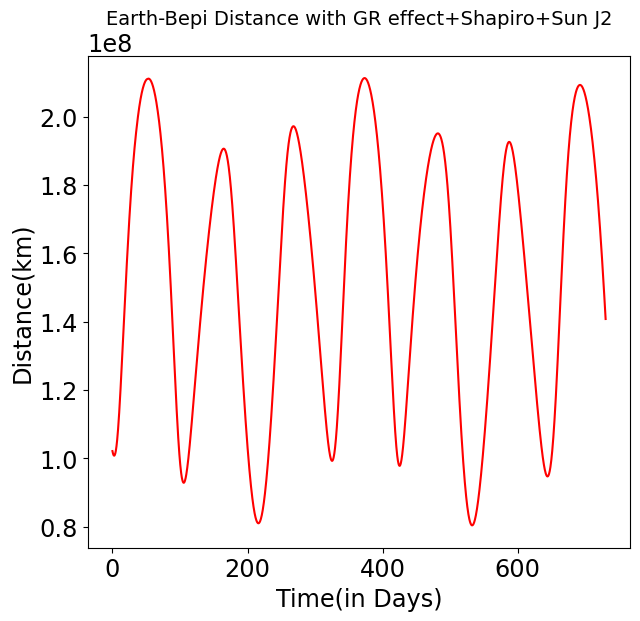

In [ ]:
plt.figure()
plt.plot(times, EM5, label="Earth-Mercury dist(GRT)", color='blue')
plt.plot(times, EM5_shap, label="Earth-Mercury dist(shapiro+GRT)", color='red')
plt.plot(times, EM5_j, label="Earth-Mercury dist(shapiro-jupiter+GRT)", color='green')
plt.xlabel("Time(in Days)")
plt.ylabel("Distance(km)")
plt.title("Earth-Mercury Distance with GR effect+Shapiro", fontsize='14')
plt.show()
###########################################################################################
plt.plot(times, BCE5, label="Earth-Bepi distance", color='red')
plt.xlabel("Time(in Days)")
plt.ylabel("Distance(km)")
plt.title("Earth-Bepi Distance with GR effect+Shapiro+Sun J2", fontsize='14')
plt.show()

##################################################################################################
############SUN J2 to PPN= GAMMA=BETA=variable#########################

In [ ]:
def PPN_J2(reb_sim, particles, force, dt):#refers to GR
    Nobj = Nobj2
    c = 3e5*86400 #km/day
    c2 = c**2
    cm2 = 1/c2
    G = 6.67430e-20*(86400**2) #km^3 kg^-1 days^-2
    gam=1.+1e-3
    bet=1.-2e-3
    r_vect = np.zeros((Nobj,Nobj,3))
    r2 = np.zeros((Nobj,Nobj))
    r = np.zeros((Nobj,Nobj))
    newt = np.zeros((Nobj,Nobj,3))
    mu = np.zeros(Nobj)
    v2 = np.zeros(Nobj)
    v_dot_v = np.zeros((Nobj,Nobj))
    r_dot_a = np.zeros((Nobj,Nobj))
    r_dot_vt = np.zeros((Nobj,Nobj))
    r_dot_va = np.zeros((Nobj,Nobj))
    for i in range(0,Nobj):
        mu[i] = G*ps[i].m
        v2[i] = ps[i].vx**2 + ps[i].vy**2 + ps[i].vz**2
    for i in range(0,Nobj):
        for j in range(0,Nobj):
            if (j!=i):
                r_vect[i,j,0] = ps[j].x-ps[i].x
                r_vect[i,j,1] = ps[j].y-ps[i].y
                r_vect[i,j,2] = ps[j].z-ps[i].z
                r_vect[j,i,0] = -r_vect[i,j,0]
                r_vect[j,i,1] = -r_vect[i,j,1]
                r_vect[j,i,2] = -r_vect[i,j,2]
                r2[i,j] = r_vect[i,j,0]**2 + r_vect[i,j,1]**2 + r_vect[i,j,2]**2
                r2[j,i] = r2[i,j]
                r[i,j] = np.sqrt(r2[i,j])
                r[j,i] = r[i,j]
                newt[i,j,0] = mu[i]*r_vect[i,j,0]/(r2[i,j]*r[i,j])
                newt[i,j,1] = mu[i]*r_vect[i,j,1]/(r2[i,j]*r[i,j])
                newt[i,j,2] = mu[i]*r_vect[i,j,2]/(r2[i,j]*r[i,j])
                v_dot_v[i,j] = ps[i].vx*ps[j].vx + ps[i].vy*ps[j].vy + ps[i].vz*ps[j].vz
                r_dot_a[i,j] = r_vect[i,j,0]*ps[i].ax + r_vect[i,j,1]*ps[i].ay + r_vect[i,j,2]*ps[i].az
                r_dot_vt[i,j] = r_vect[i,j,0]*ps[j].vx + r_vect[i,j,1]*ps[j].vy + r_vect[i,j,2]*ps[j].vz
                r_dot_va[i,j] = r_vect[i,j,0]*ps[i].vx + r_vect[i,j,1]*ps[i].vy + r_vect[i,j,2]*ps[i].vz
    for i in range(0,Nobj):
        for j in range(0,Nobj):
            if (j!=i):
                ps[j].ax += cm2* (-newt[i,j,0] * (gam*v2[j] + (1+gam)*v2[i] - 2*(1+gam)*v_dot_v[i,j]
                                                  - 1.5*(r_dot_va[i,j]/r[i,j])**2 - 0.5*r_dot_a[i,j])
                                  + mu[i]/(r2[i,j]*r[i,j]) * (2*(1+gam)*r_dot_vt[i,j]
                                                             - (1+2*gam)*r_dot_va[i,j])*(ps[j].vx-ps[i].vx)
                                  + 0.5*(3+4*gam)*mu[i]*ps[i].ax/r[i,j])
                ps[j].ay += cm2* (-newt[i,j,1] * (gam*v2[j] + (1+gam)*v2[i] - 2*(1+gam)*v_dot_v[i,j]
                                                  - 1.5*(r_dot_va[i,j]/r[i,j])**2 - 0.5*r_dot_a[i,j])
                                  + mu[i]/(r2[i,j]*r[i,j]) * (2*(1+gam)*r_dot_vt[i,j]
                                                             - (1+2*gam)*r_dot_va[i,j])*(ps[j].vy-ps[i].vy)
                                  + 0.5*(3+4*gam)*mu[i]*ps[i].ay/r[i,j])
                ps[j].az += cm2* (-newt[i,j,2] * (gam*v2[j] + (1+gam)*v2[i] - 2*(1+gam)*v_dot_v[i,j]
                                                  - 1.5*(r_dot_va[i,j]/r[i,j])**2 - 0.5*r_dot_a[i,j])
                                  + mu[i]/(r2[i,j]*r[i,j]) * (2*(1+gam)*r_dot_vt[i,j]
                                                             - (1+2*gam)*r_dot_va[i,j])*(ps[j].vz-ps[i].vz)
                                  + 0.5*(3+4*gam)*mu[i]*ps[i].az/r[i,j])
                for b in range(0,Nobj):
                    if (b!=j):
                        ps[j].ax += cm2* (newt[i,j,0]*2*(gam+bet)*mu[b]/r[j,b])
                        ps[j].ay += cm2* (newt[i,j,1]*2*(gam+bet)*mu[b]/r[j,b])
                        ps[j].az += cm2* (newt[i,j,2]*2*(gam+bet)*mu[b]/r[j,b])
                    if (b!=i):
                        ps[j].ax += cm2* (newt[i,j,0]*(2*bet-1)*mu[b]/r[i,b])
                        ps[j].ay += cm2* (newt[i,j,1]*(2*bet-1)*mu[b]/r[i,b])
                        ps[j].az += cm2* (newt[i,j,2]*(2*bet-1)*mu[b]/r[i,b])


In [ ]:
sim6 = setupsim2()
sim6.integrator = "whfast"
sim6.move_to_com()
ps6 = sim6.particles
ps = sim6.particles

In [ ]:
import reboundx
rebx3 = reboundx.Extras(sim6)

ppn_var_force = rebx3.create_force("ppn_var_force")
ppn_var_force.force_type = "vel"  # Since it's velocity dependent
ppn_var_force.update_accelerations = PPN_J2
rebx3.add_force(ppn_var_force)

# Set velocity dependence flag
sim6.force_is_velocity_dependent = 1

gh2 = rebx3.load_force("gravitational_harmonics")
rebx3.add_force(gh2)
ps6["sun"].params["J2"] = 2.2e-7
ps6["sun"].params["R_eq"] = 695700

In [ ]:
gam=1.+1e-3
bet=1.-2e-3
Nobj = Nobj2
x6 = np.zeros((Nobj,Nout))
y6 = np.zeros((Nobj,Nout))
z6 = np.zeros((Nobj,Nout))
a6 = np.zeros((Nobj,Nout))
e6 = np.zeros((Nobj,Nout))
Omega6 = np.zeros((Nobj,Nout))
omega6 = np.zeros((Nobj,Nout))
pomega6 = np.zeros((Nobj,Nout))
inc6 = np.zeros((Nobj,Nout))
print("loop starting")
for i,time in tqdm(enumerate(times)):
	sim6.integrate(time)
	print("loop", i)
	for j in range(Nobj):
		x6[j][i] = ps6[j].x
		y6[j][i] = ps6[j].y
		z6[j][i] = ps6[j].z
		if j>0:
			a6[j][i] = ps6[j].a
			e6[j][i] = ps6[j].e
			pomega6[j][i] = ps6[j].pomega
			Omega6[j][i] = ps6[j].Omega
			omega6[j][i] = ps6[j].omega
			inc6[j][i] = ps6[j].inc
print("loop done")

loop starting


0it [00:00, ?it/s]

loop 0


2it [00:01,  1.91it/s]

loop 1


3it [00:02,  1.35it/s]

loop 2


4it [00:03,  1.17it/s]

loop 3


5it [00:04,  1.09it/s]

loop 4


6it [00:05,  1.04it/s]

loop 5


7it [00:06,  1.02it/s]

loop 6


8it [00:07,  1.00s/it]

loop 7


9it [00:08,  1.02s/it]

loop 8


10it [00:09,  1.09s/it]

loop 9


11it [00:11,  1.34s/it]

loop 10


12it [00:12,  1.36s/it]

loop 11


13it [00:13,  1.27s/it]

loop 12


14it [00:15,  1.20s/it]

loop 13


15it [00:16,  1.16s/it]

loop 14


16it [00:17,  1.12s/it]

loop 15


17it [00:18,  1.10s/it]

loop 16


18it [00:19,  1.08s/it]

loop 17


19it [00:20,  1.08s/it]

loop 18


20it [00:21,  1.07s/it]

loop 19


21it [00:22,  1.08s/it]

loop 20


22it [00:24,  1.33s/it]

loop 21


23it [00:25,  1.40s/it]

loop 22


24it [00:26,  1.30s/it]

loop 23


25it [00:28,  1.23s/it]

loop 24


26it [00:29,  1.17s/it]

loop 25


27it [00:30,  1.13s/it]

loop 26


28it [00:31,  1.11s/it]

loop 27


29it [00:32,  1.09s/it]

loop 28


30it [00:33,  1.08s/it]

loop 29


31it [00:34,  1.06s/it]

loop 30


32it [00:35,  1.06s/it]

loop 31


33it [00:37,  1.27s/it]

loop 32


34it [00:38,  1.42s/it]

loop 33


35it [00:39,  1.31s/it]

loop 34


36it [00:40,  1.23s/it]

loop 35


37it [00:42,  1.17s/it]

loop 36


38it [00:43,  1.14s/it]

loop 37


39it [00:44,  1.12s/it]

loop 38


40it [00:45,  1.10s/it]

loop 39


41it [00:46,  1.09s/it]

loop 40


42it [00:47,  1.08s/it]

loop 41


43it [00:48,  1.07s/it]

loop 42


44it [00:49,  1.24s/it]

loop 43


45it [00:51,  1.42s/it]

loop 44


46it [00:52,  1.31s/it]

loop 45


47it [00:53,  1.23s/it]

loop 46


48it [00:54,  1.18s/it]

loop 47


49it [00:56,  1.14s/it]

loop 48


50it [00:57,  1.12s/it]

loop 49


51it [00:58,  1.10s/it]

loop 50


52it [00:59,  1.08s/it]

loop 51


53it [01:00,  1.07s/it]

loop 52


54it [01:01,  1.07s/it]

loop 53


55it [01:02,  1.21s/it]

loop 54


56it [01:04,  1.42s/it]

loop 55


57it [01:05,  1.32s/it]

loop 56


58it [01:06,  1.24s/it]

loop 57


59it [01:07,  1.18s/it]

loop 58


60it [01:09,  1.15s/it]

loop 59


61it [01:10,  1.12s/it]

loop 60


62it [01:11,  1.10s/it]

loop 61


63it [01:12,  1.09s/it]

loop 62


64it [01:13,  1.07s/it]

loop 63


65it [01:14,  1.07s/it]

loop 64


66it [01:15,  1.16s/it]

loop 65


67it [01:17,  1.38s/it]

loop 66


68it [01:18,  1.34s/it]

loop 67


69it [01:19,  1.25s/it]

loop 68


70it [01:20,  1.19s/it]

loop 69


71it [01:21,  1.14s/it]

loop 70


72it [01:22,  1.12s/it]

loop 71


73it [01:24,  1.09s/it]

loop 72


74it [01:25,  1.08s/it]

loop 73


75it [01:26,  1.07s/it]

loop 74


76it [01:27,  1.06s/it]

loop 75


77it [01:28,  1.13s/it]

loop 76


78it [01:30,  1.36s/it]

loop 77


79it [01:31,  1.37s/it]

loop 78


80it [01:32,  1.27s/it]

loop 79


81it [01:33,  1.21s/it]

loop 80


82it [01:34,  1.16s/it]

loop 81


83it [01:35,  1.13s/it]

loop 82


84it [01:36,  1.11s/it]

loop 83


85it [01:38,  1.09s/it]

loop 84


86it [01:39,  1.08s/it]

loop 85


87it [01:40,  1.07s/it]

loop 86


88it [01:41,  1.09s/it]

loop 87


89it [01:43,  1.34s/it]

loop 88


90it [01:44,  1.41s/it]

loop 89


91it [01:45,  1.30s/it]

loop 90


92it [01:46,  1.22s/it]

loop 91


93it [01:47,  1.17s/it]

loop 92


94it [01:48,  1.14s/it]

loop 93


95it [01:50,  1.12s/it]

loop 94


96it [01:51,  1.10s/it]

loop 95


97it [01:52,  1.09s/it]

loop 96


98it [01:53,  1.08s/it]

loop 97


99it [01:54,  1.09s/it]

loop 98


100it [01:56,  1.36s/it]

loop 99


101it [01:57,  1.41s/it]

loop 100


102it [01:58,  1.30s/it]

loop 101


103it [01:59,  1.23s/it]

loop 102


104it [02:01,  1.18s/it]

loop 103


105it [02:02,  1.14s/it]

loop 104


106it [02:03,  1.12s/it]

loop 105


107it [02:04,  1.10s/it]

loop 106


108it [02:05,  1.09s/it]

loop 107


109it [02:06,  1.08s/it]

loop 108


110it [02:07,  1.08s/it]

loop 109


111it [02:09,  1.34s/it]

loop 110


112it [02:10,  1.41s/it]

loop 111


113it [02:11,  1.31s/it]

loop 112


114it [02:13,  1.24s/it]

loop 113


115it [02:14,  1.18s/it]

loop 114


116it [02:15,  1.15s/it]

loop 115


117it [02:16,  1.13s/it]

loop 116


118it [02:17,  1.11s/it]

loop 117


119it [02:18,  1.09s/it]

loop 118


120it [02:19,  1.08s/it]

loop 119


121it [02:20,  1.08s/it]

loop 120


122it [02:22,  1.32s/it]

loop 121


123it [02:24,  1.41s/it]

loop 122


124it [02:25,  1.30s/it]

loop 123


125it [02:26,  1.22s/it]

loop 124


126it [02:27,  1.18s/it]

loop 125


127it [02:28,  1.15s/it]

loop 126


128it [02:29,  1.12s/it]

loop 127


129it [02:30,  1.10s/it]

loop 128


130it [02:31,  1.08s/it]

loop 129


131it [02:32,  1.07s/it]

loop 130


132it [02:33,  1.06s/it]

loop 131


133it [02:35,  1.31s/it]

loop 132


134it [02:37,  1.42s/it]

loop 133


135it [02:38,  1.30s/it]

loop 134


136it [02:39,  1.24s/it]

loop 135


137it [02:40,  1.19s/it]

loop 136


138it [02:41,  1.16s/it]

loop 137


139it [02:42,  1.12s/it]

loop 138


140it [02:43,  1.12s/it]

loop 139


141it [02:44,  1.10s/it]

loop 140


142it [02:45,  1.09s/it]

loop 141


143it [02:46,  1.08s/it]

loop 142


144it [02:48,  1.32s/it]

loop 143


145it [02:50,  1.42s/it]

loop 144


146it [02:51,  1.31s/it]

loop 145


147it [02:52,  1.23s/it]

loop 146


148it [02:53,  1.18s/it]

loop 147


149it [02:54,  1.14s/it]

loop 148


150it [02:55,  1.12s/it]

loop 149


151it [02:56,  1.10s/it]

loop 150


152it [02:57,  1.09s/it]

loop 151


153it [02:58,  1.09s/it]

loop 152


154it [02:59,  1.08s/it]

loop 153


155it [03:01,  1.34s/it]

loop 154


156it [03:03,  1.44s/it]

loop 155


157it [03:04,  1.33s/it]

loop 156


158it [03:05,  1.24s/it]

loop 157


159it [03:06,  1.19s/it]

loop 158


160it [03:07,  1.15s/it]

loop 159


161it [03:08,  1.13s/it]

loop 160


162it [03:09,  1.11s/it]

loop 161


163it [03:10,  1.08s/it]

loop 162


164it [03:11,  1.07s/it]

loop 163


165it [03:12,  1.06s/it]

loop 164


166it [03:14,  1.31s/it]

loop 165


167it [03:16,  1.42s/it]

loop 166


168it [03:17,  1.31s/it]

loop 167


169it [03:18,  1.23s/it]

loop 168


170it [03:19,  1.19s/it]

loop 169


171it [03:20,  1.15s/it]

loop 170


172it [03:21,  1.12s/it]

loop 171


173it [03:22,  1.09s/it]

loop 172


174it [03:23,  1.08s/it]

loop 173


175it [03:24,  1.07s/it]

loop 174


176it [03:25,  1.06s/it]

loop 175


177it [03:27,  1.28s/it]

loop 176


178it [03:29,  1.44s/it]

loop 177


179it [03:30,  1.33s/it]

loop 178


180it [03:31,  1.24s/it]

loop 179


181it [03:32,  1.18s/it]

loop 180


182it [03:33,  1.14s/it]

loop 181


183it [03:34,  1.11s/it]

loop 182


184it [03:35,  1.09s/it]

loop 183


185it [03:36,  1.08s/it]

loop 184


186it [03:37,  1.07s/it]

loop 185


187it [03:38,  1.08s/it]

loop 186


188it [03:40,  1.27s/it]

loop 187


189it [03:42,  1.46s/it]

loop 188


190it [03:43,  1.33s/it]

loop 189


191it [03:44,  1.25s/it]

loop 190


192it [03:45,  1.19s/it]

loop 191


193it [03:46,  1.15s/it]

loop 192


194it [03:47,  1.11s/it]

loop 193


195it [03:48,  1.09s/it]

loop 194


196it [03:49,  1.08s/it]

loop 195


197it [03:50,  1.09s/it]

loop 196


198it [03:52,  1.08s/it]

loop 197


199it [03:53,  1.23s/it]

loop 198


200it [03:55,  1.42s/it]

loop 199


201it [03:56,  1.32s/it]

loop 200


202it [03:57,  1.24s/it]

loop 201


203it [03:58,  1.19s/it]

loop 202


204it [03:59,  1.14s/it]

loop 203


205it [04:00,  1.12s/it]

loop 204


206it [04:01,  1.10s/it]

loop 205


207it [04:02,  1.10s/it]

loop 206


208it [04:04,  1.08s/it]

loop 207


209it [04:05,  1.07s/it]

loop 208


210it [04:06,  1.19s/it]

loop 209


211it [04:08,  1.43s/it]

loop 210


212it [04:09,  1.36s/it]

loop 211


213it [04:10,  1.27s/it]

loop 212


214it [04:11,  1.21s/it]

loop 213


215it [04:12,  1.16s/it]

loop 214


216it [04:13,  1.13s/it]

loop 215


217it [04:15,  1.12s/it]

loop 216


218it [04:16,  1.09s/it]

loop 217


219it [04:17,  1.08s/it]

loop 218


220it [04:18,  1.08s/it]

loop 219


221it [04:19,  1.18s/it]

loop 220


222it [04:21,  1.42s/it]

loop 221


223it [04:22,  1.35s/it]

loop 222


224it [04:23,  1.27s/it]

loop 223


225it [04:24,  1.22s/it]

loop 224


226it [04:25,  1.17s/it]

loop 225


227it [04:27,  1.13s/it]

loop 226


228it [04:28,  1.11s/it]

loop 227


229it [04:29,  1.10s/it]

loop 228


230it [04:30,  1.09s/it]

loop 229


231it [04:31,  1.08s/it]

loop 230


232it [04:32,  1.19s/it]

loop 231


233it [04:34,  1.41s/it]

loop 232


234it [04:35,  1.36s/it]

loop 233


235it [04:36,  1.26s/it]

loop 234


236it [04:37,  1.20s/it]

loop 235


237it [04:39,  1.16s/it]

loop 236


238it [04:40,  1.13s/it]

loop 237


239it [04:41,  1.11s/it]

loop 238


240it [04:42,  1.09s/it]

loop 239


241it [04:43,  1.08s/it]

loop 240


242it [04:44,  1.07s/it]

loop 241


243it [04:45,  1.14s/it]

loop 242


244it [04:47,  1.38s/it]

loop 243


245it [04:48,  1.38s/it]

loop 244


246it [04:50,  1.28s/it]

loop 245


247it [04:51,  1.21s/it]

loop 246


248it [04:52,  1.17s/it]

loop 247


249it [04:53,  1.13s/it]

loop 248


250it [04:54,  1.11s/it]

loop 249


251it [04:55,  1.09s/it]

loop 250


252it [04:56,  1.07s/it]

loop 251


253it [04:57,  1.06s/it]

loop 252


254it [04:58,  1.07s/it]

loop 253


255it [05:00,  1.33s/it]

loop 254


256it [05:01,  1.38s/it]

loop 255


257it [05:02,  1.28s/it]

loop 256


258it [05:04,  1.22s/it]

loop 257


259it [05:05,  1.18s/it]

loop 258


260it [05:06,  1.14s/it]

loop 259


261it [05:07,  1.11s/it]

loop 260


262it [05:08,  1.10s/it]

loop 261


263it [05:09,  1.09s/it]

loop 262


264it [05:10,  1.08s/it]

loop 263


265it [05:11,  1.08s/it]

loop 264


266it [05:13,  1.35s/it]

loop 265


267it [05:14,  1.40s/it]

loop 266


268it [05:16,  1.30s/it]

loop 267


269it [05:17,  1.22s/it]

loop 268


270it [05:18,  1.17s/it]

loop 269


271it [05:19,  1.14s/it]

loop 270


272it [05:20,  1.11s/it]

loop 271


273it [05:21,  1.09s/it]

loop 272


274it [05:22,  1.08s/it]

loop 273


275it [05:23,  1.07s/it]

loop 274


276it [05:24,  1.07s/it]

loop 275


277it [05:26,  1.32s/it]

loop 276


278it [05:27,  1.41s/it]

loop 277


279it [05:29,  1.31s/it]

loop 278


280it [05:30,  1.24s/it]

loop 279


281it [05:31,  1.19s/it]

loop 280


282it [05:32,  1.14s/it]

loop 281


283it [05:33,  1.11s/it]

loop 282


284it [05:34,  1.09s/it]

loop 283


285it [05:35,  1.07s/it]

loop 284


286it [05:36,  1.07s/it]

loop 285


287it [05:37,  1.07s/it]

loop 286


288it [05:39,  1.29s/it]

loop 287


289it [05:40,  1.43s/it]

loop 288


290it [05:42,  1.31s/it]

loop 289


291it [05:43,  1.25s/it]

loop 290


292it [05:44,  1.20s/it]

loop 291


293it [05:45,  1.15s/it]

loop 292


294it [05:46,  1.12s/it]

loop 293


295it [05:47,  1.10s/it]

loop 294


296it [05:48,  1.09s/it]

loop 295


297it [05:49,  1.09s/it]

loop 296


298it [05:50,  1.08s/it]

loop 297


299it [05:52,  1.32s/it]

loop 298


300it [05:54,  1.42s/it]

loop 299


301it [05:55,  1.32s/it]

loop 300


302it [05:56,  1.24s/it]

loop 301


303it [05:57,  1.18s/it]

loop 302


304it [05:58,  1.13s/it]

loop 303


305it [05:59,  1.12s/it]

loop 304


306it [06:00,  1.10s/it]

loop 305


307it [06:01,  1.08s/it]

loop 306


308it [06:02,  1.07s/it]

loop 307


309it [06:03,  1.06s/it]

loop 308


310it [06:05,  1.25s/it]

loop 309


311it [06:07,  1.42s/it]

loop 310


312it [06:08,  1.30s/it]

loop 311


313it [06:09,  1.23s/it]

loop 312


314it [06:10,  1.18s/it]

loop 313


315it [06:11,  1.15s/it]

loop 314


316it [06:12,  1.12s/it]

loop 315


317it [06:13,  1.11s/it]

loop 316


318it [06:14,  1.09s/it]

loop 317


319it [06:15,  1.08s/it]

loop 318


320it [06:16,  1.07s/it]

loop 319


321it [06:18,  1.25s/it]

loop 320


322it [06:20,  1.45s/it]

loop 321


323it [06:21,  1.32s/it]

loop 322


324it [06:22,  1.24s/it]

loop 323


325it [06:23,  1.19s/it]

loop 324


326it [06:24,  1.16s/it]

loop 325


327it [06:25,  1.14s/it]

loop 326


328it [06:26,  1.12s/it]

loop 327


329it [06:27,  1.10s/it]

loop 328


330it [06:28,  1.08s/it]

loop 329


331it [06:29,  1.07s/it]

loop 330


332it [06:31,  1.21s/it]

loop 331


333it [06:33,  1.45s/it]

loop 332


334it [06:34,  1.33s/it]

loop 333


335it [06:35,  1.24s/it]

loop 334


336it [06:36,  1.19s/it]

loop 335


337it [06:37,  1.14s/it]

loop 336


338it [06:38,  1.11s/it]

loop 337


339it [06:39,  1.09s/it]

loop 338


340it [06:40,  1.08s/it]

loop 339


341it [06:41,  1.07s/it]

loop 340


342it [06:42,  1.06s/it]

loop 341


343it [06:44,  1.20s/it]

loop 342


344it [06:46,  1.42s/it]

loop 343


345it [06:47,  1.33s/it]

loop 344


346it [06:48,  1.25s/it]

loop 345


347it [06:49,  1.20s/it]

loop 346


348it [06:50,  1.15s/it]

loop 347


349it [06:51,  1.13s/it]

loop 348


350it [06:52,  1.11s/it]

loop 349


351it [06:53,  1.09s/it]

loop 350


352it [06:54,  1.07s/it]

loop 351


353it [06:55,  1.06s/it]

loop 352


354it [06:56,  1.15s/it]

loop 353


355it [06:59,  1.42s/it]

loop 354


356it [07:00,  1.37s/it]

loop 355


357it [07:01,  1.27s/it]

loop 356


358it [07:02,  1.21s/it]

loop 357


359it [07:03,  1.15s/it]

loop 358


360it [07:04,  1.12s/it]

loop 359


361it [07:05,  1.10s/it]

loop 360


362it [07:06,  1.08s/it]

loop 361


363it [07:07,  1.07s/it]

loop 362


364it [07:08,  1.07s/it]

loop 363


365it [07:10,  1.15s/it]

loop 364


366it [07:12,  1.43s/it]

loop 365


367it [07:13,  1.38s/it]

loop 366


368it [07:14,  1.29s/it]

loop 367


369it [07:15,  1.23s/it]

loop 368


370it [07:16,  1.18s/it]

loop 369


371it [07:17,  1.14s/it]

loop 370


372it [07:18,  1.11s/it]

loop 371


373it [07:19,  1.10s/it]

loop 372


374it [07:20,  1.09s/it]

loop 373


375it [07:21,  1.08s/it]

loop 374


376it [07:23,  1.18s/it]

loop 375


377it [07:25,  1.40s/it]

loop 376


378it [07:26,  1.38s/it]

loop 377


379it [07:27,  1.28s/it]

loop 378


380it [07:28,  1.22s/it]

loop 379


381it [07:29,  1.18s/it]

loop 380


382it [07:30,  1.14s/it]

loop 381


383it [07:31,  1.11s/it]

loop 382


384it [07:32,  1.11s/it]

loop 383


385it [07:34,  1.10s/it]

loop 384


386it [07:35,  1.09s/it]

loop 385


387it [07:36,  1.17s/it]

loop 386


388it [07:38,  1.39s/it]

loop 387


389it [07:39,  1.36s/it]

loop 388


390it [07:40,  1.27s/it]

loop 389


391it [07:41,  1.20s/it]

loop 390


392it [07:42,  1.16s/it]

loop 391


393it [07:43,  1.12s/it]

loop 392


394it [07:44,  1.10s/it]

loop 393


395it [07:45,  1.08s/it]

loop 394


396it [07:46,  1.07s/it]

loop 395


397it [07:48,  1.07s/it]

loop 396


398it [07:49,  1.11s/it]

loop 397


399it [07:51,  1.37s/it]

loop 398


400it [07:52,  1.38s/it]

loop 399


401it [07:53,  1.28s/it]

loop 400


402it [07:54,  1.21s/it]

loop 401


403it [07:55,  1.17s/it]

loop 402


404it [07:56,  1.14s/it]

loop 403


405it [07:57,  1.11s/it]

loop 404


406it [07:58,  1.09s/it]

loop 405


407it [07:59,  1.07s/it]

loop 406


408it [08:01,  1.07s/it]

loop 407


409it [08:02,  1.09s/it]

loop 408


410it [08:04,  1.34s/it]

loop 409


411it [08:05,  1.38s/it]

loop 410


412it [08:06,  1.28s/it]

loop 411


413it [08:07,  1.21s/it]

loop 412


414it [08:08,  1.17s/it]

loop 413


415it [08:09,  1.14s/it]

loop 414


416it [08:10,  1.11s/it]

loop 415


417it [08:11,  1.10s/it]

loop 416


418it [08:12,  1.09s/it]

loop 417


419it [08:14,  1.09s/it]

loop 418


420it [08:15,  1.09s/it]

loop 419


421it [08:17,  1.34s/it]

loop 420


422it [08:18,  1.41s/it]

loop 421


423it [08:19,  1.30s/it]

loop 422


424it [08:20,  1.23s/it]

loop 423


425it [08:21,  1.17s/it]

loop 424


426it [08:22,  1.14s/it]

loop 425


427it [08:23,  1.11s/it]

loop 426


428it [08:24,  1.09s/it]

loop 427


429it [08:26,  1.09s/it]

loop 428


430it [08:27,  1.07s/it]

loop 429


431it [08:28,  1.07s/it]

loop 430


432it [08:29,  1.29s/it]

loop 431


433it [08:31,  1.42s/it]

loop 432


434it [08:32,  1.31s/it]

loop 433


435it [08:33,  1.23s/it]

loop 434


436it [08:34,  1.19s/it]

loop 435


437it [08:35,  1.14s/it]

loop 436


438it [08:36,  1.13s/it]

loop 437


439it [08:38,  1.11s/it]

loop 438


440it [08:39,  1.10s/it]

loop 439


441it [08:40,  1.08s/it]

loop 440


442it [08:41,  1.07s/it]

loop 441


443it [08:42,  1.28s/it]

loop 442


444it [08:44,  1.43s/it]

loop 443


445it [08:45,  1.32s/it]

loop 444


446it [08:46,  1.24s/it]

loop 445


447it [08:47,  1.18s/it]

loop 446


448it [08:48,  1.14s/it]

loop 447


449it [08:50,  1.12s/it]

loop 448


450it [08:51,  1.10s/it]

loop 449


451it [08:52,  1.09s/it]

loop 450


452it [08:53,  1.09s/it]

loop 451


453it [08:54,  1.08s/it]

loop 452


454it [08:56,  1.28s/it]

loop 453


455it [08:57,  1.42s/it]

loop 454


456it [08:58,  1.32s/it]

loop 455


457it [08:59,  1.24s/it]

loop 456


458it [09:01,  1.18s/it]

loop 457


459it [09:02,  1.14s/it]

loop 458


460it [09:03,  1.12s/it]

loop 459


461it [09:04,  1.10s/it]

loop 460


462it [09:05,  1.09s/it]

loop 461


463it [09:06,  1.08s/it]

loop 462


464it [09:07,  1.07s/it]

loop 463


465it [09:09,  1.27s/it]

loop 464


466it [09:10,  1.43s/it]

loop 465


467it [09:11,  1.32s/it]

loop 466


468it [09:13,  1.25s/it]

loop 467


469it [09:14,  1.19s/it]

loop 468


470it [09:15,  1.15s/it]

loop 469


471it [09:16,  1.12s/it]

loop 470


472it [09:17,  1.10s/it]

loop 471


473it [09:18,  1.10s/it]

loop 472


474it [09:19,  1.09s/it]

loop 473


475it [09:20,  1.07s/it]

loop 474


476it [09:22,  1.28s/it]

loop 475


477it [09:24,  1.43s/it]

loop 476


478it [09:25,  1.32s/it]

loop 477


479it [09:26,  1.24s/it]

loop 478


480it [09:27,  1.19s/it]

loop 479


481it [09:28,  1.15s/it]

loop 480


482it [09:29,  1.12s/it]

loop 481


483it [09:30,  1.10s/it]

loop 482


484it [09:31,  1.11s/it]

loop 483


485it [09:32,  1.09s/it]

loop 484


486it [09:33,  1.09s/it]

loop 485


487it [09:35,  1.31s/it]

loop 486


488it [09:37,  1.44s/it]

loop 487


489it [09:38,  1.32s/it]

loop 488


490it [09:39,  1.25s/it]

loop 489


491it [09:40,  1.19s/it]

loop 490


492it [09:41,  1.15s/it]

loop 491


493it [09:42,  1.12s/it]

loop 492


494it [09:43,  1.10s/it]

loop 493


495it [09:44,  1.09s/it]

loop 494


496it [09:45,  1.08s/it]

loop 495


497it [09:46,  1.08s/it]

loop 496


498it [09:48,  1.35s/it]

loop 497


499it [09:50,  1.44s/it]

loop 498


500it [09:51,  1.33s/it]

loop 499


501it [09:52,  1.24s/it]

loop 500


502it [09:53,  1.19s/it]

loop 501


503it [09:54,  1.14s/it]

loop 502


504it [09:55,  1.12s/it]

loop 503


505it [09:56,  1.10s/it]

loop 504


506it [09:57,  1.08s/it]

loop 505


507it [09:58,  1.08s/it]

loop 506


508it [09:59,  1.07s/it]

loop 507


509it [10:01,  1.31s/it]

loop 508


510it [10:03,  1.43s/it]

loop 509


511it [10:04,  1.32s/it]

loop 510


512it [10:05,  1.24s/it]

loop 511


513it [10:06,  1.18s/it]

loop 512


514it [10:07,  1.14s/it]

loop 513


515it [10:08,  1.12s/it]

loop 514


516it [10:09,  1.11s/it]

loop 515


517it [10:10,  1.10s/it]

loop 516


518it [10:11,  1.10s/it]

loop 517


519it [10:13,  1.09s/it]

loop 518


520it [10:14,  1.33s/it]

loop 519


521it [10:16,  1.43s/it]

loop 520


522it [10:17,  1.31s/it]

loop 521


523it [10:18,  1.24s/it]

loop 522


524it [10:19,  1.18s/it]

loop 523


525it [10:20,  1.15s/it]

loop 524


526it [10:21,  1.13s/it]

loop 525


527it [10:22,  1.11s/it]

loop 526


528it [10:24,  1.10s/it]

loop 527


529it [10:25,  1.08s/it]

loop 528


530it [10:26,  1.07s/it]

loop 529


531it [10:28,  1.33s/it]

loop 530


532it [10:29,  1.42s/it]

loop 531


533it [10:30,  1.31s/it]

loop 532


534it [10:31,  1.25s/it]

loop 533


535it [10:32,  1.19s/it]

loop 534


536it [10:33,  1.15s/it]

loop 535


537it [10:35,  1.12s/it]

loop 536


538it [10:36,  1.10s/it]

loop 537


539it [10:37,  1.08s/it]

loop 538


540it [10:38,  1.08s/it]

loop 539


541it [10:39,  1.08s/it]

loop 540


542it [10:41,  1.33s/it]

loop 541


543it [10:42,  1.42s/it]

loop 542


544it [10:43,  1.32s/it]

loop 543


545it [10:44,  1.24s/it]

loop 544


546it [10:45,  1.18s/it]

loop 545


547it [10:47,  1.14s/it]

loop 546


548it [10:48,  1.11s/it]

loop 547


549it [10:49,  1.10s/it]

loop 548


550it [10:50,  1.09s/it]

loop 549


551it [10:51,  1.09s/it]

loop 550


552it [10:52,  1.09s/it]

loop 551


553it [10:54,  1.33s/it]

loop 552


554it [10:55,  1.42s/it]

loop 553


555it [10:56,  1.32s/it]

loop 554


556it [10:58,  1.24s/it]

loop 555


557it [10:59,  1.18s/it]

loop 556


558it [11:00,  1.15s/it]

loop 557


559it [11:01,  1.13s/it]

loop 558


560it [11:02,  1.12s/it]

loop 559


561it [11:03,  1.10s/it]

loop 560


562it [11:04,  1.08s/it]

loop 561


563it [11:05,  1.07s/it]

loop 562


564it [11:07,  1.32s/it]

loop 563


565it [11:09,  1.43s/it]

loop 564


566it [11:10,  1.32s/it]

loop 565


567it [11:11,  1.25s/it]

loop 566


568it [11:12,  1.20s/it]

loop 567


569it [11:13,  1.15s/it]

loop 568


570it [11:14,  1.13s/it]

loop 569


571it [11:15,  1.10s/it]

loop 570


572it [11:16,  1.09s/it]

loop 571


573it [11:17,  1.08s/it]

loop 572


574it [11:18,  1.07s/it]

loop 573


575it [11:20,  1.29s/it]

loop 574


576it [11:22,  1.42s/it]

loop 575


577it [11:23,  1.31s/it]

loop 576


578it [11:24,  1.25s/it]

loop 577


579it [11:25,  1.19s/it]

loop 578


580it [11:26,  1.15s/it]

loop 579


581it [11:27,  1.12s/it]

loop 580


582it [11:28,  1.10s/it]

loop 581


583it [11:29,  1.09s/it]

loop 582


584it [11:30,  1.08s/it]

loop 583


585it [11:31,  1.09s/it]

loop 584


586it [11:33,  1.30s/it]

loop 585


587it [11:35,  1.44s/it]

loop 586


588it [11:36,  1.32s/it]

loop 587


589it [11:37,  1.24s/it]

loop 588


590it [11:38,  1.19s/it]

loop 589


591it [11:39,  1.15s/it]

loop 590


592it [11:40,  1.13s/it]

loop 591


593it [11:41,  1.11s/it]

loop 592


594it [11:42,  1.10s/it]

loop 593


595it [11:43,  1.09s/it]

loop 594


596it [11:44,  1.08s/it]

loop 595


597it [11:46,  1.31s/it]

loop 596


598it [11:48,  1.43s/it]

loop 597


599it [11:49,  1.32s/it]

loop 598


600it [11:50,  1.24s/it]

loop 599


601it [11:51,  1.18s/it]

loop 600


602it [11:52,  1.15s/it]

loop 601


603it [11:53,  1.12s/it]

loop 602


604it [11:54,  1.10s/it]

loop 603


605it [11:55,  1.09s/it]

loop 604


606it [11:56,  1.08s/it]

loop 605


607it [11:57,  1.07s/it]

loop 606


608it [11:59,  1.28s/it]

loop 607


609it [12:01,  1.44s/it]

loop 608


610it [12:02,  1.32s/it]

loop 609


611it [12:03,  1.26s/it]

loop 610


612it [12:04,  1.19s/it]

loop 611


613it [12:05,  1.15s/it]

loop 612


614it [12:06,  1.13s/it]

loop 613


615it [12:07,  1.11s/it]

loop 614


616it [12:08,  1.10s/it]

loop 615


617it [12:10,  1.09s/it]

loop 616


618it [12:11,  1.08s/it]

loop 617


619it [12:12,  1.32s/it]

loop 618


620it [12:14,  1.44s/it]

loop 619


621it [12:15,  1.33s/it]

loop 620


622it [12:16,  1.25s/it]

loop 621


623it [12:17,  1.19s/it]

loop 622


624it [12:18,  1.15s/it]

loop 623


625it [12:20,  1.12s/it]

loop 624


626it [12:21,  1.10s/it]

loop 625


627it [12:22,  1.09s/it]

loop 626


628it [12:23,  1.08s/it]

loop 627


629it [12:24,  1.08s/it]

loop 628


630it [12:26,  1.28s/it]

loop 629


631it [12:27,  1.46s/it]

loop 630


632it [12:28,  1.33s/it]

loop 631


633it [12:29,  1.25s/it]

loop 632


634it [12:31,  1.19s/it]

loop 633


635it [12:32,  1.16s/it]

loop 634


636it [12:33,  1.13s/it]

loop 635


637it [12:34,  1.10s/it]

loop 636


638it [12:35,  1.09s/it]

loop 637


639it [12:36,  1.08s/it]

loop 638


640it [12:37,  1.07s/it]

loop 639


641it [12:39,  1.26s/it]

loop 640


642it [12:40,  1.45s/it]

loop 641


643it [12:42,  1.34s/it]

loop 642


644it [12:43,  1.26s/it]

loop 643


645it [12:44,  1.20s/it]

loop 644


646it [12:45,  1.15s/it]

loop 645


647it [12:46,  1.12s/it]

loop 646


648it [12:47,  1.10s/it]

loop 647


649it [12:48,  1.10s/it]

loop 648


650it [12:49,  1.09s/it]

loop 649


651it [12:50,  1.08s/it]

loop 650


652it [12:52,  1.26s/it]

loop 651


653it [12:54,  1.43s/it]

loop 652


654it [12:55,  1.32s/it]

loop 653


655it [12:56,  1.24s/it]

loop 654


656it [12:57,  1.18s/it]

loop 655


657it [12:58,  1.15s/it]

loop 656


658it [12:59,  1.12s/it]

loop 657


659it [13:00,  1.10s/it]

loop 658


660it [13:01,  1.08s/it]

loop 659


661it [13:02,  1.08s/it]

loop 660


662it [13:03,  1.07s/it]

loop 661


663it [13:05,  1.22s/it]

loop 662


664it [13:07,  1.43s/it]

loop 663


665it [13:08,  1.32s/it]

loop 664


666it [13:09,  1.25s/it]

loop 665


667it [13:10,  1.19s/it]

loop 666


668it [13:11,  1.15s/it]

loop 667


669it [13:12,  1.12s/it]

loop 668


670it [13:13,  1.10s/it]

loop 669


671it [13:14,  1.09s/it]

loop 670


672it [13:15,  1.08s/it]

loop 671


673it [13:16,  1.07s/it]

loop 672


674it [13:18,  1.20s/it]

loop 673


675it [13:19,  1.40s/it]

loop 674


676it [13:21,  1.34s/it]

loop 675


677it [13:22,  1.25s/it]

loop 676


678it [13:23,  1.19s/it]

loop 677


679it [13:24,  1.15s/it]

loop 678


680it [13:25,  1.12s/it]

loop 679


681it [13:26,  1.10s/it]

loop 680


682it [13:27,  1.08s/it]

loop 681


683it [13:28,  1.07s/it]

loop 682


684it [13:29,  1.07s/it]

loop 683


685it [13:30,  1.15s/it]

loop 684


686it [13:32,  1.38s/it]

loop 685


687it [13:34,  1.36s/it]

loop 686


688it [13:35,  1.27s/it]

loop 687


689it [13:36,  1.20s/it]

loop 688


690it [13:37,  1.16s/it]

loop 689


691it [13:38,  1.13s/it]

loop 690


692it [13:39,  1.12s/it]

loop 691


693it [13:40,  1.10s/it]

loop 692


694it [13:41,  1.09s/it]

loop 693


695it [13:42,  1.07s/it]

loop 694


696it [13:43,  1.14s/it]

loop 695


697it [13:45,  1.37s/it]

loop 696


698it [13:47,  1.39s/it]

loop 697


699it [13:48,  1.29s/it]

loop 698


700it [13:49,  1.22s/it]

loop 699


701it [13:50,  1.17s/it]

loop 700


702it [13:51,  1.14s/it]

loop 701


703it [13:52,  1.11s/it]

loop 702


704it [13:53,  1.10s/it]

loop 703


705it [13:54,  1.08s/it]

loop 704


706it [13:55,  1.07s/it]

loop 705


707it [13:56,  1.09s/it]

loop 706


708it [13:58,  1.33s/it]

loop 707


709it [14:00,  1.39s/it]

loop 708


710it [14:01,  1.29s/it]

loop 709


711it [14:02,  1.23s/it]

loop 710


712it [14:03,  1.17s/it]

loop 711


713it [14:04,  1.14s/it]

loop 712


714it [14:05,  1.11s/it]

loop 713


715it [14:06,  1.10s/it]

loop 714


716it [14:07,  1.08s/it]

loop 715


717it [14:08,  1.07s/it]

loop 716


718it [14:09,  1.07s/it]

loop 717


719it [14:11,  1.32s/it]

loop 718


720it [14:13,  1.42s/it]

loop 719


721it [14:14,  1.32s/it]

loop 720


722it [14:15,  1.24s/it]

loop 721


723it [14:16,  1.18s/it]

loop 722


724it [14:17,  1.15s/it]

loop 723


725it [14:18,  1.12s/it]

loop 724


726it [14:19,  1.10s/it]

loop 725


727it [14:20,  1.08s/it]

loop 726


728it [14:21,  1.07s/it]

loop 727


729it [14:22,  1.06s/it]

loop 728


730it [14:24,  1.28s/it]

loop 729


731it [14:26,  1.42s/it]

loop 730


732it [14:27,  1.31s/it]

loop 731


733it [14:28,  1.23s/it]

loop 732


734it [14:29,  1.18s/it]

loop 733


735it [14:30,  1.14s/it]

loop 734


736it [14:31,  1.11s/it]

loop 735


737it [14:32,  1.10s/it]

loop 736


738it [14:33,  1.09s/it]

loop 737


739it [14:34,  1.08s/it]

loop 738


740it [14:35,  1.07s/it]

loop 739


741it [14:37,  1.25s/it]

loop 740


742it [14:39,  1.44s/it]

loop 741


743it [14:40,  1.32s/it]

loop 742


744it [14:41,  1.24s/it]

loop 743


745it [14:42,  1.18s/it]

loop 744


746it [14:43,  1.15s/it]

loop 745


747it [14:44,  1.13s/it]

loop 746


748it [14:45,  1.12s/it]

loop 747


749it [14:46,  1.10s/it]

loop 748


750it [14:47,  1.09s/it]

loop 749


751it [14:48,  1.08s/it]

loop 750


752it [14:50,  1.25s/it]

loop 751


753it [14:52,  1.43s/it]

loop 752


754it [14:53,  1.32s/it]

loop 753


755it [14:54,  1.23s/it]

loop 754


756it [14:55,  1.18s/it]

loop 755


757it [14:56,  1.14s/it]

loop 756


758it [14:57,  1.11s/it]

loop 757


759it [14:58,  1.10s/it]

loop 758


760it [14:59,  1.09s/it]

loop 759


761it [15:00,  1.07s/it]

loop 760


762it [15:01,  1.07s/it]

loop 761


763it [15:03,  1.25s/it]

loop 762


764it [15:05,  1.45s/it]

loop 763


765it [15:06,  1.33s/it]

loop 764


766it [15:07,  1.25s/it]

loop 765


767it [15:08,  1.20s/it]

loop 766


768it [15:09,  1.16s/it]

loop 767


769it [15:10,  1.13s/it]

loop 768


770it [15:11,  1.11s/it]

loop 769


771it [15:12,  1.09s/it]

loop 770


772it [15:13,  1.08s/it]

loop 771


773it [15:15,  1.08s/it]

loop 772


774it [15:16,  1.24s/it]

loop 773


775it [15:18,  1.44s/it]

loop 774


776it [15:19,  1.34s/it]

loop 775


777it [15:20,  1.25s/it]

loop 776


778it [15:21,  1.19s/it]

loop 777


779it [15:22,  1.16s/it]

loop 778


780it [15:23,  1.12s/it]

loop 779


781it [15:24,  1.11s/it]

loop 780


782it [15:26,  1.09s/it]

loop 781


783it [15:27,  1.08s/it]

loop 782


784it [15:28,  1.07s/it]

loop 783


785it [15:29,  1.19s/it]

loop 784


786it [15:31,  1.41s/it]

loop 785


787it [15:32,  1.33s/it]

loop 786


788it [15:33,  1.25s/it]

loop 787


789it [15:34,  1.19s/it]

loop 788


790it [15:35,  1.15s/it]

loop 789


791it [15:36,  1.12s/it]

loop 790


792it [15:37,  1.10s/it]

loop 791


793it [15:38,  1.08s/it]

loop 792


794it [15:40,  1.07s/it]

loop 793


795it [15:41,  1.07s/it]

loop 794


796it [15:42,  1.16s/it]

loop 795


797it [15:44,  1.38s/it]

loop 796


798it [15:45,  1.35s/it]

loop 797


799it [15:46,  1.26s/it]

loop 798


800it [15:47,  1.21s/it]

loop 799


801it [15:48,  1.17s/it]

loop 800


802it [15:49,  1.14s/it]

loop 801


803it [15:50,  1.11s/it]

loop 802


804it [15:52,  1.09s/it]

loop 803


805it [15:53,  1.08s/it]

loop 804


806it [15:54,  1.07s/it]

loop 805


807it [15:55,  1.14s/it]

loop 806


808it [15:57,  1.39s/it]

loop 807


809it [15:58,  1.38s/it]

loop 808


810it [15:59,  1.28s/it]

loop 809


811it [16:00,  1.21s/it]

loop 810


812it [16:01,  1.16s/it]

loop 811


813it [16:02,  1.13s/it]

loop 812


814it [16:04,  1.12s/it]

loop 813


815it [16:05,  1.11s/it]

loop 814


816it [16:06,  1.09s/it]

loop 815


817it [16:07,  1.08s/it]

loop 816


818it [16:08,  1.15s/it]

loop 817


819it [16:10,  1.38s/it]

loop 818


820it [16:11,  1.38s/it]

loop 819


821it [16:12,  1.30s/it]

loop 820


822it [16:14,  1.23s/it]

loop 821


823it [16:15,  1.17s/it]

loop 822


824it [16:16,  1.13s/it]

loop 823


825it [16:17,  1.11s/it]

loop 824


826it [16:18,  1.09s/it]

loop 825


827it [16:19,  1.08s/it]

loop 826


828it [16:20,  1.07s/it]

loop 827


829it [16:21,  1.11s/it]

loop 828


830it [16:23,  1.35s/it]

loop 829


831it [16:24,  1.39s/it]

loop 830


832it [16:25,  1.29s/it]

loop 831


833it [16:27,  1.22s/it]

loop 832


834it [16:28,  1.17s/it]

loop 833


835it [16:29,  1.13s/it]

loop 834


836it [16:30,  1.10s/it]

loop 835


837it [16:31,  1.09s/it]

loop 836


838it [16:32,  1.08s/it]

loop 837


839it [16:33,  1.08s/it]

loop 838


840it [16:34,  1.07s/it]

loop 839


841it [16:36,  1.31s/it]

loop 840


842it [16:37,  1.42s/it]

loop 841


843it [16:38,  1.31s/it]

loop 842


844it [16:40,  1.24s/it]

loop 843


845it [16:41,  1.18s/it]

loop 844


846it [16:42,  1.14s/it]

loop 845


847it [16:43,  1.12s/it]

loop 846


848it [16:44,  1.10s/it]

loop 847


849it [16:45,  1.08s/it]

loop 848


850it [16:46,  1.08s/it]

loop 849


851it [16:47,  1.09s/it]

loop 850


852it [16:49,  1.33s/it]

loop 851


853it [16:51,  1.42s/it]

loop 852


854it [16:52,  1.31s/it]

loop 853


855it [16:53,  1.24s/it]

loop 854


856it [16:54,  1.18s/it]

loop 855


857it [16:55,  1.14s/it]

loop 856


858it [16:56,  1.11s/it]

loop 857


859it [16:57,  1.10s/it]

loop 858


860it [16:58,  1.09s/it]

loop 859


861it [16:59,  1.08s/it]

loop 860


862it [17:00,  1.07s/it]

loop 861


863it [17:02,  1.27s/it]

loop 862


864it [17:04,  1.43s/it]

loop 863


865it [17:05,  1.32s/it]

loop 864


866it [17:06,  1.24s/it]

loop 865


867it [17:07,  1.18s/it]

loop 866


868it [17:08,  1.14s/it]

loop 867


869it [17:09,  1.12s/it]

loop 868


870it [17:10,  1.10s/it]

loop 869


871it [17:11,  1.09s/it]

loop 870


872it [17:12,  1.08s/it]

loop 871


873it [17:13,  1.08s/it]

loop 872


874it [17:15,  1.27s/it]

loop 873


875it [17:17,  1.47s/it]

loop 874


876it [17:18,  1.35s/it]

loop 875


877it [17:19,  1.26s/it]

loop 876


878it [17:20,  1.19s/it]

loop 877


879it [17:21,  1.15s/it]

loop 878


880it [17:22,  1.12s/it]

loop 879


881it [17:23,  1.10s/it]

loop 880


882it [17:24,  1.09s/it]

loop 881


883it [17:25,  1.08s/it]

loop 882


884it [17:26,  1.07s/it]

loop 883


885it [17:28,  1.20s/it]

loop 884


886it [17:30,  1.42s/it]

loop 885


887it [17:31,  1.34s/it]

loop 886


888it [17:32,  1.25s/it]

loop 887


889it [17:33,  1.20s/it]

loop 888


890it [17:34,  1.16s/it]

loop 889


891it [17:35,  1.13s/it]

loop 890


892it [17:36,  1.11s/it]

loop 891


893it [17:37,  1.09s/it]

loop 892


894it [17:38,  1.09s/it]

loop 893


895it [17:39,  1.09s/it]

loop 894


896it [17:41,  1.20s/it]

loop 895


897it [17:43,  1.41s/it]

loop 896


898it [17:44,  1.35s/it]

loop 897


899it [17:45,  1.26s/it]

loop 898


900it [17:46,  1.20s/it]

loop 899


901it [17:47,  1.16s/it]

loop 900


902it [17:48,  1.13s/it]

loop 901


903it [17:49,  1.11s/it]

loop 902


904it [17:50,  1.09s/it]

loop 903


905it [17:51,  1.09s/it]

loop 904


906it [17:52,  1.09s/it]

loop 905


907it [17:54,  1.20s/it]

loop 906


908it [17:56,  1.41s/it]

loop 907


909it [17:57,  1.35s/it]

loop 908


910it [17:58,  1.26s/it]

loop 909


911it [17:59,  1.20s/it]

loop 910


912it [18:00,  1.16s/it]

loop 911


913it [18:01,  1.13s/it]

loop 912


914it [18:02,  1.11s/it]

loop 913


915it [18:03,  1.11s/it]

loop 914


916it [18:04,  1.09s/it]

loop 915


917it [18:06,  1.08s/it]

loop 916


918it [18:07,  1.17s/it]

loop 917


919it [18:09,  1.40s/it]

loop 918


920it [18:10,  1.34s/it]

loop 919


921it [18:11,  1.25s/it]

loop 920


922it [18:12,  1.20s/it]

loop 921


923it [18:13,  1.16s/it]

loop 922


924it [18:14,  1.12s/it]

loop 923


925it [18:15,  1.11s/it]

loop 924


926it [18:16,  1.10s/it]

loop 925


927it [18:17,  1.08s/it]

loop 926


928it [18:19,  1.07s/it]

loop 927


929it [18:20,  1.17s/it]

loop 928


930it [18:22,  1.39s/it]

loop 929


931it [18:23,  1.36s/it]

loop 930


932it [18:24,  1.27s/it]

loop 931


933it [18:25,  1.21s/it]

loop 932


934it [18:26,  1.17s/it]

loop 933


935it [18:27,  1.13s/it]

loop 934


936it [18:28,  1.11s/it]

loop 935


937it [18:30,  1.10s/it]

loop 936


938it [18:31,  1.08s/it]

loop 937


939it [18:32,  1.07s/it]

loop 938


940it [18:33,  1.14s/it]

loop 939


941it [18:35,  1.37s/it]

loop 940


942it [18:36,  1.38s/it]

loop 941


943it [18:37,  1.29s/it]

loop 942


944it [18:38,  1.22s/it]

loop 943


945it [18:39,  1.17s/it]

loop 944


946it [18:40,  1.14s/it]

loop 945


947it [18:42,  1.12s/it]

loop 946


948it [18:43,  1.10s/it]

loop 947


949it [18:44,  1.09s/it]

loop 948


950it [18:45,  1.08s/it]

loop 949


951it [18:46,  1.11s/it]

loop 950


952it [18:48,  1.35s/it]

loop 951


953it [18:49,  1.40s/it]

loop 952


954it [18:50,  1.29s/it]

loop 953


955it [18:51,  1.22s/it]

loop 954


956it [18:52,  1.17s/it]

loop 955


957it [18:54,  1.14s/it]

loop 956


958it [18:55,  1.12s/it]

loop 957


959it [18:56,  1.10s/it]

loop 958


960it [18:57,  1.09s/it]

loop 959


961it [18:58,  1.08s/it]

loop 960


962it [18:59,  1.08s/it]

loop 961


963it [19:01,  1.34s/it]

loop 962


964it [19:02,  1.42s/it]

loop 963


965it [19:03,  1.31s/it]

loop 964


966it [19:05,  1.24s/it]

loop 965


967it [19:06,  1.18s/it]

loop 966


968it [19:07,  1.14s/it]

loop 967


969it [19:08,  1.11s/it]

loop 968


970it [19:09,  1.11s/it]

loop 969


971it [19:10,  1.09s/it]

loop 970


972it [19:11,  1.09s/it]

loop 971


973it [19:12,  1.08s/it]

loop 972


974it [19:14,  1.32s/it]

loop 973


975it [19:16,  1.42s/it]

loop 974


976it [19:17,  1.32s/it]

loop 975


977it [19:18,  1.24s/it]

loop 976


978it [19:19,  1.19s/it]

loop 977


979it [19:20,  1.15s/it]

loop 978


980it [19:21,  1.12s/it]

loop 979


981it [19:22,  1.10s/it]

loop 980


982it [19:23,  1.09s/it]

loop 981


983it [19:24,  1.08s/it]

loop 982


984it [19:25,  1.07s/it]

loop 983


985it [19:27,  1.31s/it]

loop 984


986it [19:29,  1.42s/it]

loop 985


987it [19:30,  1.31s/it]

loop 986


988it [19:31,  1.24s/it]

loop 987


989it [19:32,  1.18s/it]

loop 988


990it [19:33,  1.15s/it]

loop 989


991it [19:34,  1.13s/it]

loop 990


992it [19:35,  1.11s/it]

loop 991


993it [19:36,  1.09s/it]

loop 992


994it [19:37,  1.07s/it]

loop 993


995it [19:38,  1.06s/it]

loop 994


996it [19:40,  1.27s/it]

loop 995


997it [19:42,  1.43s/it]

loop 996


998it [19:43,  1.32s/it]

loop 997


999it [19:44,  1.24s/it]

loop 998


1000it [19:45,  1.19s/it]

loop 999


1001it [19:46,  1.16s/it]

loop 1000


1002it [19:47,  1.13s/it]

loop 1001


1003it [19:48,  1.11s/it]

loop 1002


1004it [19:49,  1.09s/it]

loop 1003


1005it [19:50,  1.09s/it]

loop 1004


1006it [19:51,  1.09s/it]

loop 1005


1007it [19:53,  1.27s/it]

loop 1006


1008it [19:55,  1.42s/it]

loop 1007


1009it [19:56,  1.32s/it]

loop 1008


1010it [19:57,  1.24s/it]

loop 1009


1011it [19:58,  1.18s/it]

loop 1010


1012it [19:59,  1.14s/it]

loop 1011


1013it [20:00,  1.12s/it]

loop 1012


1014it [20:01,  1.10s/it]

loop 1013


1015it [20:02,  1.08s/it]

loop 1014


1016it [20:03,  1.08s/it]

loop 1015


1017it [20:04,  1.08s/it]

loop 1016


1018it [20:06,  1.30s/it]

loop 1017


1019it [20:08,  1.44s/it]

loop 1018


1020it [20:09,  1.33s/it]

loop 1019


1021it [20:10,  1.25s/it]

loop 1020


1022it [20:11,  1.20s/it]

loop 1021


1023it [20:12,  1.16s/it]

loop 1022


1024it [20:13,  1.13s/it]

loop 1023


1025it [20:14,  1.10s/it]

loop 1024


1026it [20:15,  1.09s/it]

loop 1025


1027it [20:16,  1.08s/it]

loop 1026


1028it [20:17,  1.08s/it]

loop 1027


1029it [20:19,  1.27s/it]

loop 1028


1030it [20:21,  1.44s/it]

loop 1029


1031it [20:22,  1.32s/it]

loop 1030


1032it [20:23,  1.25s/it]

loop 1031


1033it [20:24,  1.19s/it]

loop 1032


1034it [20:25,  1.15s/it]

loop 1033


1035it [20:26,  1.13s/it]

loop 1034


1036it [20:27,  1.11s/it]

loop 1035


1037it [20:28,  1.09s/it]

loop 1036


1038it [20:30,  1.08s/it]

loop 1037


1039it [20:31,  1.07s/it]

loop 1038


1040it [20:32,  1.25s/it]

loop 1039


1041it [20:34,  1.44s/it]

loop 1040


1042it [20:35,  1.33s/it]

loop 1041


1043it [20:36,  1.25s/it]

loop 1042


1044it [20:37,  1.19s/it]

loop 1043


1045it [20:38,  1.16s/it]

loop 1044


1046it [20:39,  1.13s/it]

loop 1045


1047it [20:41,  1.11s/it]

loop 1046


1048it [20:42,  1.10s/it]

loop 1047


1049it [20:43,  1.10s/it]

loop 1048


1050it [20:44,  1.09s/it]

loop 1049


1051it [20:45,  1.25s/it]

loop 1050


1052it [20:47,  1.44s/it]

loop 1051


1053it [20:48,  1.32s/it]

loop 1052


1054it [20:49,  1.25s/it]

loop 1053


1055it [20:50,  1.19s/it]

loop 1054


1056it [20:51,  1.15s/it]

loop 1055


1057it [20:53,  1.12s/it]

loop 1056


1058it [20:54,  1.10s/it]

loop 1057


1059it [20:55,  1.09s/it]

loop 1058


1060it [20:56,  1.08s/it]

loop 1059


1061it [20:57,  1.07s/it]

loop 1060


1062it [20:58,  1.22s/it]

loop 1061


1063it [21:00,  1.43s/it]

loop 1062


1064it [21:01,  1.34s/it]

loop 1063


1065it [21:02,  1.25s/it]

loop 1064


1066it [21:03,  1.19s/it]

loop 1065


1067it [21:05,  1.16s/it]

loop 1066


1068it [21:06,  1.13s/it]

loop 1067


1069it [21:07,  1.11s/it]

loop 1068


1070it [21:08,  1.09s/it]

loop 1069


1071it [21:09,  1.09s/it]

loop 1070


1072it [21:10,  1.08s/it]

loop 1071


1073it [21:11,  1.21s/it]

loop 1072


1074it [21:13,  1.42s/it]

loop 1073


1075it [21:14,  1.35s/it]

loop 1074


1076it [21:16,  1.26s/it]

loop 1075


1077it [21:17,  1.20s/it]

loop 1076


1078it [21:18,  1.16s/it]

loop 1077


1079it [21:19,  1.13s/it]

loop 1078


1080it [21:20,  1.11s/it]

loop 1079


1081it [21:21,  1.10s/it]

loop 1080


1082it [21:22,  1.08s/it]

loop 1081


1083it [21:23,  1.08s/it]

loop 1082


1084it [21:24,  1.19s/it]

loop 1083


1085it [21:26,  1.41s/it]

loop 1084


1086it [21:28,  1.34s/it]

loop 1085


1087it [21:29,  1.26s/it]

loop 1086


1088it [21:30,  1.19s/it]

loop 1087


1089it [21:31,  1.16s/it]

loop 1088


1090it [21:32,  1.13s/it]

loop 1089


1091it [21:33,  1.10s/it]

loop 1090


1092it [21:34,  1.09s/it]

loop 1091


1093it [21:35,  1.09s/it]

loop 1092


1094it [21:36,  1.08s/it]

loop 1093


1095it [21:37,  1.19s/it]

loop 1094


1096it [21:39,  1.41s/it]

loop 1095


1097it [21:41,  1.38s/it]

loop 1096


1098it [21:42,  1.28s/it]

loop 1097


1099it [21:43,  1.22s/it]

loop 1098


1100it [21:44,  1.17s/it]

loop 1099


1101it [21:45,  1.13s/it]

loop 1100


1102it [21:46,  1.11s/it]

loop 1101


1103it [21:47,  1.10s/it]

loop 1102


1104it [21:48,  1.09s/it]

loop 1103


1105it [21:49,  1.07s/it]

loop 1104


1106it [21:51,  1.16s/it]

loop 1105


1107it [21:52,  1.38s/it]

loop 1106


1108it [21:54,  1.37s/it]

loop 1107


1109it [21:55,  1.28s/it]

loop 1108


1110it [21:56,  1.21s/it]

loop 1109


1111it [21:57,  1.16s/it]

loop 1110


1112it [21:58,  1.13s/it]

loop 1111


1113it [21:59,  1.11s/it]

loop 1112


1114it [22:00,  1.09s/it]

loop 1113


1115it [22:01,  1.08s/it]

loop 1114


1116it [22:02,  1.08s/it]

loop 1115


1117it [22:03,  1.12s/it]

loop 1116


1118it [22:05,  1.36s/it]

loop 1117


1119it [22:07,  1.40s/it]

loop 1118


1120it [22:08,  1.29s/it]

loop 1119


1121it [22:09,  1.22s/it]

loop 1120


1122it [22:10,  1.17s/it]

loop 1121


1123it [22:11,  1.15s/it]

loop 1122


1124it [22:12,  1.13s/it]

loop 1123


1125it [22:13,  1.11s/it]

loop 1124


1126it [22:14,  1.09s/it]

loop 1125


1127it [22:15,  1.08s/it]

loop 1126


1128it [22:17,  1.15s/it]

loop 1127


1129it [22:19,  1.40s/it]

loop 1128


1130it [22:20,  1.40s/it]

loop 1129


1131it [22:21,  1.30s/it]

loop 1130


1132it [22:22,  1.22s/it]

loop 1131


1133it [22:23,  1.18s/it]

loop 1132


1134it [22:24,  1.14s/it]

loop 1133


1135it [22:25,  1.11s/it]

loop 1134


1136it [22:26,  1.10s/it]

loop 1135


1137it [22:27,  1.09s/it]

loop 1136


1138it [22:29,  1.08s/it]

loop 1137


1139it [22:30,  1.11s/it]

loop 1138


1140it [22:32,  1.35s/it]

loop 1139


1141it [22:33,  1.39s/it]

loop 1140


1142it [22:34,  1.29s/it]

loop 1141


1143it [22:35,  1.23s/it]

loop 1142


1144it [22:36,  1.18s/it]

loop 1143


1145it [22:37,  1.15s/it]

loop 1144


1146it [22:38,  1.13s/it]

loop 1145


1147it [22:39,  1.10s/it]

loop 1146


1148it [22:41,  1.09s/it]

loop 1147


1149it [22:42,  1.08s/it]

loop 1148


1150it [22:43,  1.10s/it]

loop 1149


1151it [22:45,  1.35s/it]

loop 1150


1152it [22:46,  1.42s/it]

loop 1151


1153it [22:47,  1.31s/it]

loop 1152


1154it [22:48,  1.24s/it]

loop 1153


1155it [22:49,  1.18s/it]

loop 1154


1156it [22:51,  1.14s/it]

loop 1155


1157it [22:52,  1.12s/it]

loop 1156


1158it [22:53,  1.10s/it]

loop 1157


1159it [22:54,  1.09s/it]

loop 1158


1160it [22:55,  1.09s/it]

loop 1159


1161it [22:56,  1.09s/it]

loop 1160


1162it [22:58,  1.33s/it]

loop 1161


1163it [22:59,  1.40s/it]

loop 1162


1164it [23:00,  1.30s/it]

loop 1163


1165it [23:01,  1.22s/it]

loop 1164


1166it [23:02,  1.18s/it]

loop 1165


1167it [23:04,  1.14s/it]

loop 1166


1168it [23:05,  1.12s/it]

loop 1167


1169it [23:06,  1.11s/it]

loop 1168


1170it [23:07,  1.09s/it]

loop 1169


1171it [23:08,  1.08s/it]

loop 1170


1172it [23:09,  1.08s/it]

loop 1171


1173it [23:11,  1.34s/it]

loop 1172


1174it [23:12,  1.42s/it]

loop 1173


1175it [23:14,  1.31s/it]

loop 1174


1176it [23:15,  1.24s/it]

loop 1175


1177it [23:16,  1.19s/it]

loop 1176


1178it [23:17,  1.15s/it]

loop 1177


1179it [23:18,  1.12s/it]

loop 1178


1180it [23:19,  1.10s/it]

loop 1179


1181it [23:20,  1.09s/it]

loop 1180


1182it [23:21,  1.08s/it]

loop 1181


1183it [23:22,  1.10s/it]

loop 1182


1184it [23:24,  1.35s/it]

loop 1183


1185it [23:26,  1.42s/it]

loop 1184


1186it [23:27,  1.31s/it]

loop 1185


1187it [23:28,  1.24s/it]

loop 1186


1188it [23:29,  1.18s/it]

loop 1187


1189it [23:30,  1.15s/it]

loop 1188


1190it [23:31,  1.12s/it]

loop 1189


1191it [23:32,  1.11s/it]

loop 1190


1192it [23:33,  1.10s/it]

loop 1191


1193it [23:34,  1.09s/it]

loop 1192


1194it [23:35,  1.07s/it]

loop 1193


1195it [23:37,  1.33s/it]

loop 1194


1196it [23:39,  1.43s/it]

loop 1195


1197it [23:40,  1.32s/it]

loop 1196


1198it [23:41,  1.24s/it]

loop 1197


1199it [23:42,  1.18s/it]

loop 1198


1200it [23:43,  1.14s/it]

loop 1199


1201it [23:44,  1.12s/it]

loop 1200


1202it [23:45,  1.10s/it]

loop 1201


1203it [23:46,  1.08s/it]

loop 1202


1204it [23:47,  1.07s/it]

loop 1203


1205it [23:48,  1.07s/it]

loop 1204


1206it [23:50,  1.29s/it]

loop 1205


1207it [23:52,  1.42s/it]

loop 1206


1208it [23:53,  1.31s/it]

loop 1207


1209it [23:54,  1.23s/it]

loop 1208


1210it [23:55,  1.17s/it]

loop 1209


1211it [23:56,  1.14s/it]

loop 1210


1212it [23:57,  1.12s/it]

loop 1211


1213it [23:58,  1.11s/it]

loop 1212


1214it [23:59,  1.09s/it]

loop 1213


1215it [24:00,  1.08s/it]

loop 1214


1216it [24:01,  1.07s/it]

loop 1215


1217it [24:03,  1.28s/it]

loop 1216


1218it [24:05,  1.43s/it]

loop 1217


1219it [24:06,  1.32s/it]

loop 1218


1220it [24:07,  1.25s/it]

loop 1219


1221it [24:08,  1.19s/it]

loop 1220


1222it [24:09,  1.15s/it]

loop 1221


1223it [24:10,  1.13s/it]

loop 1222


1224it [24:11,  1.11s/it]

loop 1223


1225it [24:12,  1.09s/it]

loop 1224


1226it [24:13,  1.08s/it]

loop 1225


1227it [24:14,  1.07s/it]

loop 1226


1228it [24:16,  1.27s/it]

loop 1227


1229it [24:18,  1.43s/it]

loop 1228


1230it [24:19,  1.32s/it]

loop 1229


1231it [24:20,  1.25s/it]

loop 1230


1232it [24:21,  1.19s/it]

loop 1231


1233it [24:22,  1.16s/it]

loop 1232


1234it [24:23,  1.13s/it]

loop 1233


1235it [24:24,  1.11s/it]

loop 1234


1236it [24:25,  1.10s/it]

loop 1235


1237it [24:26,  1.09s/it]

loop 1236


1238it [24:28,  1.08s/it]

loop 1237


1239it [24:29,  1.25s/it]

loop 1238


1240it [24:31,  1.44s/it]

loop 1239


1241it [24:32,  1.33s/it]

loop 1240


1242it [24:33,  1.25s/it]

loop 1241


1243it [24:34,  1.20s/it]

loop 1242


1244it [24:35,  1.16s/it]

loop 1243


1245it [24:36,  1.13s/it]

loop 1244


1246it [24:37,  1.11s/it]

loop 1245


1247it [24:39,  1.10s/it]

loop 1246


1248it [24:40,  1.09s/it]

loop 1247


1249it [24:41,  1.08s/it]

loop 1248


1250it [24:42,  1.27s/it]

loop 1249


1251it [24:44,  1.45s/it]

loop 1250


1252it [24:45,  1.33s/it]

loop 1251


1253it [24:46,  1.25s/it]

loop 1252


1254it [24:47,  1.20s/it]

loop 1253


1255it [24:48,  1.15s/it]

loop 1254


1256it [24:50,  1.13s/it]

loop 1255


1257it [24:51,  1.11s/it]

loop 1256


1258it [24:52,  1.10s/it]

loop 1257


1259it [24:53,  1.08s/it]

loop 1258


1260it [24:54,  1.07s/it]

loop 1259


1261it [24:55,  1.23s/it]

loop 1260


1262it [24:57,  1.44s/it]

loop 1261


1263it [24:58,  1.32s/it]

loop 1262


1264it [24:59,  1.24s/it]

loop 1263


1265it [25:00,  1.19s/it]

loop 1264


1266it [25:02,  1.15s/it]

loop 1265


1267it [25:03,  1.12s/it]

loop 1266


1268it [25:04,  1.10s/it]

loop 1267


1269it [25:05,  1.09s/it]

loop 1268


1270it [25:06,  1.09s/it]

loop 1269


1271it [25:07,  1.08s/it]

loop 1270


1272it [25:08,  1.23s/it]

loop 1271


1273it [25:10,  1.43s/it]

loop 1272


1274it [25:11,  1.34s/it]

loop 1273


1275it [25:13,  1.25s/it]

loop 1274


1276it [25:14,  1.20s/it]

loop 1275


1277it [25:15,  1.15s/it]

loop 1276


1278it [25:16,  1.13s/it]

loop 1277


1279it [25:17,  1.11s/it]

loop 1278


1280it [25:18,  1.09s/it]

loop 1279


1281it [25:19,  1.08s/it]

loop 1280


1282it [25:20,  1.08s/it]

loop 1281


1283it [25:21,  1.18s/it]

loop 1282


1284it [25:23,  1.40s/it]

loop 1283


1285it [25:25,  1.35s/it]

loop 1284


1286it [25:26,  1.26s/it]

loop 1285


1287it [25:27,  1.20s/it]

loop 1286


1288it [25:28,  1.16s/it]

loop 1287


1289it [25:29,  1.14s/it]

loop 1288


1290it [25:30,  1.12s/it]

loop 1289


1291it [25:31,  1.10s/it]

loop 1290


1292it [25:32,  1.08s/it]

loop 1291


1293it [25:33,  1.08s/it]

loop 1292


1294it [25:34,  1.16s/it]

loop 1293


1295it [25:36,  1.38s/it]

loop 1294


1296it [25:38,  1.37s/it]

loop 1295


1297it [25:39,  1.28s/it]

loop 1296


1298it [25:40,  1.22s/it]

loop 1297


1299it [25:41,  1.16s/it]

loop 1298


1300it [25:42,  1.13s/it]

loop 1299


1301it [25:43,  1.11s/it]

loop 1300


1302it [25:44,  1.09s/it]

loop 1301


1303it [25:45,  1.08s/it]

loop 1302


1304it [25:46,  1.07s/it]

loop 1303


1305it [25:47,  1.12s/it]

loop 1304


1306it [25:49,  1.36s/it]

loop 1305


1307it [25:51,  1.40s/it]

loop 1306


1308it [25:52,  1.30s/it]

loop 1307


1309it [25:53,  1.22s/it]

loop 1308


1310it [25:54,  1.17s/it]

loop 1309


1311it [25:55,  1.13s/it]

loop 1310


1312it [25:56,  1.11s/it]

loop 1311


1313it [25:57,  1.09s/it]

loop 1312


1314it [25:58,  1.09s/it]

loop 1313


1315it [25:59,  1.08s/it]

loop 1314


1316it [26:00,  1.08s/it]

loop 1315


1317it [26:02,  1.33s/it]

loop 1316


1318it [26:04,  1.40s/it]

loop 1317


1319it [26:05,  1.29s/it]

loop 1318


1320it [26:06,  1.21s/it]

loop 1319


1321it [26:07,  1.18s/it]

loop 1320


1322it [26:08,  1.14s/it]

loop 1321


1323it [26:09,  1.13s/it]

loop 1322


1324it [26:10,  1.11s/it]

loop 1323


1325it [26:11,  1.09s/it]

loop 1324


1326it [26:12,  1.09s/it]

loop 1325


1327it [26:13,  1.08s/it]

loop 1326


1328it [26:15,  1.33s/it]

loop 1327


1329it [26:17,  1.42s/it]

loop 1328


1330it [26:18,  1.31s/it]

loop 1329


1331it [26:19,  1.23s/it]

loop 1330


1332it [26:20,  1.18s/it]

loop 1331


1333it [26:21,  1.15s/it]

loop 1332


1334it [26:22,  1.12s/it]

loop 1333


1335it [26:23,  1.10s/it]

loop 1334


1336it [26:24,  1.08s/it]

loop 1335


1337it [26:25,  1.07s/it]

loop 1336


1338it [26:26,  1.07s/it]

loop 1337


1339it [26:28,  1.29s/it]

loop 1338


1340it [26:30,  1.42s/it]

loop 1339


1341it [26:31,  1.32s/it]

loop 1340


1342it [26:32,  1.24s/it]

loop 1341


1343it [26:33,  1.19s/it]

loop 1342


1344it [26:34,  1.15s/it]

loop 1343


1345it [26:35,  1.13s/it]

loop 1344


1346it [26:36,  1.11s/it]

loop 1345


1347it [26:37,  1.09s/it]

loop 1346


1348it [26:38,  1.08s/it]

loop 1347


1349it [26:39,  1.07s/it]

loop 1348


1350it [26:41,  1.28s/it]

loop 1349


1351it [26:43,  1.43s/it]

loop 1350


1352it [26:44,  1.32s/it]

loop 1351


1353it [26:45,  1.24s/it]

loop 1352


1354it [26:46,  1.18s/it]

loop 1353


1355it [26:47,  1.15s/it]

loop 1354


1356it [26:48,  1.13s/it]

loop 1355


1357it [26:49,  1.10s/it]

loop 1356


1358it [26:50,  1.09s/it]

loop 1357


1359it [26:51,  1.08s/it]

loop 1358


1360it [26:52,  1.08s/it]

loop 1359


1361it [26:54,  1.27s/it]

loop 1360


1362it [26:56,  1.44s/it]

loop 1361


1363it [26:57,  1.32s/it]

loop 1362


1364it [26:58,  1.25s/it]

loop 1363


1365it [26:59,  1.19s/it]

loop 1364


1366it [27:00,  1.15s/it]

loop 1365


1367it [27:01,  1.12s/it]

loop 1366


1368it [27:02,  1.11s/it]

loop 1367


1369it [27:03,  1.10s/it]

loop 1368


1370it [27:05,  1.08s/it]

loop 1369


1371it [27:06,  1.07s/it]

loop 1370


1372it [27:07,  1.25s/it]

loop 1371


1373it [27:09,  1.46s/it]

loop 1372


1374it [27:10,  1.34s/it]

loop 1373


1375it [27:11,  1.25s/it]

loop 1374


1376it [27:12,  1.19s/it]

loop 1375


1377it [27:13,  1.15s/it]

loop 1376


1378it [27:14,  1.12s/it]

loop 1377


1379it [27:16,  1.11s/it]

loop 1378


1380it [27:17,  1.10s/it]

loop 1379


1381it [27:18,  1.08s/it]

loop 1380


1382it [27:19,  1.07s/it]

loop 1381


1383it [27:20,  1.24s/it]

loop 1382


1384it [27:22,  1.45s/it]

loop 1383


1385it [27:23,  1.33s/it]

loop 1384


1386it [27:24,  1.25s/it]

loop 1385


1387it [27:25,  1.20s/it]

loop 1386


1388it [27:27,  1.16s/it]

loop 1387


1389it [27:28,  1.13s/it]

loop 1388


1390it [27:29,  1.11s/it]

loop 1389


1391it [27:30,  1.10s/it]

loop 1390


1392it [27:31,  1.09s/it]

loop 1391


1393it [27:32,  1.08s/it]

loop 1392


1394it [27:33,  1.24s/it]

loop 1393


1395it [27:35,  1.44s/it]

loop 1394


1396it [27:36,  1.35s/it]

loop 1395


1397it [27:38,  1.26s/it]

loop 1396


1398it [27:39,  1.21s/it]

loop 1397


1399it [27:40,  1.17s/it]

loop 1398


1400it [27:41,  1.13s/it]

loop 1399


1401it [27:42,  1.12s/it]

loop 1400


1402it [27:43,  1.10s/it]

loop 1401


1403it [27:44,  1.09s/it]

loop 1402


1404it [27:45,  1.08s/it]

loop 1403


1405it [27:47,  1.22s/it]

loop 1404


1406it [27:48,  1.43s/it]

loop 1405


1407it [27:50,  1.33s/it]

loop 1406


1408it [27:51,  1.26s/it]

loop 1407


1409it [27:52,  1.20s/it]

loop 1408


1410it [27:53,  1.16s/it]

loop 1409


1411it [27:54,  1.13s/it]

loop 1410


1412it [27:55,  1.11s/it]

loop 1411


1413it [27:56,  1.09s/it]

loop 1412


1414it [27:57,  1.08s/it]

loop 1413


1415it [27:58,  1.08s/it]

loop 1414


1416it [28:00,  1.21s/it]

loop 1415


1417it [28:02,  1.47s/it]

loop 1416


1418it [28:03,  1.36s/it]

loop 1417


1419it [28:04,  1.27s/it]

loop 1418


1420it [28:05,  1.20s/it]

loop 1419


1421it [28:06,  1.15s/it]

loop 1420


1422it [28:07,  1.13s/it]

loop 1421


1423it [28:08,  1.10s/it]

loop 1422


1424it [28:09,  1.10s/it]

loop 1423


1425it [28:10,  1.09s/it]

loop 1424


1426it [28:11,  1.08s/it]

loop 1425


1427it [28:13,  1.24s/it]

loop 1426


1428it [28:15,  1.43s/it]

loop 1427


1429it [28:16,  1.35s/it]

loop 1428


1430it [28:17,  1.26s/it]

loop 1429


1431it [28:18,  1.20s/it]

loop 1430


1432it [28:19,  1.16s/it]

loop 1431


1433it [28:20,  1.13s/it]

loop 1432


1434it [28:21,  1.11s/it]

loop 1433


1435it [28:22,  1.10s/it]

loop 1434


1436it [28:23,  1.09s/it]

loop 1435


1437it [28:24,  1.08s/it]

loop 1436


1438it [28:26,  1.19s/it]

loop 1437


1439it [28:28,  1.42s/it]

loop 1438


1440it [28:29,  1.35s/it]

loop 1439


1441it [28:30,  1.27s/it]

loop 1440


1442it [28:31,  1.20s/it]

loop 1441


1443it [28:32,  1.16s/it]

loop 1442


1444it [28:33,  1.13s/it]

loop 1443


1445it [28:34,  1.11s/it]

loop 1444


1446it [28:35,  1.10s/it]

loop 1445


1447it [28:36,  1.09s/it]

loop 1446


1448it [28:38,  1.08s/it]

loop 1447


1449it [28:39,  1.20s/it]

loop 1448


1450it [28:41,  1.41s/it]

loop 1449


1451it [28:42,  1.37s/it]

loop 1450


1452it [28:43,  1.28s/it]

loop 1451


1453it [28:44,  1.22s/it]

loop 1452


1454it [28:45,  1.17s/it]

loop 1453


1455it [28:46,  1.13s/it]

loop 1454


1456it [28:48,  1.11s/it]

loop 1455


1457it [28:49,  1.10s/it]

loop 1456


1458it [28:50,  1.09s/it]

loop 1457


1459it [28:51,  1.08s/it]

loop 1458


1460it [28:52,  1.18s/it]

loop 1459


1461it [28:54,  1.40s/it]

loop 1460


1462it [28:55,  1.36s/it]

loop 1461


1463it [28:56,  1.27s/it]

loop 1462


1464it [28:57,  1.20s/it]

loop 1463


1465it [28:58,  1.17s/it]

loop 1464


1466it [29:00,  1.14s/it]

loop 1465


1467it [29:01,  1.12s/it]

loop 1466


1468it [29:02,  1.10s/it]

loop 1467


1469it [29:03,  1.09s/it]

loop 1468


1470it [29:04,  1.08s/it]

loop 1469


1471it [29:05,  1.15s/it]

loop 1470


1472it [29:07,  1.40s/it]

loop 1471


1473it [29:08,  1.37s/it]

loop 1472


1474it [29:09,  1.29s/it]

loop 1473


1475it [29:11,  1.22s/it]

loop 1474


1476it [29:12,  1.17s/it]

loop 1475


1477it [29:13,  1.14s/it]

loop 1476


1478it [29:14,  1.12s/it]

loop 1477


1479it [29:15,  1.10s/it]

loop 1478


1480it [29:16,  1.09s/it]

loop 1479


1481it [29:17,  1.08s/it]

loop 1480


1482it [29:18,  1.15s/it]

loop 1481


1483it [29:20,  1.38s/it]

loop 1482


1484it [29:22,  1.37s/it]

loop 1483


1485it [29:23,  1.28s/it]

loop 1484


1486it [29:24,  1.21s/it]

loop 1485


1487it [29:25,  1.16s/it]

loop 1486


1488it [29:26,  1.14s/it]

loop 1487


1489it [29:27,  1.12s/it]

loop 1488


1490it [29:28,  1.10s/it]

loop 1489


1491it [29:29,  1.09s/it]

loop 1490


1492it [29:30,  1.08s/it]

loop 1491


1493it [29:31,  1.15s/it]

loop 1492


1494it [29:33,  1.38s/it]

loop 1493


1495it [29:35,  1.37s/it]

loop 1494


1496it [29:36,  1.29s/it]

loop 1495


1497it [29:37,  1.22s/it]

loop 1496


1498it [29:38,  1.17s/it]

loop 1497


1499it [29:39,  1.14s/it]

loop 1498


1500it [29:40,  1.12s/it]

loop 1499


1501it [29:41,  1.10s/it]

loop 1500


1502it [29:42,  1.09s/it]

loop 1501


1503it [29:43,  1.08s/it]

loop 1502


1504it [29:44,  1.13s/it]

loop 1503


1505it [29:46,  1.35s/it]

loop 1504


1506it [29:48,  1.39s/it]

loop 1505


1507it [29:49,  1.29s/it]

loop 1506


1508it [29:50,  1.23s/it]

loop 1507


1509it [29:51,  1.18s/it]

loop 1508


1510it [29:52,  1.14s/it]

loop 1509


1511it [29:53,  1.12s/it]

loop 1510


1512it [29:54,  1.10s/it]

loop 1511


1513it [29:55,  1.09s/it]

loop 1512


1514it [29:56,  1.08s/it]

loop 1513


1515it [29:57,  1.11s/it]

loop 1514


1516it [29:59,  1.34s/it]

loop 1515


1517it [30:01,  1.40s/it]

loop 1516


1518it [30:02,  1.29s/it]

loop 1517


1519it [30:03,  1.23s/it]

loop 1518


1520it [30:04,  1.19s/it]

loop 1519


1521it [30:05,  1.15s/it]

loop 1520


1522it [30:06,  1.13s/it]

loop 1521


1523it [30:07,  1.11s/it]

loop 1522


1524it [30:08,  1.10s/it]

loop 1523


1525it [30:09,  1.10s/it]

loop 1524


1526it [30:11,  1.12s/it]

loop 1525


1527it [30:12,  1.36s/it]

loop 1526


1528it [30:14,  1.41s/it]

loop 1527


1529it [30:15,  1.30s/it]

loop 1528


1530it [30:16,  1.23s/it]

loop 1529


1531it [30:17,  1.18s/it]

loop 1530


1532it [30:18,  1.15s/it]

loop 1531


1533it [30:19,  1.12s/it]

loop 1532


1534it [30:20,  1.10s/it]

loop 1533


1535it [30:21,  1.09s/it]

loop 1534


1536it [30:22,  1.08s/it]

loop 1535


1537it [30:24,  1.09s/it]

loop 1536


1538it [30:26,  1.37s/it]

loop 1537


1539it [30:27,  1.42s/it]

loop 1538


1540it [30:28,  1.31s/it]

loop 1539


1541it [30:29,  1.24s/it]

loop 1540


1542it [30:30,  1.18s/it]

loop 1541


1543it [30:31,  1.15s/it]

loop 1542


1544it [30:32,  1.12s/it]

loop 1543


1545it [30:34,  1.10s/it]

loop 1544


1546it [30:35,  1.10s/it]

loop 1545


1547it [30:36,  1.09s/it]

loop 1546


1548it [30:37,  1.10s/it]

loop 1547


1549it [30:39,  1.35s/it]

loop 1548


1550it [30:40,  1.44s/it]

loop 1549


1551it [30:41,  1.33s/it]

loop 1550


1552it [30:43,  1.25s/it]

loop 1551


1553it [30:44,  1.19s/it]

loop 1552


1554it [30:45,  1.16s/it]

loop 1553


1555it [30:46,  1.14s/it]

loop 1554


1556it [30:47,  1.12s/it]

loop 1555


1557it [30:48,  1.10s/it]

loop 1556


1558it [30:49,  1.09s/it]

loop 1557


1559it [30:50,  1.08s/it]

loop 1558


1560it [30:52,  1.33s/it]

loop 1559


1561it [30:54,  1.42s/it]

loop 1560


1562it [30:55,  1.31s/it]

loop 1561


1563it [30:56,  1.24s/it]

loop 1562


1564it [30:57,  1.19s/it]

loop 1563


1565it [30:58,  1.15s/it]

loop 1564


1566it [30:59,  1.14s/it]

loop 1565


1567it [31:00,  1.12s/it]

loop 1566


1568it [31:01,  1.10s/it]

loop 1567


1569it [31:02,  1.09s/it]

loop 1568


1570it [31:03,  1.08s/it]

loop 1569


1571it [31:05,  1.31s/it]

loop 1570


1572it [31:07,  1.42s/it]

loop 1571


1573it [31:08,  1.31s/it]

loop 1572


1574it [31:09,  1.25s/it]

loop 1573


1575it [31:10,  1.20s/it]

loop 1574


1576it [31:11,  1.17s/it]

loop 1575


1577it [31:12,  1.14s/it]

loop 1576


1578it [31:13,  1.12s/it]

loop 1577


1579it [31:14,  1.10s/it]

loop 1578


1580it [31:15,  1.09s/it]

loop 1579


1581it [31:16,  1.08s/it]

loop 1580


1582it [31:18,  1.33s/it]

loop 1581


1583it [31:20,  1.44s/it]

loop 1582


1584it [31:21,  1.32s/it]

loop 1583


1585it [31:22,  1.24s/it]

loop 1584


1586it [31:23,  1.20s/it]

loop 1585


1587it [31:24,  1.16s/it]

loop 1586


1588it [31:25,  1.13s/it]

loop 1587


1589it [31:26,  1.11s/it]

loop 1588


1590it [31:27,  1.09s/it]

loop 1589


1591it [31:28,  1.08s/it]

loop 1590


1592it [31:30,  1.07s/it]

loop 1591


1593it [31:31,  1.33s/it]

loop 1592


1594it [31:33,  1.43s/it]

loop 1593


1595it [31:34,  1.32s/it]

loop 1594


1596it [31:35,  1.24s/it]

loop 1595


1597it [31:36,  1.18s/it]

loop 1596


1598it [31:37,  1.15s/it]

loop 1597


1599it [31:38,  1.13s/it]

loop 1598


1600it [31:40,  1.12s/it]

loop 1599


1601it [31:41,  1.11s/it]

loop 1600


1602it [31:42,  1.09s/it]

loop 1601


1603it [31:43,  1.08s/it]

loop 1602


1604it [31:45,  1.33s/it]

loop 1603


1605it [31:46,  1.43s/it]

loop 1604


1606it [31:47,  1.33s/it]

loop 1605


1607it [31:48,  1.24s/it]

loop 1606


1608it [31:50,  1.19s/it]

loop 1607


1609it [31:51,  1.15s/it]

loop 1608


1610it [31:52,  1.12s/it]

loop 1609


1611it [31:53,  1.11s/it]

loop 1610


1612it [31:54,  1.10s/it]

loop 1611


1613it [31:55,  1.08s/it]

loop 1612


1614it [31:56,  1.07s/it]

loop 1613


1615it [31:58,  1.33s/it]

loop 1614


1616it [31:59,  1.42s/it]

loop 1615


1617it [32:01,  1.32s/it]

loop 1616


1618it [32:02,  1.24s/it]

loop 1617


1619it [32:03,  1.19s/it]

loop 1618


1620it [32:04,  1.15s/it]

loop 1619


1621it [32:05,  1.12s/it]

loop 1620


1622it [32:06,  1.11s/it]

loop 1621


1623it [32:07,  1.09s/it]

loop 1622


1624it [32:08,  1.08s/it]

loop 1623


1625it [32:09,  1.09s/it]

loop 1624


1626it [32:11,  1.34s/it]

loop 1625


1627it [32:13,  1.45s/it]

loop 1626


1628it [32:14,  1.34s/it]

loop 1627


1629it [32:15,  1.26s/it]

loop 1628


1630it [32:16,  1.20s/it]

loop 1629


1631it [32:17,  1.15s/it]

loop 1630


1632it [32:18,  1.13s/it]

loop 1631


1633it [32:19,  1.11s/it]

loop 1632


1634it [32:20,  1.10s/it]

loop 1633


1635it [32:21,  1.08s/it]

loop 1634


1636it [32:22,  1.08s/it]

loop 1635


1637it [32:24,  1.32s/it]

loop 1636


1638it [32:26,  1.42s/it]

loop 1637


1639it [32:27,  1.31s/it]

loop 1638


1640it [32:28,  1.24s/it]

loop 1639


1641it [32:29,  1.19s/it]

loop 1640


1642it [32:30,  1.15s/it]

loop 1641


1643it [32:31,  1.12s/it]

loop 1642


1644it [32:32,  1.10s/it]

loop 1643


1645it [32:33,  1.10s/it]

loop 1644


1646it [32:34,  1.09s/it]

loop 1645


1647it [32:35,  1.08s/it]

loop 1646


1648it [32:37,  1.31s/it]

loop 1647


1649it [32:39,  1.43s/it]

loop 1648


1650it [32:40,  1.34s/it]

loop 1649


1651it [32:41,  1.26s/it]

loop 1650


1652it [32:42,  1.20s/it]

loop 1651


1653it [32:43,  1.16s/it]

loop 1652


1654it [32:44,  1.14s/it]

loop 1653


1655it [32:45,  1.12s/it]

loop 1654


1656it [32:47,  1.11s/it]

loop 1655


1657it [32:48,  1.09s/it]

loop 1656


1658it [32:49,  1.08s/it]

loop 1657


1659it [32:51,  1.32s/it]

loop 1658


1660it [32:52,  1.43s/it]

loop 1659


1661it [32:53,  1.32s/it]

loop 1660


1662it [32:54,  1.24s/it]

loop 1661


1663it [32:55,  1.18s/it]

loop 1662


1664it [32:56,  1.14s/it]

loop 1663


1665it [32:57,  1.12s/it]

loop 1664


1666it [32:59,  1.10s/it]

loop 1665


1667it [33:00,  1.10s/it]

loop 1666


1668it [33:01,  1.09s/it]

loop 1667


1669it [33:02,  1.08s/it]

loop 1668


1670it [33:04,  1.30s/it]

loop 1669


1671it [33:05,  1.43s/it]

loop 1670


1672it [33:06,  1.33s/it]

loop 1671


1673it [33:07,  1.24s/it]

loop 1672


1674it [33:09,  1.20s/it]

loop 1673


1675it [33:10,  1.16s/it]

loop 1674


1676it [33:11,  1.14s/it]

loop 1675


1677it [33:12,  1.11s/it]

loop 1676


1678it [33:13,  1.11s/it]

loop 1677


1679it [33:14,  1.09s/it]

loop 1678


1680it [33:15,  1.08s/it]

loop 1679


1681it [33:17,  1.31s/it]

loop 1680


1682it [33:19,  1.47s/it]

loop 1681


1683it [33:20,  1.35s/it]

loop 1682


1684it [33:21,  1.26s/it]

loop 1683


1685it [33:22,  1.20s/it]

loop 1684


1686it [33:23,  1.16s/it]

loop 1685


1687it [33:24,  1.13s/it]

loop 1686


1688it [33:25,  1.11s/it]

loop 1687


1689it [33:26,  1.10s/it]

loop 1688


1690it [33:27,  1.09s/it]

loop 1689


1691it [33:28,  1.08s/it]

loop 1690


1692it [33:30,  1.32s/it]

loop 1691


1693it [33:32,  1.43s/it]

loop 1692


1694it [33:33,  1.32s/it]

loop 1693


1695it [33:34,  1.24s/it]

loop 1694


1696it [33:35,  1.19s/it]

loop 1695


1697it [33:36,  1.15s/it]

loop 1696


1698it [33:37,  1.12s/it]

loop 1697


1699it [33:38,  1.11s/it]

loop 1698


1700it [33:39,  1.11s/it]

loop 1699


1701it [33:40,  1.10s/it]

loop 1700


1702it [33:41,  1.09s/it]

loop 1701


1703it [33:43,  1.33s/it]

loop 1702


1704it [33:45,  1.44s/it]

loop 1703


1705it [33:46,  1.32s/it]

loop 1704


1706it [33:47,  1.25s/it]

loop 1705


1707it [33:48,  1.19s/it]

loop 1706


1708it [33:49,  1.16s/it]

loop 1707


1709it [33:50,  1.14s/it]

loop 1708


1710it [33:51,  1.12s/it]

loop 1709


1711it [33:53,  1.10s/it]

loop 1710


1712it [33:54,  1.09s/it]

loop 1711


1713it [33:55,  1.09s/it]

loop 1712


1714it [33:57,  1.36s/it]

loop 1713


1715it [33:58,  1.42s/it]

loop 1714


1716it [33:59,  1.32s/it]

loop 1715


1717it [34:00,  1.24s/it]

loop 1716


1718it [34:01,  1.19s/it]

loop 1717


1719it [34:02,  1.15s/it]

loop 1718


1720it [34:04,  1.12s/it]

loop 1719


1721it [34:05,  1.11s/it]

loop 1720


1722it [34:06,  1.10s/it]

loop 1721


1723it [34:07,  1.09s/it]

loop 1722


1724it [34:08,  1.08s/it]

loop 1723


1725it [34:10,  1.35s/it]

loop 1724


1726it [34:11,  1.44s/it]

loop 1725


1727it [34:13,  1.33s/it]

loop 1726


1728it [34:14,  1.25s/it]

loop 1727


1729it [34:15,  1.19s/it]

loop 1728


1730it [34:16,  1.15s/it]

loop 1729


1731it [34:17,  1.12s/it]

loop 1730


1732it [34:18,  1.11s/it]

loop 1731


1733it [34:19,  1.10s/it]

loop 1732


1734it [34:20,  1.09s/it]

loop 1733


1735it [34:21,  1.08s/it]

loop 1734


1736it [34:23,  1.32s/it]

loop 1735


1737it [34:25,  1.42s/it]

loop 1736


1738it [34:26,  1.31s/it]

loop 1737


1739it [34:27,  1.23s/it]

loop 1738


1740it [34:28,  1.18s/it]

loop 1739


1741it [34:29,  1.15s/it]

loop 1740


1742it [34:30,  1.12s/it]

loop 1741


1743it [34:31,  1.11s/it]

loop 1742


1744it [34:32,  1.09s/it]

loop 1743


1745it [34:33,  1.09s/it]

loop 1744


1746it [34:34,  1.09s/it]

loop 1745


1747it [34:36,  1.33s/it]

loop 1746


1748it [34:38,  1.43s/it]

loop 1747


1749it [34:39,  1.33s/it]

loop 1748


1750it [34:40,  1.25s/it]

loop 1749


1751it [34:41,  1.21s/it]

loop 1750


1752it [34:42,  1.16s/it]

loop 1751


1753it [34:43,  1.13s/it]

loop 1752


1754it [34:44,  1.11s/it]

loop 1753


1755it [34:45,  1.09s/it]

loop 1754


1756it [34:46,  1.09s/it]

loop 1755


1757it [34:47,  1.09s/it]

loop 1756


1758it [34:49,  1.33s/it]

loop 1757


1759it [34:51,  1.43s/it]

loop 1758


1760it [34:52,  1.32s/it]

loop 1759


1761it [34:53,  1.24s/it]

loop 1760


1762it [34:54,  1.19s/it]

loop 1761


1763it [34:55,  1.15s/it]

loop 1762


1764it [34:56,  1.12s/it]

loop 1763


1765it [34:57,  1.11s/it]

loop 1764


1766it [34:58,  1.09s/it]

loop 1765


1767it [34:59,  1.08s/it]

loop 1766


1768it [35:00,  1.07s/it]

loop 1767


1769it [35:02,  1.30s/it]

loop 1768


1770it [35:04,  1.43s/it]

loop 1769


1771it [35:05,  1.32s/it]

loop 1770


1772it [35:06,  1.24s/it]

loop 1771


1773it [35:07,  1.19s/it]

loop 1772


1774it [35:08,  1.16s/it]

loop 1773


1775it [35:09,  1.14s/it]

loop 1774


1776it [35:10,  1.12s/it]

loop 1775


1777it [35:12,  1.12s/it]

loop 1776


1778it [35:13,  1.11s/it]

loop 1777


1779it [35:14,  1.09s/it]

loop 1778


1780it [35:16,  1.33s/it]

loop 1779


1781it [35:17,  1.44s/it]

loop 1780


1782it [35:18,  1.32s/it]

loop 1781


1783it [35:19,  1.24s/it]

loop 1782


1784it [35:20,  1.19s/it]

loop 1783


1785it [35:22,  1.15s/it]

loop 1784


1786it [35:23,  1.14s/it]

loop 1785


1787it [35:24,  1.12s/it]

loop 1786


1788it [35:25,  1.10s/it]

loop 1787


1789it [35:26,  1.09s/it]

loop 1788


1790it [35:27,  1.08s/it]

loop 1789


1791it [35:29,  1.30s/it]

loop 1790


1792it [35:30,  1.43s/it]

loop 1791


1793it [35:32,  1.32s/it]

loop 1792


1794it [35:33,  1.24s/it]

loop 1793


1795it [35:34,  1.19s/it]

loop 1794


1796it [35:35,  1.15s/it]

loop 1795


1797it [35:36,  1.12s/it]

loop 1796


1798it [35:37,  1.10s/it]

loop 1797


1799it [35:38,  1.09s/it]

loop 1798


1800it [35:39,  1.08s/it]

loop 1799


1801it [35:40,  1.08s/it]

loop 1800


1802it [35:42,  1.32s/it]

loop 1801


1803it [35:44,  1.45s/it]

loop 1802


1804it [35:45,  1.33s/it]

loop 1803


1805it [35:46,  1.25s/it]

loop 1804


1806it [35:47,  1.20s/it]

loop 1805


1807it [35:48,  1.16s/it]

loop 1806


1808it [35:49,  1.13s/it]

loop 1807


1809it [35:50,  1.11s/it]

loop 1808


1810it [35:51,  1.09s/it]

loop 1809


1811it [35:52,  1.09s/it]

loop 1810


1812it [35:53,  1.08s/it]

loop 1811


1813it [35:55,  1.29s/it]

loop 1812


1814it [35:57,  1.43s/it]

loop 1813


1815it [35:58,  1.32s/it]

loop 1814


1816it [35:59,  1.25s/it]

loop 1815


1817it [36:00,  1.20s/it]

loop 1816


1818it [36:01,  1.16s/it]

loop 1817


1819it [36:02,  1.14s/it]

loop 1818


1820it [36:03,  1.12s/it]

loop 1819


1821it [36:04,  1.11s/it]

loop 1820


1822it [36:05,  1.10s/it]

loop 1821


1823it [36:06,  1.09s/it]

loop 1822


1824it [36:08,  1.32s/it]

loop 1823


1825it [36:10,  1.44s/it]

loop 1824


1826it [36:11,  1.34s/it]

loop 1825


1827it [36:12,  1.27s/it]

loop 1826


1828it [36:13,  1.21s/it]

loop 1827


1829it [36:14,  1.16s/it]

loop 1828


1830it [36:15,  1.15s/it]

loop 1829


1831it [36:17,  1.12s/it]

loop 1830


1832it [36:18,  1.11s/it]

loop 1831


1833it [36:19,  1.09s/it]

loop 1832


1834it [36:20,  1.09s/it]

loop 1833


1835it [36:22,  1.33s/it]

loop 1834


1836it [36:23,  1.42s/it]

loop 1835


1837it [36:24,  1.31s/it]

loop 1836


1838it [36:25,  1.23s/it]

loop 1837


1839it [36:26,  1.19s/it]

loop 1838


1840it [36:28,  1.15s/it]

loop 1839


1841it [36:29,  1.13s/it]

loop 1840


1842it [36:30,  1.10s/it]

loop 1841


1843it [36:31,  1.09s/it]

loop 1842


1844it [36:32,  1.10s/it]

loop 1843


1845it [36:33,  1.09s/it]

loop 1844


1846it [36:35,  1.34s/it]

loop 1845


1847it [36:36,  1.43s/it]

loop 1846


1848it [36:38,  1.32s/it]

loop 1847


1849it [36:39,  1.24s/it]

loop 1848


1850it [36:40,  1.19s/it]

loop 1849


1851it [36:41,  1.16s/it]

loop 1850


1852it [36:42,  1.14s/it]

loop 1851


1853it [36:43,  1.12s/it]

loop 1852


1854it [36:44,  1.10s/it]

loop 1853


1855it [36:45,  1.10s/it]

loop 1854


1856it [36:46,  1.08s/it]

loop 1855


1857it [36:48,  1.35s/it]

loop 1856


1858it [36:50,  1.42s/it]

loop 1857


1859it [36:51,  1.32s/it]

loop 1858


1860it [36:52,  1.25s/it]

loop 1859


1861it [36:53,  1.19s/it]

loop 1860


1862it [36:54,  1.15s/it]

loop 1861


1863it [36:55,  1.13s/it]

loop 1862


1864it [36:56,  1.10s/it]

loop 1863


1865it [36:57,  1.10s/it]

loop 1864


1866it [36:58,  1.09s/it]

loop 1865


1867it [36:59,  1.08s/it]

loop 1866


1868it [37:01,  1.33s/it]

loop 1867


1869it [37:03,  1.42s/it]

loop 1868


1870it [37:04,  1.32s/it]

loop 1869


1871it [37:05,  1.24s/it]

loop 1870


1872it [37:06,  1.18s/it]

loop 1871


1873it [37:07,  1.14s/it]

loop 1872


1874it [37:08,  1.12s/it]

loop 1873


1875it [37:09,  1.12s/it]

loop 1874


1876it [37:10,  1.10s/it]

loop 1875


1877it [37:11,  1.09s/it]

loop 1876


1878it [37:12,  1.09s/it]

loop 1877


1879it [37:14,  1.34s/it]

loop 1878


1880it [37:16,  1.43s/it]

loop 1879


1881it [37:17,  1.32s/it]

loop 1880


1882it [37:18,  1.24s/it]

loop 1881


1883it [37:19,  1.19s/it]

loop 1882


1884it [37:20,  1.14s/it]

loop 1883


1885it [37:21,  1.12s/it]

loop 1884


1886it [37:22,  1.10s/it]

loop 1885


1887it [37:23,  1.10s/it]

loop 1886


1888it [37:25,  1.08s/it]

loop 1887


1889it [37:26,  1.07s/it]

loop 1888


1890it [37:27,  1.31s/it]

loop 1889


1891it [37:29,  1.42s/it]

loop 1890


1892it [37:30,  1.32s/it]

loop 1891


1893it [37:31,  1.24s/it]

loop 1892


1894it [37:32,  1.18s/it]

loop 1893


1895it [37:33,  1.15s/it]

loop 1894


1896it [37:34,  1.13s/it]

loop 1895


1897it [37:36,  1.11s/it]

loop 1896


1898it [37:37,  1.10s/it]

loop 1897


1899it [37:38,  1.09s/it]

loop 1898


1900it [37:39,  1.09s/it]

loop 1899


1901it [37:41,  1.31s/it]

loop 1900


1902it [37:42,  1.44s/it]

loop 1901


1903it [37:43,  1.32s/it]

loop 1902


1904it [37:44,  1.24s/it]

loop 1903


1905it [37:46,  1.19s/it]

loop 1904


1906it [37:47,  1.16s/it]

loop 1905


1907it [37:48,  1.13s/it]

loop 1906


1908it [37:49,  1.11s/it]

loop 1907


1909it [37:50,  1.10s/it]

loop 1908


1910it [37:51,  1.09s/it]

loop 1909


1911it [37:52,  1.08s/it]

loop 1910


1912it [37:54,  1.28s/it]

loop 1911


1913it [37:55,  1.43s/it]

loop 1912


1914it [37:57,  1.32s/it]

loop 1913


1915it [37:58,  1.24s/it]

loop 1914


1916it [37:59,  1.19s/it]

loop 1915


1917it [38:00,  1.16s/it]

loop 1916


1918it [38:01,  1.13s/it]

loop 1917


1919it [38:02,  1.12s/it]

loop 1918


1920it [38:03,  1.10s/it]

loop 1919


1921it [38:04,  1.10s/it]

loop 1920


1922it [38:05,  1.09s/it]

loop 1921


1923it [38:07,  1.29s/it]

loop 1922


1924it [38:09,  1.44s/it]

loop 1923


1925it [38:10,  1.33s/it]

loop 1924


1926it [38:11,  1.25s/it]

loop 1925


1927it [38:12,  1.20s/it]

loop 1926


1928it [38:13,  1.18s/it]

loop 1927


1929it [38:14,  1.14s/it]

loop 1928


1930it [38:15,  1.12s/it]

loop 1929


1931it [38:16,  1.10s/it]

loop 1930


1932it [38:17,  1.09s/it]

loop 1931


1933it [38:18,  1.08s/it]

loop 1932


1934it [38:20,  1.29s/it]

loop 1933


1935it [38:22,  1.43s/it]

loop 1934


1936it [38:23,  1.33s/it]

loop 1935


1937it [38:24,  1.25s/it]

loop 1936


1938it [38:25,  1.19s/it]

loop 1937


1939it [38:26,  1.15s/it]

loop 1938


1940it [38:27,  1.13s/it]

loop 1939


1941it [38:28,  1.11s/it]

loop 1940


1942it [38:29,  1.10s/it]

loop 1941


1943it [38:30,  1.10s/it]

loop 1942


1944it [38:31,  1.09s/it]

loop 1943


1945it [38:33,  1.34s/it]

loop 1944


1946it [38:35,  1.44s/it]

loop 1945


1947it [38:36,  1.33s/it]

loop 1946


1948it [38:37,  1.25s/it]

loop 1947


1949it [38:38,  1.20s/it]

loop 1948


1950it [38:39,  1.16s/it]

loop 1949


1951it [38:40,  1.13s/it]

loop 1950


1952it [38:41,  1.11s/it]

loop 1951


1953it [38:43,  1.11s/it]

loop 1952


1954it [38:44,  1.09s/it]

loop 1953


1955it [38:45,  1.10s/it]

loop 1954


1956it [38:47,  1.35s/it]

loop 1955


1957it [38:48,  1.44s/it]

loop 1956


1958it [38:49,  1.33s/it]

loop 1957


1959it [38:50,  1.25s/it]

loop 1958


1960it [38:52,  1.20s/it]

loop 1959


1961it [38:53,  1.16s/it]

loop 1960


1962it [38:54,  1.13s/it]

loop 1961


1963it [38:55,  1.11s/it]

loop 1962


1964it [38:56,  1.11s/it]

loop 1963


1965it [38:57,  1.09s/it]

loop 1964


1966it [38:58,  1.08s/it]

loop 1965


1967it [39:00,  1.32s/it]

loop 1966


1968it [39:02,  1.42s/it]

loop 1967


1969it [39:03,  1.32s/it]

loop 1968


1970it [39:04,  1.24s/it]

loop 1969


1971it [39:05,  1.19s/it]

loop 1970


1972it [39:06,  1.15s/it]

loop 1971


1973it [39:07,  1.13s/it]

loop 1972


1974it [39:08,  1.11s/it]

loop 1973


1975it [39:09,  1.10s/it]

loop 1974


1976it [39:10,  1.09s/it]

loop 1975


1977it [39:11,  1.10s/it]

loop 1976


1978it [39:13,  1.37s/it]

loop 1977


1979it [39:15,  1.46s/it]

loop 1978


1980it [39:16,  1.35s/it]

loop 1979


1981it [39:17,  1.26s/it]

loop 1980


1982it [39:18,  1.21s/it]

loop 1981


1983it [39:19,  1.16s/it]

loop 1982


1984it [39:20,  1.13s/it]

loop 1983


1985it [39:21,  1.12s/it]

loop 1984


1986it [39:22,  1.10s/it]

loop 1985


1987it [39:23,  1.10s/it]

loop 1986


1988it [39:25,  1.09s/it]

loop 1987


1989it [39:26,  1.33s/it]

loop 1988


1990it [39:28,  1.43s/it]

loop 1989


1991it [39:29,  1.32s/it]

loop 1990


1992it [39:30,  1.25s/it]

loop 1991


1993it [39:31,  1.20s/it]

loop 1992


1994it [39:32,  1.16s/it]

loop 1993


1995it [39:33,  1.13s/it]

loop 1994


1996it [39:34,  1.11s/it]

loop 1995


1997it [39:36,  1.11s/it]

loop 1996


1998it [39:37,  1.09s/it]

loop 1997


1999it [39:38,  1.10s/it]

loop 1998


2000it [39:40,  1.34s/it]

loop 1999


2001it [39:41,  1.41s/it]

loop 2000


2002it [39:42,  1.33s/it]

loop 2001


2003it [39:43,  1.25s/it]

loop 2002


2004it [39:45,  1.20s/it]

loop 2003


2005it [39:46,  1.16s/it]

loop 2004


2006it [39:47,  1.13s/it]

loop 2005


2007it [39:48,  1.12s/it]

loop 2006


2008it [39:49,  1.10s/it]

loop 2007


2009it [39:50,  1.09s/it]

loop 2008


2010it [39:51,  1.11s/it]

loop 2009


2011it [39:53,  1.35s/it]

loop 2010


2012it [39:55,  1.42s/it]

loop 2011


2013it [39:56,  1.32s/it]

loop 2012


2014it [39:57,  1.24s/it]

loop 2013


2015it [39:58,  1.18s/it]

loop 2014


2016it [39:59,  1.15s/it]

loop 2015


2017it [40:00,  1.13s/it]

loop 2016


2018it [40:01,  1.12s/it]

loop 2017


2019it [40:02,  1.10s/it]

loop 2018


2020it [40:03,  1.09s/it]

loop 2019


2021it [40:04,  1.11s/it]

loop 2020


2022it [40:06,  1.35s/it]

loop 2021


2023it [40:08,  1.40s/it]

loop 2022


2024it [40:09,  1.32s/it]

loop 2023


2025it [40:10,  1.25s/it]

loop 2024


2026it [40:11,  1.20s/it]

loop 2025


2027it [40:12,  1.17s/it]

loop 2026


2028it [40:13,  1.14s/it]

loop 2027


2029it [40:14,  1.12s/it]

loop 2028


2030it [40:15,  1.11s/it]

loop 2029


2031it [40:16,  1.10s/it]

loop 2030


2032it [40:18,  1.15s/it]

loop 2031


2033it [40:20,  1.37s/it]

loop 2032


2034it [40:21,  1.40s/it]

loop 2033


2035it [40:22,  1.30s/it]

loop 2034


2036it [40:23,  1.23s/it]

loop 2035


2037it [40:24,  1.19s/it]

loop 2036


2038it [40:25,  1.15s/it]

loop 2037


2039it [40:26,  1.13s/it]

loop 2038


2040it [40:27,  1.11s/it]

loop 2039


2041it [40:28,  1.09s/it]

loop 2040


2042it [40:30,  1.10s/it]

loop 2041


2043it [40:31,  1.15s/it]

loop 2042


2044it [40:33,  1.41s/it]

loop 2043


2045it [40:34,  1.39s/it]

loop 2044


2046it [40:35,  1.30s/it]

loop 2045


2047it [40:36,  1.24s/it]

loop 2046


2048it [40:37,  1.19s/it]

loop 2047


2049it [40:39,  1.16s/it]

loop 2048


2050it [40:40,  1.14s/it]

loop 2049


2051it [40:41,  1.12s/it]

loop 2050


2052it [40:42,  1.12s/it]

loop 2051


2053it [40:43,  1.11s/it]

loop 2052


2054it [40:44,  1.22s/it]

loop 2053


2055it [40:46,  1.45s/it]

loop 2054


2056it [40:48,  1.38s/it]

loop 2055


2057it [40:49,  1.29s/it]

loop 2056


2058it [40:50,  1.22s/it]

loop 2057


2059it [40:51,  1.18s/it]

loop 2058


2060it [40:52,  1.14s/it]

loop 2059


2061it [40:53,  1.12s/it]

loop 2060


2062it [40:54,  1.10s/it]

loop 2061


2063it [40:55,  1.09s/it]

loop 2062


2064it [40:56,  1.08s/it]

loop 2063


2065it [40:58,  1.21s/it]

loop 2064


2066it [41:00,  1.43s/it]

loop 2065


2067it [41:01,  1.37s/it]

loop 2066


2068it [41:02,  1.28s/it]

loop 2067


2069it [41:03,  1.22s/it]

loop 2068


2070it [41:04,  1.19s/it]

loop 2069


2071it [41:05,  1.16s/it]

loop 2070


2072it [41:06,  1.13s/it]

loop 2071


2073it [41:07,  1.12s/it]

loop 2072


2074it [41:08,  1.11s/it]

loop 2073


2075it [41:10,  1.10s/it]

loop 2074


2076it [41:11,  1.26s/it]

loop 2075


2077it [41:13,  1.44s/it]

loop 2076


2078it [41:14,  1.35s/it]

loop 2077


2079it [41:15,  1.26s/it]

loop 2078


2080it [41:16,  1.21s/it]

loop 2079


2081it [41:17,  1.17s/it]

loop 2080


2082it [41:18,  1.15s/it]

loop 2081


2083it [41:20,  1.12s/it]

loop 2082


2084it [41:21,  1.10s/it]

loop 2083


2085it [41:22,  1.09s/it]

loop 2084


2086it [41:23,  1.08s/it]

loop 2085


2087it [41:24,  1.29s/it]

loop 2086


2088it [41:26,  1.44s/it]

loop 2087


2089it [41:27,  1.33s/it]

loop 2088


2090it [41:28,  1.26s/it]

loop 2089


2091it [41:30,  1.20s/it]

loop 2090


2092it [41:31,  1.17s/it]

loop 2091


2093it [41:32,  1.15s/it]

loop 2092


2094it [41:33,  1.12s/it]

loop 2093


2095it [41:34,  1.10s/it]

loop 2094


2096it [41:35,  1.09s/it]

loop 2095


2097it [41:36,  1.09s/it]

loop 2096


2098it [41:38,  1.31s/it]

loop 2097


2099it [41:40,  1.45s/it]

loop 2098


2100it [41:41,  1.34s/it]

loop 2099


2101it [41:42,  1.26s/it]

loop 2100


2102it [41:43,  1.21s/it]

loop 2101


2103it [41:44,  1.17s/it]

loop 2102


2104it [41:45,  1.14s/it]

loop 2103


2105it [41:46,  1.12s/it]

loop 2104


2106it [41:47,  1.10s/it]

loop 2105


2107it [41:48,  1.09s/it]

loop 2106


2108it [41:49,  1.10s/it]

loop 2107


2109it [41:51,  1.35s/it]

loop 2108


2110it [41:53,  1.44s/it]

loop 2109


2111it [41:54,  1.33s/it]

loop 2110


2112it [41:55,  1.25s/it]

loop 2111


2113it [41:56,  1.19s/it]

loop 2112


2114it [41:57,  1.16s/it]

loop 2113


2115it [41:58,  1.13s/it]

loop 2114


2116it [41:59,  1.11s/it]

loop 2115


2117it [42:00,  1.09s/it]

loop 2116


2118it [42:01,  1.09s/it]

loop 2117


2119it [42:02,  1.08s/it]

loop 2118


2120it [42:04,  1.32s/it]

loop 2119


2121it [42:06,  1.43s/it]

loop 2120


2122it [42:07,  1.33s/it]

loop 2121


2123it [42:08,  1.25s/it]

loop 2122


2124it [42:09,  1.20s/it]

loop 2123


2125it [42:10,  1.16s/it]

loop 2124


2126it [42:11,  1.14s/it]

loop 2125


2127it [42:12,  1.12s/it]

loop 2126


2128it [42:14,  1.10s/it]

loop 2127


2129it [42:15,  1.10s/it]

loop 2128


2130it [42:16,  1.09s/it]

loop 2129


2131it [42:18,  1.37s/it]

loop 2130


2132it [42:19,  1.45s/it]

loop 2131


2133it [42:20,  1.33s/it]

loop 2132


2134it [42:21,  1.25s/it]

loop 2133


2135it [42:23,  1.20s/it]

loop 2134


2136it [42:24,  1.16s/it]

loop 2135


2137it [42:25,  1.14s/it]

loop 2136


2138it [42:26,  1.11s/it]

loop 2137


2139it [42:27,  1.10s/it]

loop 2138


2140it [42:28,  1.10s/it]

loop 2139


2141it [42:29,  1.09s/it]

loop 2140


2142it [42:31,  1.35s/it]

loop 2141


2143it [42:33,  1.43s/it]

loop 2142


2144it [42:34,  1.33s/it]

loop 2143


2145it [42:35,  1.25s/it]

loop 2144


2146it [42:36,  1.20s/it]

loop 2145


2147it [42:37,  1.16s/it]

loop 2146


2148it [42:38,  1.13s/it]

loop 2147


2149it [42:39,  1.12s/it]

loop 2148


2150it [42:40,  1.10s/it]

loop 2149


2151it [42:41,  1.09s/it]

loop 2150


2152it [42:42,  1.08s/it]

loop 2151


2153it [42:44,  1.33s/it]

loop 2152


2154it [42:46,  1.43s/it]

loop 2153


2155it [42:47,  1.33s/it]

loop 2154


2156it [42:48,  1.26s/it]

loop 2155


2157it [42:49,  1.20s/it]

loop 2156


2158it [42:50,  1.16s/it]

loop 2157


2159it [42:51,  1.13s/it]

loop 2158


2160it [42:52,  1.11s/it]

loop 2159


2161it [42:53,  1.10s/it]

loop 2160


2162it [42:54,  1.09s/it]

loop 2161


2163it [42:55,  1.08s/it]

loop 2162


2164it [42:57,  1.34s/it]

loop 2163


2165it [42:59,  1.43s/it]

loop 2164


2166it [43:00,  1.32s/it]

loop 2165


2167it [43:01,  1.26s/it]

loop 2166


2168it [43:02,  1.20s/it]

loop 2167


2169it [43:03,  1.16s/it]

loop 2168


2170it [43:04,  1.13s/it]

loop 2169


2171it [43:05,  1.12s/it]

loop 2170


2172it [43:07,  1.10s/it]

loop 2171


2173it [43:08,  1.11s/it]

loop 2172


2174it [43:09,  1.12s/it]

loop 2173


2175it [43:11,  1.35s/it]

loop 2174


2176it [43:12,  1.43s/it]

loop 2175


2177it [43:13,  1.33s/it]

loop 2176


2178it [43:15,  1.26s/it]

loop 2177


2179it [43:16,  1.22s/it]

loop 2178


2180it [43:17,  1.17s/it]

loop 2179


2181it [43:18,  1.14s/it]

loop 2180


2182it [43:19,  1.12s/it]

loop 2181


2183it [43:20,  1.11s/it]

loop 2182


2184it [43:21,  1.09s/it]

loop 2183


2185it [43:22,  1.10s/it]

loop 2184


2186it [43:24,  1.35s/it]

loop 2185


2187it [43:26,  1.43s/it]

loop 2186


2188it [43:27,  1.32s/it]

loop 2187


2189it [43:28,  1.24s/it]

loop 2188


2190it [43:29,  1.19s/it]

loop 2189
loop done


In [ ]:
EM6 = np.sqrt((x6[1]-x6[3])**2+(y6[1]-y6[3])**2+(z6[1]-z6[3])**2)#earth-mercury distance
BE6 = np.sqrt(x6[3]**2+y6[3]**2+z6[3]**2)#earth distance from barycenter
BM6 = np.sqrt(x6[1]**2+y6[1]**2+z6[1]**2)#mercury distance from barycenter
BCE6 = np.sqrt((x6[3]-x6[2])**2+(y6[3]-y6[2])**2+(z6[3]-z6[2])**2)#earth-bepi distance


#Shapiro delay in accordance with Jupiter
JE6 = np.sqrt((x6[3]-x6[4])**2+(y6[3]-y6[4])**2+(z6[3]-z6[4])**2)#jupiter-earth distance
JM6 = np.sqrt((x6[4]-x6[1])**2+(y6[4]-y6[1])**2+(z6[4]-z6[1])**2)#jupiter-mercury distance


In [ ]:
#now we are considering the shapiro delay
def shapiro(BE,BM,EM):
	upp=BE+BM+EM
	low=BE+BM-EM
	G = 6.67430e-20*(86400**2)
	c = 3e5*86400
	m = 1.989e30
	gam=1.+1e-3
	T1=np.log(upp/low)
	shc=2*(1+gam)*(G*m)/(c**3)
	delay=shc*T1#shapiro time delay
	return delay

shap_gr6 = shapiro(BE6, BM6, EM6)
shap_j6 = shapiro(JE6, JM6, EM6)#shapiro delay due to jupiter
shap_d6 = c*shap_gr6#shapiro time delay distance
shap_dj6 = c*shap_j6
EM6_shap = EM6+shap_d6 #adding the effect of the shapiro delay to the earth-mercury distance
EM6_j = EM6+shap_dj6

In [ ]:
print("Earth-mercury distance in accordance with GR effect with all perturber effects:", EM6)
print("Earth-mercury distance in accordance with GR effect+shapiro with all perturber effects:", EM6_shap)
print("Earth-mercury distance in accordance with GR effect+shapiro(jupiter) with all perturber effects:", EM6_j)


Earth-mercury distance in accordance with GR effect with all perturber effects: [1.01965936e+08 1.01644700e+08 1.01365177e+08 ... 1.95889155e+08
 1.95306441e+08 1.94712757e+08]
Earth-mercury distance in accordance with GR effect+shapiro with all perturber effects: [1.01965943e+08 1.01644707e+08 1.01365184e+08 ... 1.95889174e+08
 1.95306460e+08 1.94712776e+08]
Earth-mercury distance in accordance with GR effect+shapiro(jupiter) with all perturber effects: [1.01965943e+08 1.01644707e+08 1.01365184e+08 ... 1.95889174e+08
 1.95306460e+08 1.94712776e+08]


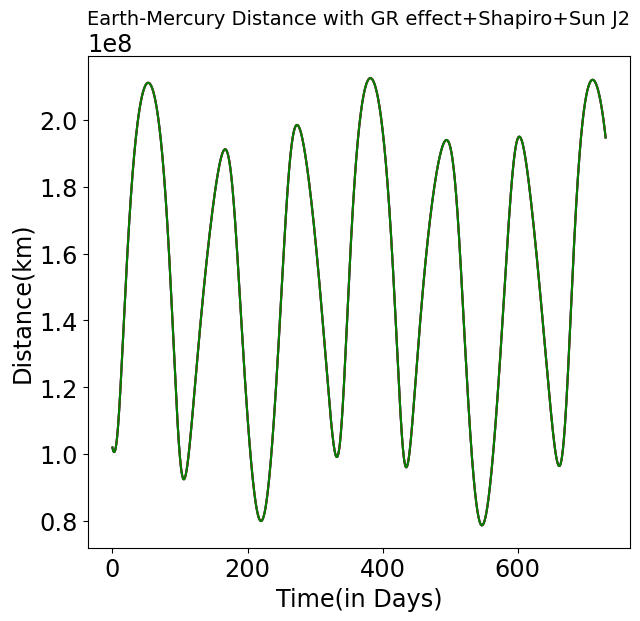

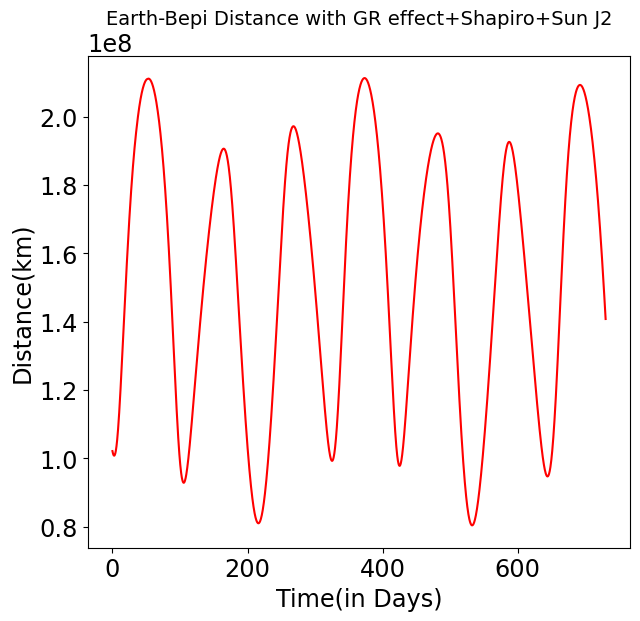

In [ ]:
plt.figure()
plt.plot(times, EM6, label="Earth-Mercury dist(GRT)", color='blue')
plt.plot(times, EM6_shap, label="Earth-Mercury dist(shapiro+GRT)", color='red')
plt.plot(times, EM6_j, label="Earth-Mercury dist(shapiro-jupiter+GRT)", color='green')
plt.xlabel("Time(in Days)")
plt.ylabel("Distance(km)")
plt.title("Earth-Mercury Distance with GR effect+Shapiro+Sun J2", fontsize='14')
plt.show()
#########################################################
plt.plot(times, BCE6, label="Earth-Bepi distance", color='red')
plt.xlabel("Time(in Days)")
plt.ylabel("Distance(km)")
plt.title("Earth-Bepi Distance with GR effect+Shapiro+Sun J2", fontsize='14')
plt.show()


In [23]:
import pickle as pkl#refer to pickle documentation

def save_data_to_pickle(filename, data):
    with open(filename, 'wb') as file:
        pkl.dump(data, file)

def load_data_from_pickle(filename):
    with open(filename, 'rb') as file:
        data = pkl.load(file)
    return data

In [ ]:
data = {"NEWTON":{"EM":EM0, "BC":BC0, "BCE":BCE0}, "GR":{"EM":EM1, "BC":BC1, "BCE":BCE1},"PPN_BETA_GAMMA_1":{"EM_shap":EM2_shap, "EM":EM2, "BCE":BCE2, "EM_J":EM2_j, "BE":BE2,"BM":BM2,"JE":JE2,"JM":JM2},
 "PPN_BETA_GAMMA_VAR":{"EM_shap":EM3_shap, "EM":EM3, "BCE":BCE3, "EM_J":EM3_j, "BE":BE3,"BM":BM3,"JE":JE3,"JM":JM3},
 "J2_NEWTON":{"EM":EM4,"BC":BC4,"BCE":BCE4},"PPN_J2_GAMMA_BETA_1":{"EM":EM5,"BE":BE5,"BM":BM5,"BCE":BCE5,"JE":JE5,"JM":JM5,"EM_shap":EM5_shap, "EM_J":EM5_j},
 "PPN_J2_BETA_GAMMA_VAR":{"EM":EM6,"BE":BE6,"BM":BM6,"BCE":BCE6,"JE":JE6,"JM":JM6,"EM_shap":EM6_shap,"EM_J":EM6_j}}

In [ ]:
data.keys()

dict_keys(['NEWTON', 'GR', 'PPN_BETA_GAMMA_1', 'PPN_BETA_GAMMA_VAR', 'J2_NEWTON', 'PPN_J2_GAMMA_BETA_1', 'PPN_J2_BETA_GAMMA_VAR'])

In [ ]:
save_data_to_pickle("phase_data.pkl",data)

In [ ]:
type(data)

dict

In [ ]:
data.keys()

dict_keys(['NEWTON', 'GR', 'PPN_BETA_GAMMA_1', 'PPN_BETA_GAMMA_VAR', 'J2_NEWTON', 'PPN_J2_GAMMA_BETA_1', 'PPN_J2_BETA_GAMMA_VAR'])

In [ ]:
x = data["NEWTON"]
x.keys()

dict_keys(['EM', 'BC', 'BCE'])

In [ ]:
data["PPN_BETA_GAMMA_1"]["EM"]

array([1.01965936e+08, 1.01644700e+08, 1.01365177e+08, ...,
       1.95889155e+08, 1.95306441e+08, 1.94712758e+08])

In [24]:
data = load_data_from_pickle("phase_data.pkl")

In [25]:
data.keys()

dict_keys(['NEWTON', 'GR', 'PPN_BETA_GAMMA_1', 'PPN_BETA_GAMMA_VAR', 'J2_NEWTON', 'PPN_J2_GAMMA_BETA_1', 'PPN_J2_BETA_GAMMA_VAR'])

In [33]:
'''
To use
 em_newton = data['NEWTON']['EM']
       em_gr     = data['GR']['EM']
       em_ppn1   = data['PPN_BETA_GAMMA_1']['EM']
       em_ppn2   = data['PPN_BETA_GAMMA_VAR']['EM']


'''
em_newton = data['NEWTON']['EM']
em_gr     = data['GR']['EM']
em_ppn1   = data['PPN_BETA_GAMMA_1']['EM']
bce_ppn1 = data['PPN_BETA_GAMMA_1']['BCE']
em_ppn2   = data['PPN_BETA_GAMMA_VAR']['EM']
bce_ppn2 = data['PPN_BETA_GAMMA_VAR']['BCE']


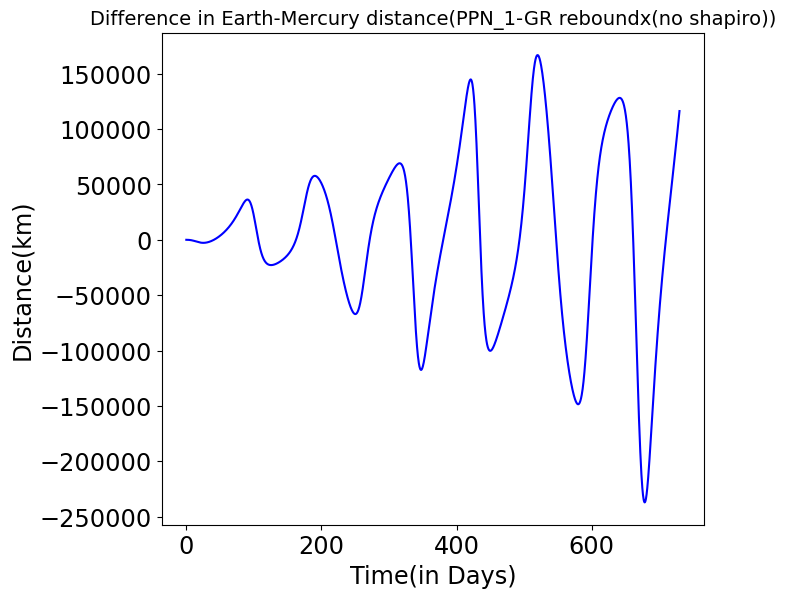

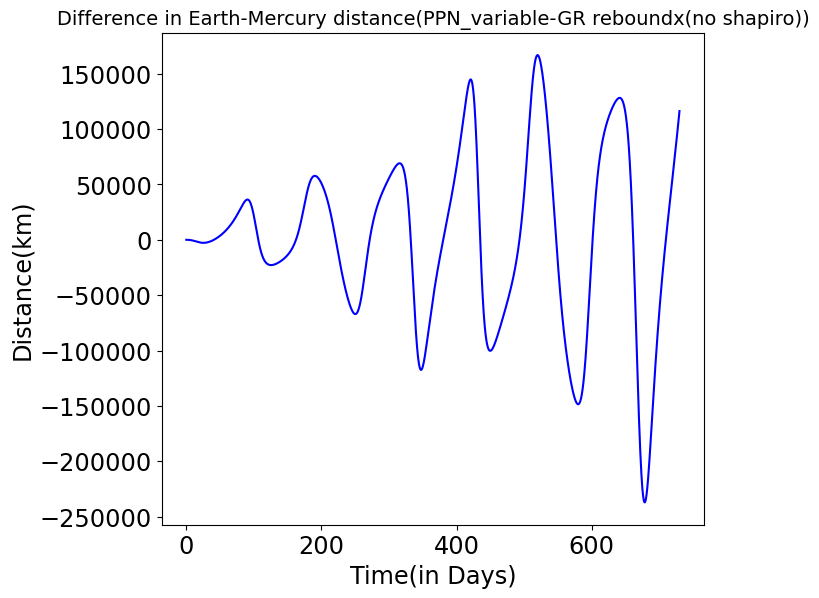

In [31]:
#comparing earth-mercury distance(primarily) between PPN=gamma=beta=1 and GR from reboundx with 5 objects
em_ppn1 = data['PPN_BETA_GAMMA_1']['EM']

plt.figure()
plt.plot(times, em_ppn1-EM1, label="PPN_1-GR reboundx(no shapiro)", color='blue')
plt.xlabel("Time(in Days)")
plt.ylabel("Distance(km)")
#plt.legend()
plt.title("Difference in Earth-Mercury distance(PPN_1-GR reboundx(no shapiro))", fontsize='14')
#plt.show()
#comparing earth-mercury distance(primarily) between PPN=gamma=beta=variable and GR from reboundx with 5 objects
plt.figure()
plt.plot(times, em_ppn2-EM1, label="PPN_var-GR reboundx(no shapiro)", color='blue')
plt.xlabel("Time(in Days)")
plt.ylabel("Distance(km)")
#plt.legend()
plt.title("Difference in Earth-Mercury distance(PPN_variable-GR reboundx(no shapiro))", fontsize='14')
plt.show()

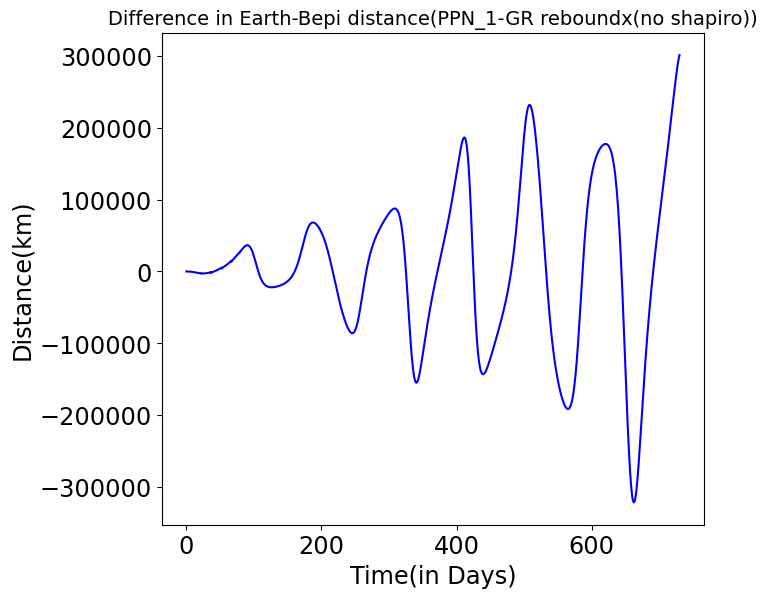

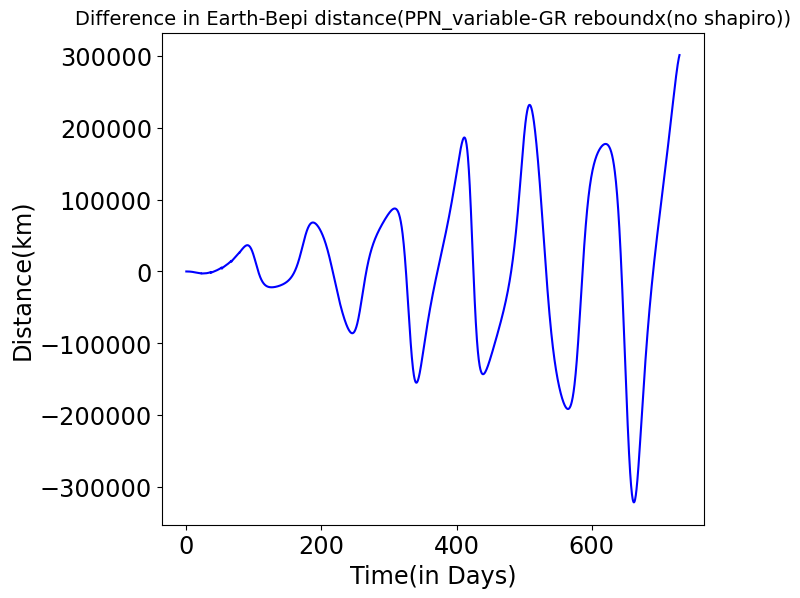

In [34]:
plt.figure()
plt.plot(times, bce_ppn1-BCE1, label="PPN_1-GR reboundx(no shapiro)", color='blue')
plt.xlabel("Time(in Days)")
plt.ylabel("Distance(km)")
#plt.legend()
plt.title("Difference in Earth-Bepi distance(PPN_1-GR reboundx(no shapiro))", fontsize='14')
#plt.show()
##########################################################
plt.figure()
plt.plot(times, bce_ppn2-BCE1, label="PPN_var-GR reboundx(no shapiro)", color='blue')
plt.xlabel("Time(in Days)")
plt.ylabel("Distance(km)")
#plt.legend()
plt.title("Difference in Earth-Bepi distance(PPN_variable-GR reboundx(no shapiro))", fontsize='14')
plt.show()


data = {"NEWTON":{"EM":EM0, "BC":BC0, "BCE":BCE0},



"GR":{"EM":EM1, "BC":BC1, "BCE":BCE1},



"PPN_BETA_GAMMA_1":{"EM_shap":EM2_shap, "EM":EM2, "BCE":BCE2, "EM_J":EM2_j, "BE":BE2,"BM":BM2,"JE":JE2,"JM":JM2},



"PPN_BETA_GAMMA_VAR":{"EM_shap":EM3_shap, "EM":EM3, "BCE":BCE3, "EM_J":EM3_j, "BE":BE3,"BM":BM3,"JE":JE3,"JM":JM3},




"J2_NEWTON":{"EM":EM4,"BC":BC4,"BCE":BCE4},




"PPN_J2_GAMMA_BETA_1":{"EM":EM5,"BE":BE5,"BM":BM5,"BCE":BCE5,"JE":JE5,"JM":JM5,"EM_shap":EM5_shap, "EM_J":EM5_j},




"PPN_J2_BETA_GAMMA_VAR":{"EM":EM6,"BE":BE6,"BM":BM6,"BCE":BCE6,"JE":JE6,"JM":JM6,"EM_shap":EM6_shap,"EM_J":EM6_j}}

In [35]:
#computing the earth-mercury distances including shapiro delay for sun and shapiro delay for jupiter in PPN=gamma=beta=1
print("Earth-mercury distance from PPN=Gamma=Beta=1(shapiro delay for sun): ", data['PPN_BETA_GAMMA_1']['EM_shap'])
print("Earth-mercury distance from PPN=Gamma=Beta=1(shapiro delay for Jupiter): ", data['PPN_BETA_GAMMA_1']['EM_J'])
#computing the earth-mercury distances including shapiro delay for sun and shapiro delay for jupiter in PPN=gamma=beta=var
print("Earth-mercury distance from PPN=Gamma=Beta=variable(shapiro delay for sun): ", data['PPN_BETA_GAMMA_VAR']['EM_shap'])
print("Earth-mercury distance from PPN=Gamma=Beta=variable(shapiro delay for Jupiter): ", data['PPN_BETA_GAMMA_VAR']['EM_J'])

Earth-mercury distance from PPN=Gamma=Beta=1(shapiro delay for sun):  [1.01965943e+08 1.01644707e+08 1.01365184e+08 ... 1.95889175e+08
 1.95306461e+08 1.94712777e+08]
Earth-mercury distance from PPN=Gamma=Beta=1(shapiro delay for Jupiter):  [1.01965943e+08 1.01644707e+08 1.01365184e+08 ... 1.95889175e+08
 1.95306461e+08 1.94712777e+08]
Earth-mercury distance from PPN=Gamma=Beta=variable(shapiro delay for sun):  [1.02549528e+08 1.02227059e+08 1.01946580e+08 ... 1.97562148e+08
 1.96964833e+08 1.96356683e+08]
Earth-mercury distance from PPN=Gamma=Beta=variable(shapiro delay for Jupiter):  [1.02556311e+08 1.02220288e+08 1.01953602e+08 ... 1.97562651e+08
 1.96962999e+08 1.96359182e+08]


In [42]:
1.01965943e+08-1.01965943e+08

0.0

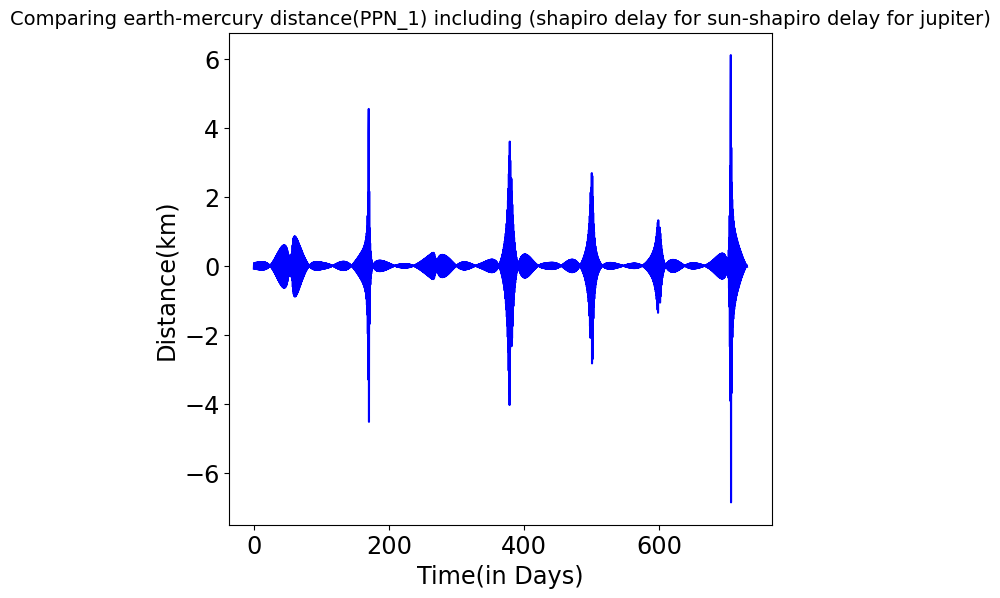

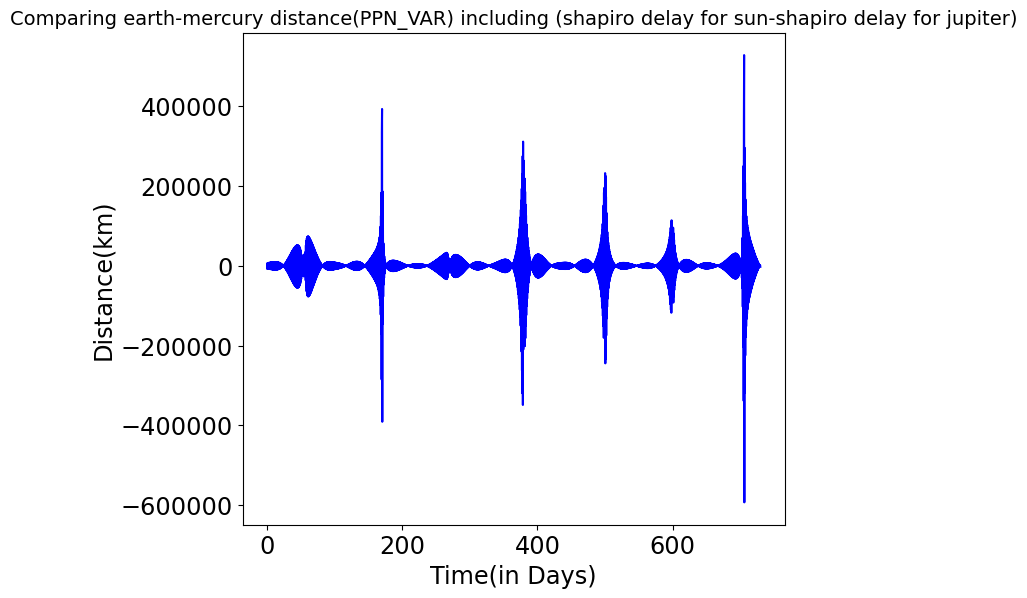

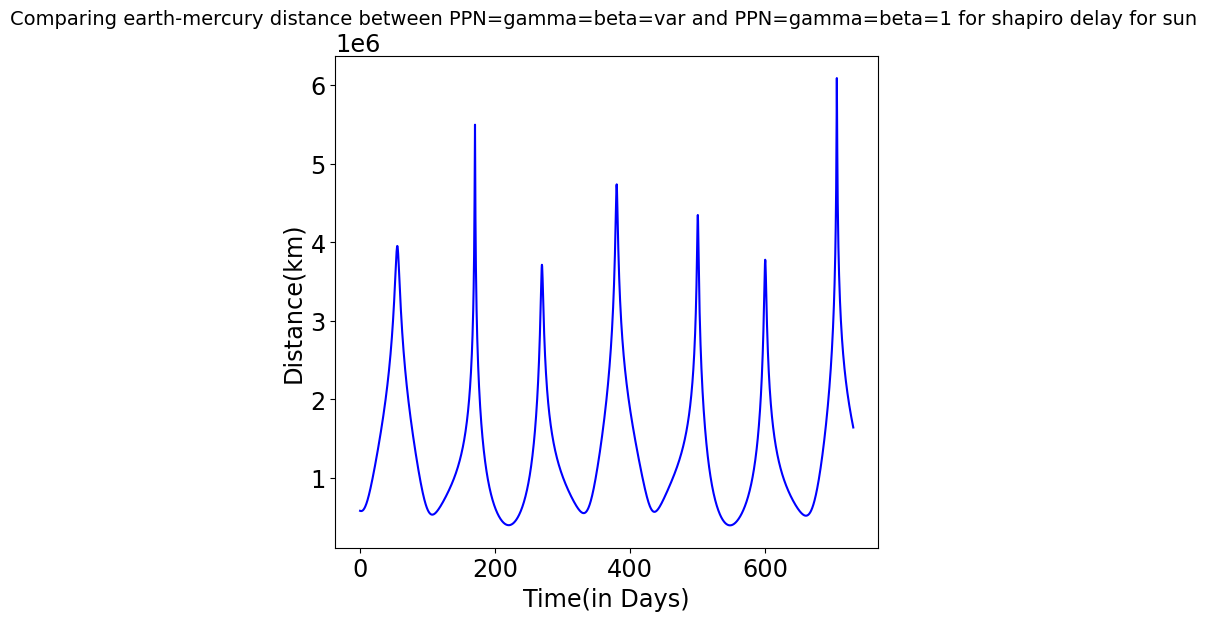

In [43]:
#comparing earth-mercury distance(primarily) from PPN=gamma=beta=1 between shapiro delay for sun and shapiro delay for jupiter
plt.figure()
plt.plot(times,  data['PPN_BETA_GAMMA_1']['EM_shap']-data['PPN_BETA_GAMMA_1']['EM_J'], label="PPN_1(shapiro delay for sun-jupiter)", color='blue')
#plt.plot(times,  data['PPN_BETA_GAMMA_1']['EM_J'], label="PPN_1(shapiro delay for Jupiter)", color='red')
plt.xlabel("Time(in Days)")
plt.ylabel("Distance(km)")
#plt.legend()
plt.title("Comparing earth-mercury distance(PPN_1) including (shapiro delay for sun-shapiro delay for jupiter)", fontsize='14')
#plt.show()
#comparing earth-mercury distance(primarily) from PPN=gamma=beta=var between shapiro delay for sun and shapiro delay for jupiter
plt.figure()
plt.plot(times,  data['PPN_BETA_GAMMA_VAR']['EM_shap']-data['PPN_BETA_GAMMA_VAR']['EM_J'], label="PPN_1(shapiro delay for sun-jupiter)", color='blue')
#plt.plot(times,  data['PPN_BETA_GAMMA_1']['EM_J'], label="PPN_1(shapiro delay for Jupiter)", color='red')
plt.xlabel("Time(in Days)")
plt.ylabel("Distance(km)")
#plt.legend()
plt.title("Comparing earth-mercury distance(PPN_VAR) including (shapiro delay for sun-shapiro delay for jupiter)", fontsize='14')
#plt.show()

#comparing earth-mercury distance(primarily) between PPN=gamma=beta=var and PPN=gamma=beta=1 for shapiro delay for sun
plt.figure()
plt.plot(times,  data['PPN_BETA_GAMMA_VAR']['EM_shap']-data['PPN_BETA_GAMMA_1']['EM_shap'], color='blue')
#plt.plot(times,  data['PPN_BETA_GAMMA_1']['EM_J'], label="PPN_1(shapiro delay for Jupiter)", color='red')
plt.xlabel("Time(in Days)")
plt.ylabel("Distance(km)")
#plt.legend()
plt.title("Comparing earth-mercury distance between PPN=gamma=beta=var and PPN=gamma=beta=1 for shapiro delay for sun ", fontsize='14')
plt.show()

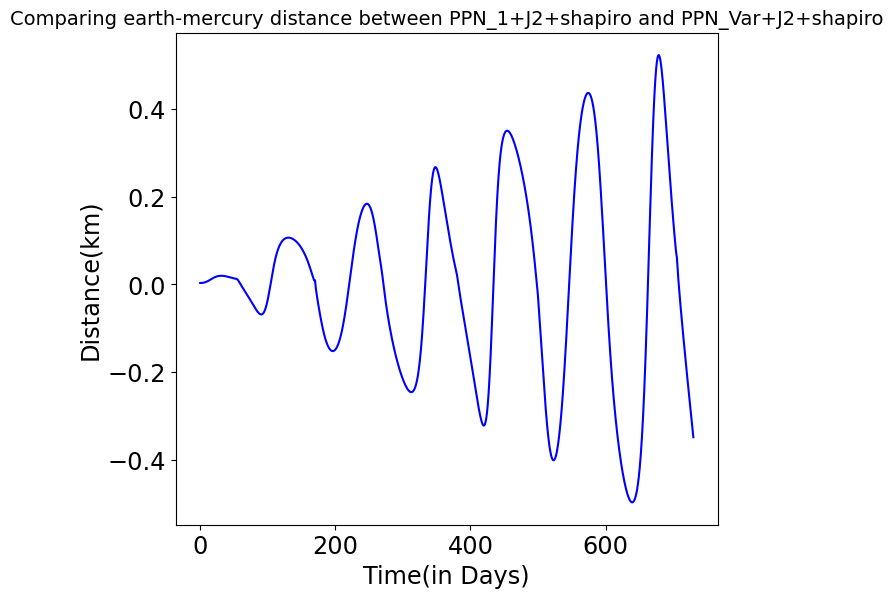

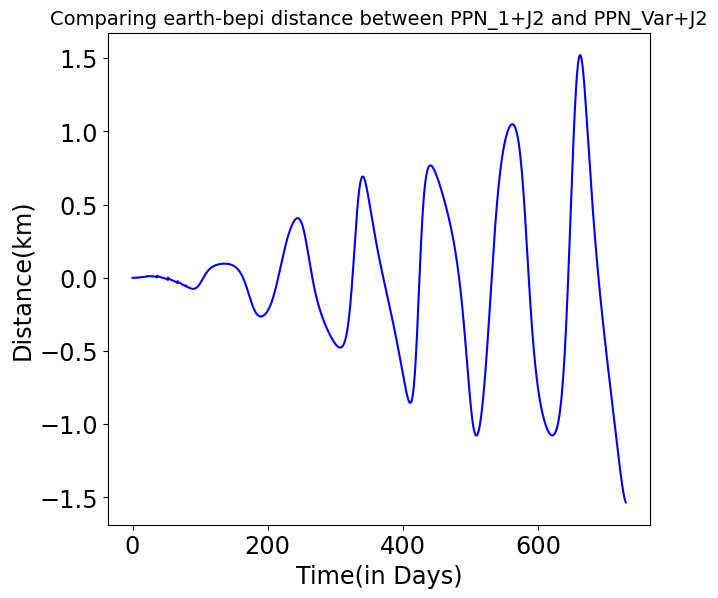

In [47]:
#comparing earth-mercury distance between PPN_1+shapiro delay+sun J2 and PPN_var+shapiro delay+sun J2
plt.figure()
plt.plot(times,  data['PPN_J2_BETA_GAMMA_VAR']['EM_shap']-data['PPN_J2_GAMMA_BETA_1']['EM_shap'], color='blue')
plt.xlabel("Time(in Days)")
plt.ylabel("Distance(km)")
#plt.legend()
plt.title("Comparing earth-mercury distance between PPN_1+J2+shapiro and PPN_Var+J2+shapiro", fontsize='14')
#plt.show()
#comparing earth-bepi distance between PPN_1+sun J2 and PPN_var+sun J2
plt.figure()
plt.plot(times,  data['PPN_J2_BETA_GAMMA_VAR']['BCE']-data['PPN_J2_GAMMA_BETA_1']['BCE'], color='blue')
plt.xlabel("Time(in Days)")
plt.ylabel("Distance(km)")
#plt.legend()
plt.title("Comparing earth-bepi distance between PPN_1+J2 and PPN_Var+J2", fontsize='14')
plt.show()

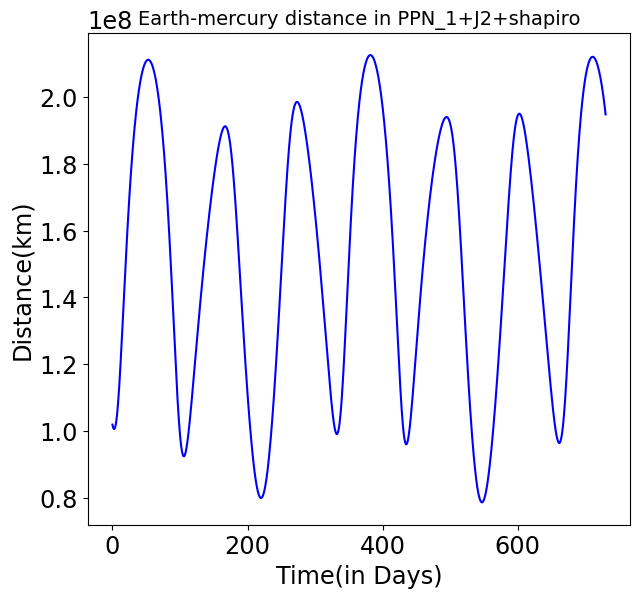

In [48]:
plt.figure()
plt.plot(times,  data['PPN_J2_GAMMA_BETA_1']['EM_shap'], color='blue')#did for ppn_var too
plt.xlabel("Time(in Days)")
plt.ylabel("Distance(km)")
#plt.legend()
plt.title("Earth-mercury distance in PPN_1+J2+shapiro", fontsize='14')
plt.show()